<a href="https://colab.research.google.com/github/ChichiChapka/Modern-Computer-Vision-with-PyTorch/blob/master/Group4_ICU_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***University of West London - ICU Admission Prediction for COVID-19 Patients***

## **INTRODUCTION**


It's 26th February 2020 when first COVID-19 case is recorded in Brazil. The virus impacts the whole world and shortly turns into global pandemic.

The challenges posed by the COVID-19 pandemic have tested healthcare systems worldwide, finding them unprepared for the intense demand for critical resources such as ICU beds, medical professionals or personal protective equipment.

Our group is a data science team, appointed to use our data skills and machine learning techniques to avert the collaps of brasilian healthcare system. We have been linked with Hospital Sírio-Libanês situated in São Paulo, where hospital teams such as data science, IT and physicians have collected data for patients addmited to hospital suspected to have virus and if they needed to be admitted to ICU unit.
Dataset we have received has been collected between 28-01-2020 and 16-04-2020.

Data has been cleaned and scaled by column according to MinMaxScaler to fit between -1 and 1.
</br></br>


**Licence:**

[Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)](https://creativecommons.org/licenses/by-nc/4.0/)

### 1.1 Problem definition


Early identification of those patients who will develop an adverse course of illness (and need intensive care) is a key for an appropriate treatment (saving lives) and to managing beds and resources.

This call to action aims to empower healthcare systems with the necessary tools to proactively manage and allocate resources based on the unique clinical needs of patients, ultimately preventing the collapse of critical care services. Time is of the essence, and a swift transition to this individualized approach is paramount for effective pandemic response.

**Task 01**
 - Predict admission to the ICU of confirmed COVID-19 cases.

Based on the data available, is it feasible to predict which patients will need intensive care unit support?
The aim is to provide tertiary and quarternary hospitals with the most accurate answer, so ICU resources can be arranged or patient transfer can be scheduled.

**Task 02**
 - Predict NOT admission to the ICU of confirmed COVID-19 cases.

Based on the subsample of widely available data, is it feasible to predict which patients will not need intensive care unit support?
The aim is to provide local and temporary hospitals a good enough answer, so frontline physicians can safely discharge and remotely follow up with these patients.
<br><br>

**Problem Summary:**

We are challenged to perform a full lifecycle ML model development according to the objective of the dataset.

This is a classification problem of patients with confirmed COVID-19 cases addmited to hospital needing or not needing to be admitted to intensive care unit (ICU).

Ideally we would like to be able to classify the ICU admission need as soon as possible - within 0-2 hours window. This should allow hospitals to plan their resources and staffing.

### Library Imports & Data Load



In [ ]:
# %%capture
# Install necessary libraries (use only once to avoid redundancy)
!pip install pandas_summary
!pip install aif360

! pip install plot_metric pandas_summary
!pip install bayesian-optimization
!pip install missingno
!pip install empiricaldist
!pip install factor-analyzer
!pip install imbalanced-learn

!pip install BlackBoxAuditing

# Data manipulation and  analysis
import pandas as pd  # Core data manipulation library
import numpy as np  # For numerical operations
from pandas_summary import DataFrameSummary  # Summary statistics for DataFrames

# Data visualization
import matplotlib.pyplot as plt  # Core plotting library
import seaborn as sns  # Advanced data visualization
%matplotlib inline
plt.rcParams['axes.labelsize'] = 10  # Set default size for axes labels
plt.rcParams['axes.titlesize'] = 14  # Set default size for axes titles
import missingno as msno  # Visualize missing data

# Machine learning - model imports
from sklearn.impute import SimpleImputer  # Handle missing data
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.svm import SVC, LinearSVC  # Support vector machine classifiers
from sklearn.ensemble import RandomForestClassifier  # Random forest classifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier
from sklearn.linear_model import SGDClassifier  # Stochastic Gradient Descent classifier
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier

# Preprocessing and metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures  # Encoding, scaling, and feature engineering
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve  # Performance metrics
from sklearn.inspection import permutation_importance  # Feature importance analysis
from sklearn.feature_selection import VarianceThreshold, SelectFromModel  # Feature selection utilities
from sklearn.utils import shuffle  # Shuffle data
from sklearn.model_selection import train_test_split  # Split data into train/test sets

# Handling class imbalance
from imblearn.under_sampling import RandomUnderSampler  # Under-sampling technique
from imblearn.over_sampling import RandomOverSampler, SMOTE  # Over-sampling techniques

# AI Fairness 360 toolkit
from aif360.datasets import BinaryLabelDataset  # AIF360 dataset structure
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric  # Fairness metrics
from aif360.algorithms.preprocessing import Reweighing, DisparateImpactRemover  # Pre-processing techniques
from aif360.algorithms.inprocessing import PrejudiceRemover  # In-processing technique
from aif360.algorithms.postprocessing import EqOddsPostprocessing # Post-processing techniques
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing
from aif360.sklearn.metrics import disparate_impact_ratio, equal_opportunity_difference  # Additional fairness metrics

# Collections for data manipulation
from collections import Counter  # Count occurrences of values

# Configure pandas display settings for better visibility
pd.set_option('display.max_columns', 800)  # Max columns to display
pd.set_option('display.max_rows', 800)  # Max rows to display

# Mount Google Drive for Colab notebooks
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **EXPLORATORY DATA ANALYSIS (EDA)**

As previously mentioned, this dataset contains anonymized data from Hospital Sírio-Libanês, São Paulo in Brasil. All data were anonymized following the best international practices and recommendations.
Data has been cleaned and scaled by column according to Min Max Scaler to fit between -1 and 1.

Available data:
 - Patient demographic information (03)
 - Patient previous grouped diseases (09)
 - Blood results (36)
 - Vital signs (06)

In total there are 54 features, expanded when pertinent to the mean, median, max, min, diff and relative diff.

1. diff = max - min
2. relative diff = diff/median

In this section we will explore the data, so we can gain deeper understanding and provide insights.

### General overview

Before we dive deeper into data exploration we will have an initial look at our dataset. This is just to get a sense of data before we dive into further exploration and insights.

In [ ]:
# Exploring the shape of our dataset:
rows, columns = df.shape

# Print observation:
print(f'This dataset has: {rows} rows and {columns} columns.'.format(rows, columns))

This dataset has: 1925 rows and 231 columns.


In [ ]:
# Drop duplicates if exists:
df.drop_duplicates()
df.shape

(1925, 231)

The shape of dataset before and after dropping duplicated is the same: 1925 rows and 231 columns. The dataset doesn't have any duplicated rows.

In [ ]:
# Display first 10 rows:
df.head(10)

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   
5                         1            1          90th       1   
6                         1            1          90th       1   
7                         1            1          90th       1   
8                         1            1          90th       1   
9                         1            1          90th       1   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   
5                 0.0                 0.0                 0.0   
6                 0.0                 0.0                 0.0   
7                 0.0                 0.0                 0.0   
8                 0.0                 0.0                 0.0   
9                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   
5                 0.0                 0.0                 0.0  1.0   
6                 0.0                 0.0                 0.0  1.0   
7                 0.0                 0.0                 0.0  1.0   
8                 0.0                 0.0                 0.0  1.0   
9                 0.0                 1.0                 0.0  1.0   

   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0             NaN           NaN          NaN   
1                0.0    1.0             NaN           NaN          NaN   
2                0.0    1.0        0.605263      0.605263     0.605263   
3                0.0    1.0             NaN           NaN          NaN   
4                0.0    1.0        0.000000      0.000000     0.000000   
5                1.0    1.0             NaN           NaN          NaN   
6                1.0    1.0       -0.210526     -0.210526    -0.210526   
7                1.0    1.0             NaN           NaN          NaN   
8                1.0    1.0        0.605263      0.605263     0.605263   
9                1.0    1.0        0.605263      0.605263     0.605263   

   ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0          NaN           NaN                 NaN               NaN   
1          NaN           NaN                 NaN               NaN   
2     0.605263          -1.0           -1.000000         -1.000000   
3          NaN           NaN                 NaN               NaN   
4     0.000000          -1.0           -0.871658         -0.871658   
5          NaN           NaN                 NaN               NaN   
6    -0.210526          -1.0           -1.000000         -1.000000   
7          NaN           NaN                 NaN               NaN   
8     0.605263          -1.0           -0.839572         -0.839572   
9     0.605263          -1.0           -0.914439         -0.914439   

   BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0              NaN              NaN               NaN               NaN   
1              NaN              NaN               NaN

In [ ]:
# Display last 10 rows:
df.tail(10)

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
1915                       383            0          40th       1   
1916                       383            0          40th       1   
1917                       383            0          40th       1   
1918                       383            0          40th       1   
1919                       383            0          40th       1   
1920                       384            0          50th       1   
1921                       384            0          50th       1   
1922                       384            0          50th       1   
1923                       384            0          50th       1   
1924                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
1915                 0.0                 0.0                 0.0   
1916                 0.0                 0.0                 0.0   
1917                 0.0                 0.0                 0.0   
1918                 0.0                 0.0                 0.0   
1919                 0.0                 0.0                 0.0   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
1915                 0.0                 0.0                 0.0  0.0   
1916                 0.0                 0.0                 0.0  0.0   
1917                 0.0                 0.0                 0.0  0.0   
1918                 0.0                 0.0                 0.0  0.0   
1919                 0.0                 0.0                 0.0  0.0   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
1915                0.0    0.0             NaN           NaN          NaN   
1916                0.0    0.0        0.605263      0.605263     0.605263   
1917                0.0    1.0             NaN           NaN          NaN   
1918                0.0    0.0             NaN           NaN          NaN   
1919                0.0    1.0        0.210526      0.210526     0.210526   
1920                0.0    1.0             NaN           NaN          NaN   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0             NaN           NaN          NaN   
1923                0.0    1.0             NaN           NaN          NaN   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
1915          NaN           NaN                 NaN               NaN   
1916     0.605263          -1.0                -1.0              -1.0   
1917          NaN           NaN                 NaN               NaN   
1918          NaN           NaN                 NaN               NaN   
1919     0.210526          -1.0                -1.0              -1.0   
1920          NaN           NaN                 NaN               NaN   
1921     0.605263          -1.0                -1.0              -1.0   
1922          NaN           NaN                 NaN               NaN   
1923          NaN           NaN                 NaN               NaN   
1924     0.605263          -1.0                -1.0              -1.0   

      BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  B

In [ ]:
# Print column header names:
print(df.columns.to_list())

['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_MEDIAN', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_MEDIAN', 'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CALCIUM_DIFF', 'CREATININ_MEDIAN', 'CREATININ_MEAN', 'CREATI

**Observations**

- PATIENT_VISIT_IDENTIFIER has mustiple entries, it means that we have multiple rows of data per one patient.
- we can initially see that there are many missing values across the dataset (displayed as NaN).
- values across some columns are repeated, this can be caused by various reasons such as human error, data entry mistake, system glitch or poor management practices.

In [ ]:
# Display a consise summary of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [ ]:
# Display descriptive statistics for data columns:
df.describe(include='all').transpose()

count unique   top freq      mean  \
PATIENT_VISIT_IDENTIFIER          1925.0    NaN   NaN  NaN     192.0   
AGE_ABOVE65                       1925.0    NaN   NaN  NaN  0.467532   
AGE_PERCENTIL                       1925     10  20th  215       NaN   
GENDER                            1925.0    NaN   NaN  NaN  0.368831   
DISEASE GROUPING 1                1920.0    NaN   NaN  NaN  0.108333   
DISEASE GROUPING 2                1920.0    NaN   NaN  NaN  0.028125   
DISEASE GROUPING 3                1920.0    NaN   NaN  NaN  0.097917   
DISEASE GROUPING 4                1920.0    NaN   NaN  NaN  0.019792   
DISEASE GROUPING 5                1920.0    NaN   NaN  NaN  0.128125   
DISEASE GROUPING 6                1920.0    NaN   NaN  NaN  0.046875   
HTN                               1920.0    NaN   NaN  NaN  0.213021   
IMMUNOCOMPROMISED                 1920.0    NaN   NaN  NaN  0.158333   
OTHER                             1920.0    NaN   NaN  NaN  0.809896   
ALBUMIN_MEDIAN                     821.0    NaN   NaN  NaN  0.528527   
ALBUMIN_MEAN                       821.0    NaN   NaN  NaN  0.528527   
ALBUMIN_MIN                        821.0    NaN   NaN  NaN  0.528527   
ALBUMIN_MAX                        821.0    NaN   NaN  NaN  0.528527   
ALBUMIN_DIFF                       821.0    NaN   NaN  NaN      -1.0   
BE_ARTERIAL_MEDIAN                 821.0    NaN   NaN  NaN -0.963433   
BE_ARTERIAL_MEAN                   821.0    NaN   NaN  NaN -0.963433   
BE_ARTERIAL_MIN                    821.0    NaN   NaN  NaN -0.963433   
BE_ARTERIAL_MAX                    821.0    NaN   NaN  NaN -0.963433   
BE_ARTERIAL_DIFF                   821.0    NaN   NaN  NaN      -1.0   
BE_VENOUS_MEDIAN                   821.0    NaN   NaN  NaN -0.931121   
BE_VENOUS_MEAN                     821.0    NaN   NaN  NaN -0.931121   
BE_VENOUS_MIN                      821.0    NaN   NaN  NaN -0.931121   
BE_VENOUS_MAX                      821.0    NaN   NaN  NaN -0.931121   
BE_VENOUS_DIFF                     821.0    NaN   NaN  NaN      -1.0   
BIC_ARTERIAL_MEDIAN                821.0    NaN   NaN  NaN -0.310924   
BIC_ARTERIAL_MEAN                  821.0    NaN   NaN  NaN -0.310924   
BIC_ARTERIAL_MIN                   821.0    NaN   NaN  NaN -0.310924   
BIC_ARTERIAL_MAX                   821.0    NaN   NaN  NaN -0.310924   
BIC_ARTERIAL_DIFF                  821.0    NaN   NaN  NaN      -1.0   
BIC_VENOUS_MEDIAN                  821.0    NaN   NaN  NaN -0.311845   
BIC_VENOUS_MEAN                    821.0    NaN   NaN  NaN -0.311845   
BIC_VENOUS_MIN                     821.0    NaN   NaN  NaN -0.311845   
BIC_VENOUS_MAX                     821.0    NaN   NaN  NaN -0.311845   
BIC_VENOUS_DIFF                    821.0    NaN   NaN  NaN      -1.0   
BILLIRUBIN_MEDIAN                  821.0    NaN   NaN  NaN -0.945928   
BILLIRUBIN_MEAN                    821.0    NaN   NaN  NaN -0.945928   
BILLIRUBIN_MIN                     821.0    NaN   NaN  NaN -0.945928   
BILLIRUBIN_MAX                     821.0    NaN   NaN  NaN -0.945928   
BILLIRUBIN_DIFF                    821.0    NaN   NaN  NaN      -1.0   
BLAST_MEDIAN                       821.0    NaN   NaN  NaN -0.994424   
BLAST_MEAN                         821.0    NaN   NaN  NaN -0.994424   
BLAST_MIN                          821.0    NaN   NaN  NaN -0.994424   
BLAST_MAX                          821.0    NaN   NaN  NaN -0.994424   
BLAST_DIFF                         821.0    NaN   NaN  NaN      -1.0   
CALCIUM_MEDIAN                     821.0    NaN   NaN  NaN  0.330359   
CALCIUM_MEAN                       821.0    NaN   NaN  NaN  0.330359   
CALCIUM_MIN                        821.0    NaN   NaN  NaN  0.330359   
CALCIUM_MAX                        821.0    NaN   NaN  NaN  0.330359   
CALCIUM_DIFF                       821.0    NaN   NaN  NaN      -1.0   
CREATININ_MEDIAN                   821.0    NaN   NaN  NaN -0.891078   
CREATININ_MEAN                     821.0    NaN   NaN  NaN -0.891078   
CRE

**Observations**

- our dataset contains three datatypes: float64, int64 and object.
- we can observe the effect of MinMaxScaler: continuous data features are distributed between -1 and 1.
- AGE_PERCENTIL has 10 unique values and mode of 20th percentile with frequency of 215. </br>
</br>

On top of our previously mentioned 54 medical features (expanded to the mean, median,  max, min, diff and relative diff) we also have three following features present:
 1. PATIENT_VISIT_IDENTIFIER - each patient has been assigned a unique id identifier
 2. WINDOW - time window for patient admitted to hospital
 3. ICU - target that indicates if patient was admitted to ICU

We will explore all of those and even more in the upcoming sections.

### Metadata

For easier exploration and analysis we create metadata dataset. Metadata provides information about other data, but doesn't contain data itself.

We have identified categories our dataframe consists of, as described by creators. Those are patient ID, demographic, groupped disease, vital signs, blood results, time window and target column and called those category.
We also added variable names with their datatypes, number and percentage of missing values, number of unique values and stats.
Stats gives an indication if column/variable name has a suffix of mean, median, min, max, diff_rell or diff.    

In [ ]:
data = []

# Defining data category based on data available:
for feature in df.columns:
    # Defining the category:
    if feature == 'PATIENT_VISIT_IDENTIFIER':
        category = 'id'
    elif feature == 'GENDER' or 'AGE' in feature:
        category = 'demographic'
    elif 'DISEASE GROUPING' in feature or feature == 'HTN' or feature == 'IMMUNOCOMPROMISED' or feature == 'OTHER':
        category = 'groupped_disease'
    elif 'BLOODPRESSURE' in feature or 'HEART_RATE' in feature or 'RESPIRATORY_RATE' in feature or 'TEMPERATURE' in feature or 'OXYGEN_SATURATION' in feature:
        category = 'vital_signs'
    elif feature == 'WINDOW':
        category = 'time_window'
    elif feature == 'ICU':
        category = 'target'
    else:
        category = 'blood_result'

   # Define stats, based on statistical suffix:
    if feature == 'PATIENT_VISIT_IDENTIFIER':
        stats = 'id'
    elif feature == 'ICU':
        stats = 'target'
    elif '_MEAN' in feature:
        stats = 'mean'
    elif '_MEDIAN' in feature:
        stats = 'median'
    elif '_MIN' in feature:
        stats = 'min'
    elif '_MAX' in feature:
        stats = 'max'
    elif '_DIFF_REL' in feature:
        stats = 'diff_rel'
    elif '_DIFF' in feature:
        stats = 'diff'
    else:
        stats = 'other'

    # Defining the data type
    dtype = df[feature].dtype

    # Defining missing data & % of missing data:
    missing = df[feature].isnull().sum()
    missing_per = df[feature].isnull().sum()/len(df)*100

    # Defining number of unique values per feature:
    uniques = df[feature].nunique()


    # Creating a Dict that contains all the metadata for the variable
    feature_dict = { 'varname': feature
                   , 'dtype': dtype
                   , 'category': category
                   , 'stats': stats
                   , 'missing': missing
                   , '%_missing': missing_per
                   , 'uniques': uniques
         }
    data.append(feature_dict)

meta_data = pd.DataFrame(data, columns=['varname', 'dtype', 'category', 'stats', 'missing', '%_missing', 'uniques'])
meta_data.set_index('varname', inplace=True)

In [ ]:
# Display meta_data:
meta_data

dtype          category     stats  \
varname                                                                 
PATIENT_VISIT_IDENTIFIER            int64                id        id   
AGE_ABOVE65                         int64       demographic     other   
AGE_PERCENTIL                      object       demographic     other   
GENDER                              int64       demographic     other   
DISEASE GROUPING 1                float64  groupped_disease     other   
DISEASE GROUPING 2                float64  groupped_disease     other   
DISEASE GROUPING 3                float64  groupped_disease     other   
DISEASE GROUPING 4                float64  groupped_disease     other   
DISEASE GROUPING 5                float64  groupped_disease     other   
DISEASE GROUPING 6                float64  groupped_disease     other   
HTN                               float64  groupped_disease     other   
IMMUNOCOMPROMISED                 float64  groupped_disease     other   
OTHER                             float64  groupped_disease     other   
ALBUMIN_MEDIAN                    float64      blood_result    median   
ALBUMIN_MEAN                      float64      blood_result      mean   
ALBUMIN_MIN                       float64      blood_result       min   
ALBUMIN_MAX                       float64      blood_result       max   
ALBUMIN_DIFF                      float64      blood_result      diff   
BE_ARTERIAL_MEDIAN                float64      blood_result    median   
BE_ARTERIAL_MEAN                  float64      blood_result      mean   
BE_ARTERIAL_MIN                   float64      blood_result       min   
BE_ARTERIAL_MAX                   float64      blood_result       max   
BE_ARTERIAL_DIFF                  float64      blood_result      diff   
BE_VENOUS_MEDIAN                  float64      blood_result    median   
BE_VENOUS_MEAN                    float64      blood_result      mean   
BE_VENOUS_MIN                     float64      blood_result       min   
BE_VENOUS_MAX                     float64      blood_result       max   
BE_VENOUS_DIFF                    float64      blood_result      diff   
BIC_ARTERIAL_MEDIAN               float64      blood_result    median   
BIC_ARTERIAL_MEAN                 float64      blood_result      mean   
BIC_ARTERIAL_MIN                  float64      blood_result       min   
BIC_ARTERIAL_MAX                  float64      blood_result       max   
BIC_ARTERIAL_DIFF                 float64      blood_result      diff   
BIC_VENOUS_MEDIAN                 float64      blood_result    median   
BIC_VENOUS_MEAN                   float64      blood_result      mean   
BIC_VENOUS_MIN                    float64      blood_result       min   
BIC_VENOUS_MAX                    float64      blood_result       max   
BIC_VENOUS_DIFF                   float64      blood_result      diff   
BILLIRUBIN_MEDIAN                 float64      blood_result    median   
BILLIRUBIN_MEAN                   float64      blood_result      mean   
BILLIRUBIN_MIN                    float64      blood_result       min   
BILLIRUBIN_MAX                    float64      blood_result       max   
BILLIRUBIN_DIFF                   float64      blood_result      diff   
BLAST_MEDIAN                      float64      blood_result    median   
BLAST_MEAN                        float64      blood_result      mean   
BLAST_MIN                         float64      blood_result       min   
BLAST_MAX                         float64      blood_result       max   
BLAST_DIFF                        float64      blood_result      diff   
CALCIUM_MEDIAN                    float64      blood_result    median   
CALCIUM_MEAN                      float64      blood_result      mean   
CALCIUM_MIN                       float64      blood_result       min   
CALCIUM_MAX                       float64      blood_result       max   
CALCIUM_DIFF                      float64      blood_result      diff   
CREATININ_MEDIAN     

**Observations**

From observing meta_data and visual above:
 - blood data has above 57% of data missing
 - vital data has from ~36 - 39% of data missing
 - disease groupping has ~3% of data missing


### **Exploring time_window**

Data in this dataset was obtained per each individual patient and aggregated by windows in chronological order.
This means that each patient has their id (PATIENT_VISIT_IDENTIFIER) and target (ICU) groupped by the time_window (WINDOW).
Target represents ICU Admission, it is binary with the meaning:
 - 0 - patient wasn't admitted to ICU
 - 1 - patient was admitted to ICU

Please see below what five categories WINDOW feature contains and it's descriptions:

**Window categories and description:**
 - *0-2* =>	From 0 to 2 hours of the admission
 - *2-4* =>	From 2 to 4 hours of the admission
 - *4-6* =>	From 4 to 6 hours of the admission
 - *6-12* => From 6 to 12 hours of the admission
 - *ABOVE-12* =>  Above 12 hours from admission

Dataset description contain the following instruction related to window and data lag:

Beware NOT to use the data when the target variable is present, as the order of the event is unknown (maybe the target event happened before the results were obtained). They were kept there so we can grow this dataset in other outcomes latter on.

Example:

<img src='https://raw.githubusercontent.com/Kaggle-Projects-Solutions/ML_Project_G4/main/image/window_1.jpg' width=800 align='left'/>

<img src='https://raw.githubusercontent.com/Kaggle-Projects-Solutions/ML_Project_G4/main/image/window_2.jpg' width=800 align='left'/>

In the following section, we will explore window and target data to gain more understanding.
As a first step we will create a pivot table with patient id, time_window and target.

In [ ]:
# Create pivot table for time_window, by using id as index and target (ICU) as values:
piv = pd.pivot_table(df,index=['PATIENT_VISIT_IDENTIFIER'],columns=['WINDOW'],values=['ICU'])

# format column names:
piv.columns = ['_'.join(str(s).strip() for s in col if s) for col in piv.columns]
# reset index:
piv.reset_index(inplace=True)

# display first 20 rows of pivot table:
piv.head(20)

PATIENT_VISIT_IDENTIFIER  ICU_0-2  ICU_2-4  ICU_4-6  ICU_6-12  \
0                          0        0        0        0         0   
1                          1        1        1        1         1   
2                          2        0        0        0         0   
3                          3        0        0        0         0   
4                          4        0        0        0         0   
5                          5        0        0        0         0   
6                          6        0        0        0         0   
7                          7        0        0        0         0   
8                          8        0        0        0         0   
9                          9        0        0        0         0   
10                        10        0        0        0         0   
11                        11        0        0        0         1   
12                        12        0        0        0         0   
13                        13        0        0        0         0   
14                        14        0        0        1         1   
15                        15        0        0        0         0   
16                        16        0        0        0         0   
17                        17        1        1        1         1   
18                        18        0        0        1         1   
19                        19        0        0        0         0   

    ICU_ABOVE_12  
0              1  
1              1  
2              1  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0  
10             0  
11             1  
12             0  
13             1  
14             1  
15             1  
16             0  
17             1  
18             1  
19             1

Pivot table indicates that if patient has a record of ICU admission (1) in time window before 12+ hours, all the following windows are filled in with ICU admission = 1.

Let's have a closer look at target (ICU) distribution by window.

In [ ]:
win_df = df.groupby(['WINDOW','ICU']).agg(icu_count=('ICU','count')).reset_index()
win_df

WINDOW  ICU  icu_count
0       0-2    0        353
1       0-2    1         32
2       2-4    0        326
3       2-4    1         59
4       4-6    0        286
5       4-6    1         99
6      6-12    0        255
7      6-12    1        130
8  ABOVE_12    0        190
9  ABOVE_12    1        195

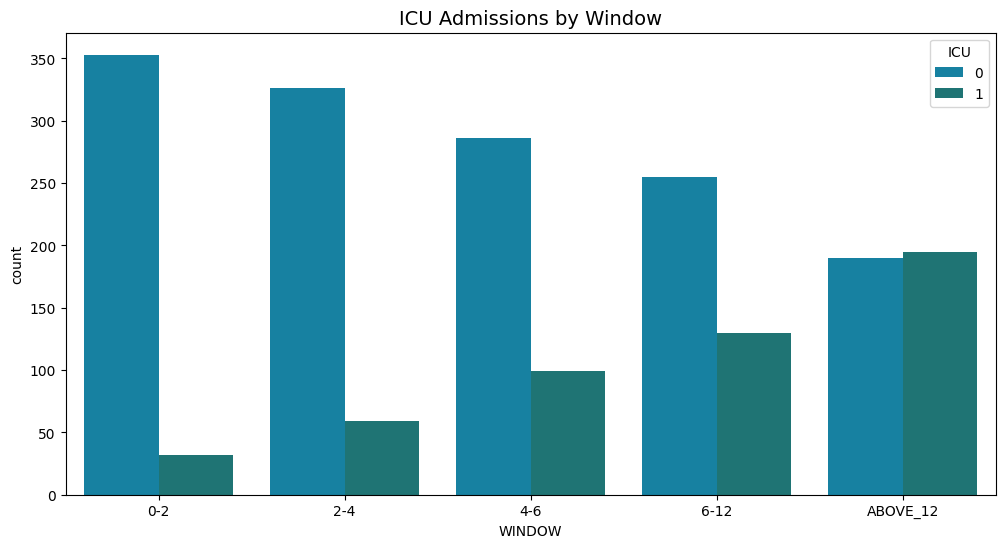

In [ ]:
# Bar chart of target data, split by window:

plt.figure(figsize=(12,6))
sns.countplot(x = 'WINDOW', hue = 'ICU', data=df, palette = 'winter_d')
plt.title('ICU Admissions by Window')

plt.show()

From the above bar chart and win_df dataframe, we can see that earlier time windows 0-2, 2-4, 4-6 and 6-12 are inbalanced. In those, target 0 (not admited to ICU) dominates in comparision to target 1 (admited to ICU). Window ABOVE_12 is almost balanced with target 0,1 and frequencies of 189 and 195 respectively.



### **Exploring demographic data**

Demographic data is information about groups of people according to certain attributes such as age and gender. Those are also called protected attributes and are a part of ethical dimention. In our dataset we have three demographic features:
 1. AGE_ABOVE65
 2. AGE_PERCENTIL
 3. GENDER

 Demografic data can be a source of bias and discrimination. We will come back to this and explore the problem later on in a section dedicated to AI Fairness 360.

In [ ]:
meta_data[meta_data.category=='demographic']

dtype     category  stats  missing  %_missing  uniques
varname                                                               
AGE_ABOVE65     int64  demographic  other        0        0.0        2
AGE_PERCENTIL  object  demographic  other        0        0.0       10
GENDER          int64  demographic  other        0        0.0        2

In [ ]:
# How many patients monitored were included in dataset?
samples = rows/df.WINDOW.nunique()
print(f'Dataset contains data for {samples} patients.'.format(samples))

Dataset contains data for 385.0 patients.


To extract insights, we create a dataset that contains aggregated data for ID, age above 65, age percentil and gender. We also include target icu_max. In this case target indicates if patient was admitted to ICU throughout their stay in hospital.

In [ ]:
# Creating demographics dataset,including patient id and max(ICU):
demo_df = df.groupby(['PATIENT_VISIT_IDENTIFIER'
                      ,'AGE_ABOVE65'
                      ,'AGE_PERCENTIL'
                      ,'GENDER']).agg(icu_max=('ICU','max')).reset_index()
demo_df.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  icu_max
0                         0            1          60th       0        1
1                         1            1          90th       1        1
2                         2            0          10th       0        1
3                         3            0          40th       1        0
4                         4            0          10th       0        0

### Gender

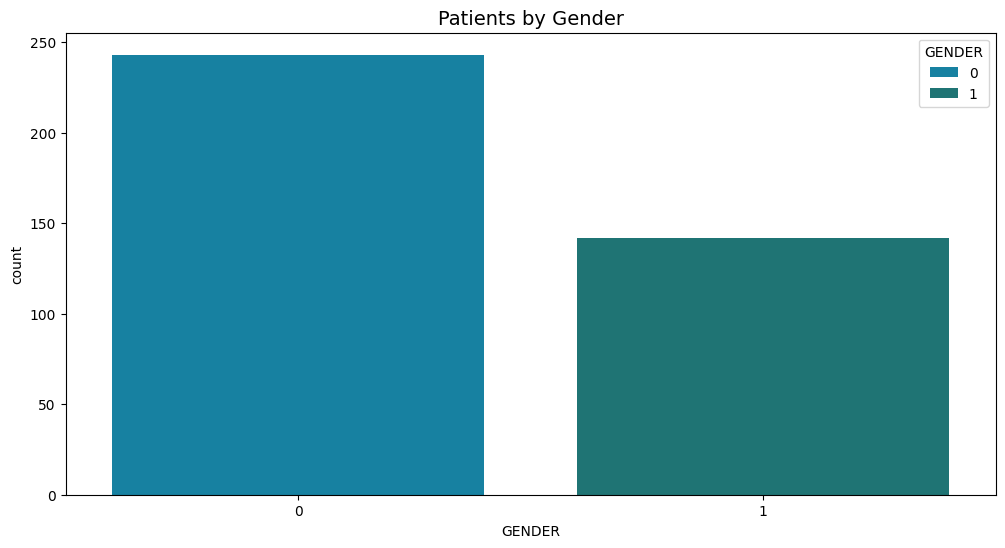

In [ ]:
# Bar chart of gender distribution:
plt.figure(figsize=(12,6))
sns.countplot(x = 'GENDER', hue = 'GENDER', data=demo_df,  palette = 'winter_d')
plt.title('Patients by Gender')
plt.show()

In [ ]:
# Display percentage (%) of values for each class (1, 0) represented in the gender column:
demo_df['GENDER'].value_counts(normalize=True) * 100

0    63.116883
1    36.883117
Name: GENDER, dtype: float64

**Observations**

About 63% of patients belong to a gender class 0, and about 37% of the patients belong to gender class 1. Gender representation of patients is unbalanced.

### Age Above 65

Hypothesis for this feature is that older patients would be in need of ICU admission more than younger patients.

In [ ]:
# Display percentage (%) of values for each class (1, 0) represented in the Age Above 65 column:
demo_df['AGE_ABOVE65'].value_counts(normalize=True) * 100

0    53.246753
1    46.753247
Name: AGE_ABOVE65, dtype: float64

**Observations**

- 53% of patients haven't reached the age of 65
- 47% of the patients belong to the age category of 65 or older

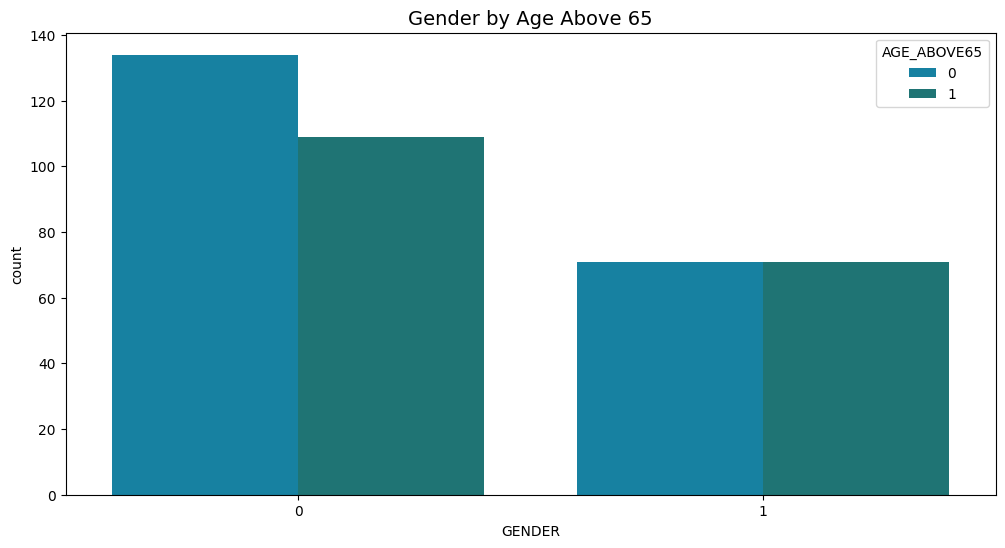

In [ ]:
# Bar chart of Gender distribution by Age Above 65:
plt.figure(figsize=(12,6))
sns.countplot(x = 'GENDER', hue= 'AGE_ABOVE65', data=demo_df,  palette = 'winter_d')
plt.title('Gender by Age Above 65')

plt.show()

In [ ]:
# Display distribution of Gender by Age Above 65:
demo_df.groupby(['GENDER','AGE_ABOVE65']).agg(COUNT=('AGE_ABOVE65','count')).reset_index()


GENDER  AGE_ABOVE65  COUNT
0       0            0    134
1       0            1    109
2       1            0     71
3       1            1     71

**Observation**

- gender group 1 is perfectly balanced with distibution of patients above and below 65. There are 71 patients in each group.
- gender group 0 has 109 and 134 patients that are above 65 and below the age of 65 respectively.

This bar chart doesn't give us full picture of age distributions in our dataset. Hence we will have a closer look at age percentil.

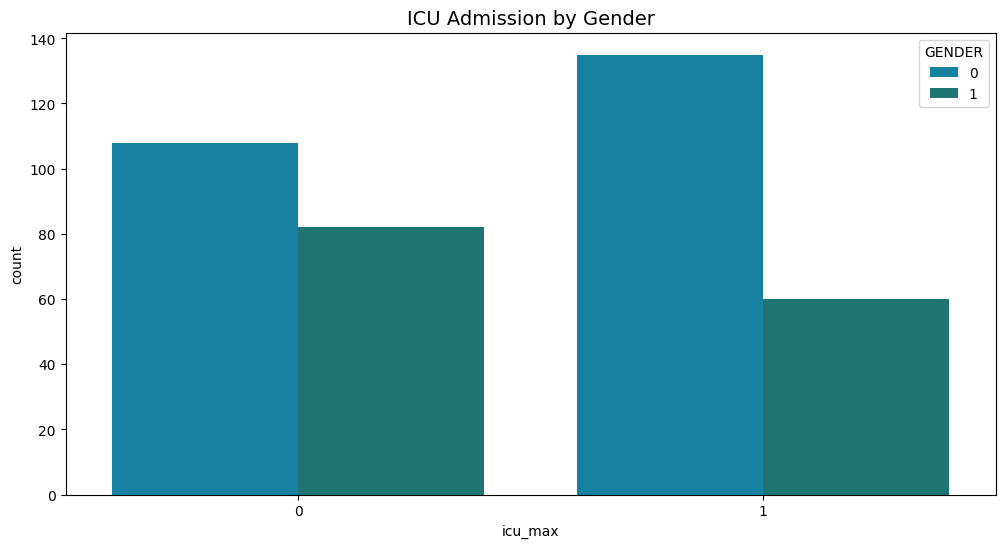

In [ ]:
# Bar chart of ICU Admission distribution by Gender:
plt.figure(figsize=(12,6))
sns.countplot(x = 'icu_max', hue= 'GENDER', data=demo_df,  palette = 'winter_d')
plt.title('ICU Admission by Gender')
plt.show()

### Age Percentil

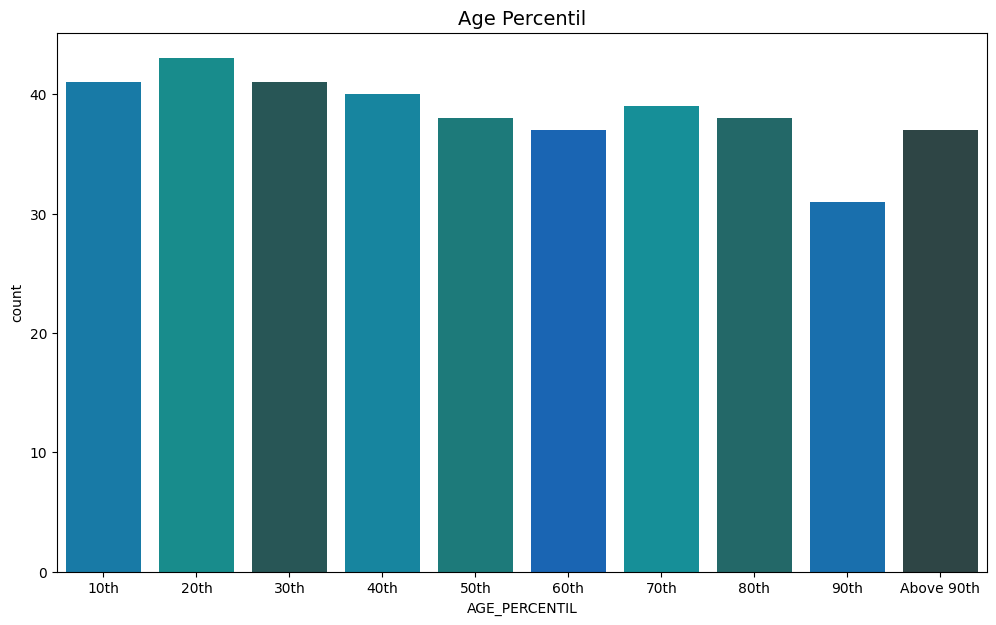

In [ ]:
# Bar chart of total male and female passengers on the board:
plt.figure(figsize=(12,7))
sns.countplot(x = 'AGE_PERCENTIL',data=demo_df, hue = 'AGE_PERCENTIL', palette = 'winter_d',
              order = ['10th','20th','30th','40th','50th','60th','70th','80th','90th','Above 90th'])
plt.title('Age Percentil')
plt.show()

Which percentils does Age Above 65 category falls into?

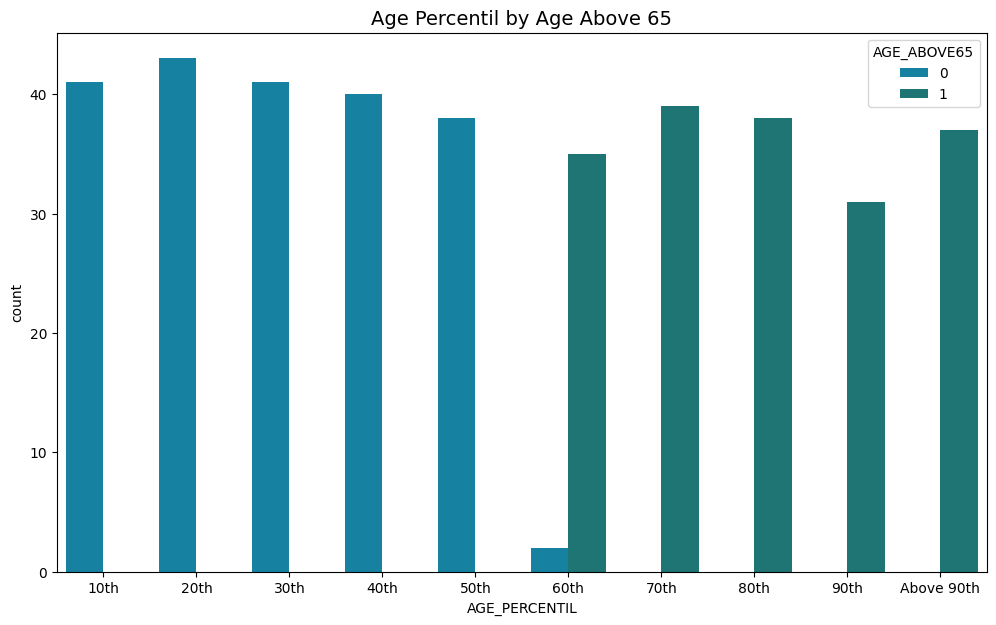

In [ ]:
# Bar chart of Age Percentil by Age Above 65:
plt.figure(figsize=(12,7))
sns.countplot(x = 'AGE_PERCENTIL', hue='AGE_ABOVE65', data=demo_df,  palette = 'winter_d',
              order = ['10th','20th','30th','40th','50th','60th','70th','80th','90th','Above 90th'])
plt.title('Age Percentil by Age Above 65')
plt.show()

From the chart above: age 65+ falls into an interval from lower 60th percentil onwards.

<Figure size 1200x700 with 0 Axes>

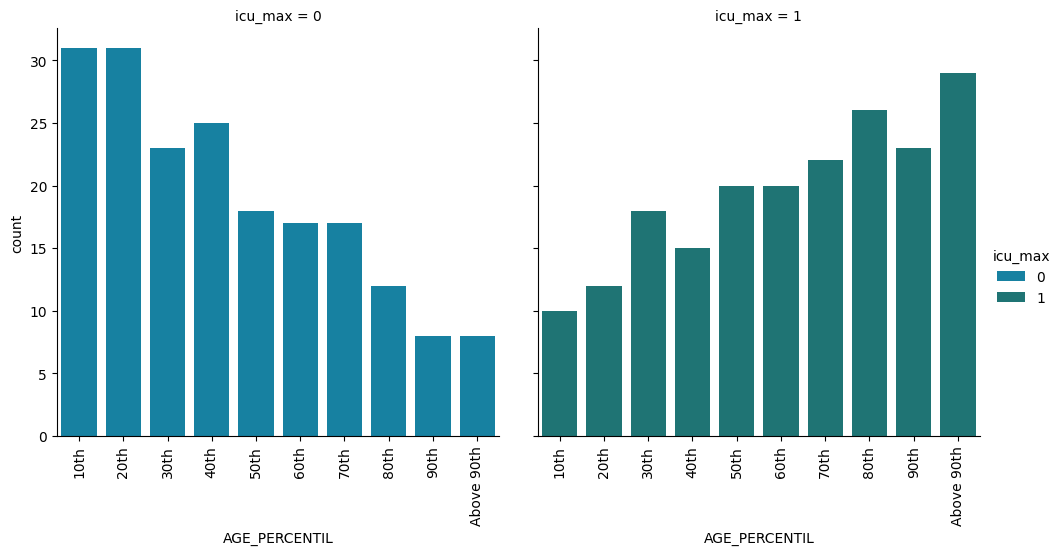

In [ ]:
# Bar chart of ICU admission by Age Percentil:
plt.figure(figsize=(12,7))
v =sns.catplot(x = 'AGE_PERCENTIL', col='icu_max', data=demo_df, kind='count', hue = 'icu_max', palette = 'winter_d',
              order = ['10th','20th','30th','40th','50th','60th','70th','80th','90th','Above 90th'])
v.set_xticklabels(rotation=90)

plt.show()

The visual above suggests that Age is correlated with target of ICU Admission. We can clearly observe a trend here: with increasing Age Percentil, admission to ICU has an increasing trend.

<ipython-input-26-78f2a0e6ecd9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(demo_df.corr()


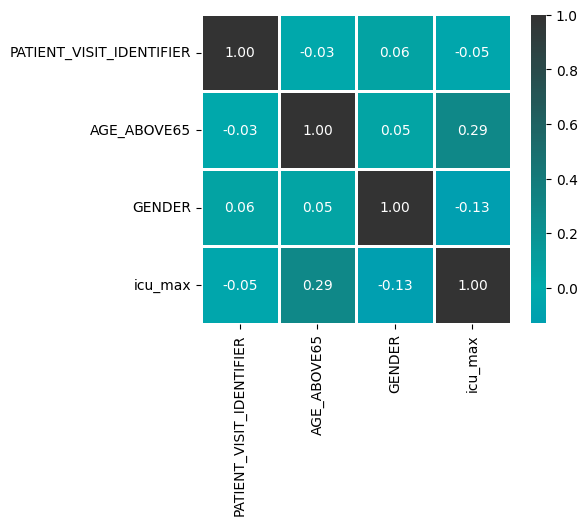

In [ ]:
# Display correlation for demographic features:
cmap = sns.color_palette('winter_d', as_cmap=True)
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(demo_df.corr()
            , cmap=cmap
            , vmax=1.0
            , center=0
            , fmt='.2f'
            , square=True
            , linewidths=.9
            , annot=True
            , cbar_kws={"shrink": .8})
plt.show()

**Observation**

- The highest correlation amongst features (0.29) is between Age Above 65 and ICU Admission as expected.
- We have a weak negative correlation (-0.13) between Gender and ICU Admission


    
Currently Age Percentil is categorical. To make it usable by machine learning model, we need to convert strings to numeric values that are readable by machine learning algorithms.

### **Exploring groupped disease**

In [ ]:
meta_data[meta_data.category=='groupped_disease']

dtype          category  stats  missing  %_missing  \
varname                                                                    
DISEASE GROUPING 1  float64  groupped_disease  other        5    0.25974   
DISEASE GROUPING 2  float64  groupped_disease  other        5    0.25974   
DISEASE GROUPING 3  float64  groupped_disease  other        5    0.25974   
DISEASE GROUPING 4  float64  groupped_disease  other        5    0.25974   
DISEASE GROUPING 5  float64  groupped_disease  other        5    0.25974   
DISEASE GROUPING 6  float64  groupped_disease  other        5    0.25974   
HTN                 float64  groupped_disease  other        5    0.25974   
IMMUNOCOMPROMISED   float64  groupped_disease  other        5    0.25974   
OTHER               float64  groupped_disease  other        5    0.25974   

                    uniques  
varname                      
DISEASE GROUPING 1        2  
DISEASE GROUPING 2        2  
DISEASE GROUPING 3        2  
DISEASE GROUPING 4        2  
DISEASE GROUPING 5        2  
DISEASE GROUPING 6        2  
HTN                       2  
IMMUNOCOMPROMISED         2  
OTHER                     2

We have 5 missing values in each of the groupped_disease column. Let's have a look at missing values for DISEASE GROUPING 1:

In [ ]:
# Select rows with missing values in 'DISEASE GROUPING 1' column:
df[df['DISEASE GROUPING 1'].isnull()==True]

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
995                       199            0          10th       0   
996                       199            0          10th       0   
997                       199            0          10th       0   
998                       199            0          10th       0   
999                       199            0          10th       0   

     DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
995                 NaN                 NaN                 NaN   
996                 NaN                 NaN                 NaN   
997                 NaN                 NaN                 NaN   
998                 NaN                 NaN                 NaN   
999                 NaN                 NaN                 NaN   

     DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
995                 NaN                 NaN                 NaN  NaN   
996                 NaN                 NaN                 NaN  NaN   
997                 NaN                 NaN                 NaN  NaN   
998                 NaN                 NaN                 NaN  NaN   
999                 NaN                 NaN                 NaN  NaN   

     IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
995                NaN    NaN             NaN           NaN          NaN   
996                NaN    NaN             NaN           NaN          NaN   
997                NaN    NaN             NaN           NaN          NaN   
998                NaN    NaN             NaN           NaN          NaN   
999                NaN    NaN             NaN           NaN          NaN   

     ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
995          NaN           NaN                 NaN               NaN   
996          NaN           NaN                 NaN               NaN   
997          NaN           NaN                 NaN               NaN   
998          NaN           NaN                 NaN               NaN   
999          NaN           NaN                 NaN               NaN   

     BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
995              NaN              NaN               NaN               NaN   
996              NaN              NaN               NaN               NaN   
997              NaN              NaN               NaN               NaN   
998              NaN              NaN               NaN               NaN   
999              NaN              NaN               NaN               NaN   

     BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
995             NaN            NaN            NaN             NaN   
996             NaN            NaN            NaN             NaN   
997             NaN            NaN            NaN             NaN   
998             NaN            NaN            NaN             NaN   
999             NaN            NaN            NaN             NaN   

     BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  \
995                  NaN                NaN               NaN   
996                  NaN                NaN               NaN   
997                  NaN                NaN               NaN   
998                  NaN                NaN               NaN   
999                  NaN                NaN               NaN   

     BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  \
995               NaN                NaN                NaN              NaN   
996               NaN                NaN                NaN              NaN   
997               NaN                NaN                NaN              NaN   
998               NaN                NaN                NaN              NaN   
999               NaN                NaN                NaN              NaN   

     BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  \
995             NaN             NaN          

We have no data for patient with ID 199 across all colums (apart from demographic data) - those rows can be dropped from our dataset.

**Observation**

Data for grupped_disease is not consistent. Our assumption would be that patient with the same ID would have the same disease across all time windows. However, this is not the case. On the example below we are showing data for patients with IDs 1,4:

In [ ]:
# Create dataset that contains groupped disease data and patients ID:
disease_df = df[list(meta_data.index[(meta_data.category == 'id')|(meta_data.category == 'groupped_disease')])]

In [ ]:
disease_df[(disease_df.PATIENT_VISIT_IDENTIFIER == 1) | (disease_df.PATIENT_VISIT_IDENTIFIER == 4)]

PATIENT_VISIT_IDENTIFIER  DISEASE GROUPING 1  DISEASE GROUPING 2  \
5                          1                 0.0                 0.0   
6                          1                 0.0                 0.0   
7                          1                 0.0                 0.0   
8                          1                 0.0                 0.0   
9                          1                 0.0                 0.0   
20                         4                 0.0                 0.0   
21                         4                 0.0                 0.0   
22                         4                 0.0                 0.0   
23                         4                 0.0                 0.0   
24                         4                 0.0                 0.0   

    DISEASE GROUPING 3  DISEASE GROUPING 4  DISEASE GROUPING 5  \
5                  0.0                 0.0                 0.0   
6                  0.0                 0.0                 0.0   
7                  0.0                 0.0                 0.0   
8                  0.0                 0.0                 0.0   
9                  0.0                 0.0                 1.0   
20                 0.0                 0.0                 0.0   
21                 0.0                 0.0                 0.0   
22                 0.0                 0.0                 0.0   
23                 0.0                 0.0                 0.0   
24                 0.0                 0.0                 0.0   

    DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  
5                  0.0  1.0                1.0    1.0  
6                  0.0  1.0                1.0    1.0  
7                  0.0  1.0                1.0    1.0  
8                  0.0  1.0                1.0    1.0  
9                  0.0  1.0                1.0    1.0  
20                 0.0  0.0                0.0    1.0  
21                 0.0  0.0                0.0    0.0  
22                 0.0  0.0                0.0    0.0  
23                 0.0  0.0                0.0    0.0  
24                 0.0  1.0                0.0    1.0

For patient 1: We can observe feature called DISEASE GROUPING 5: it has both classes 0 and 1. Class 1 is inserted in ABOVE_12 time window.</br>
For patient 4: We can observe feature called OTHER: class 1 is present in windows 0-2 and ABOVE_12 only.

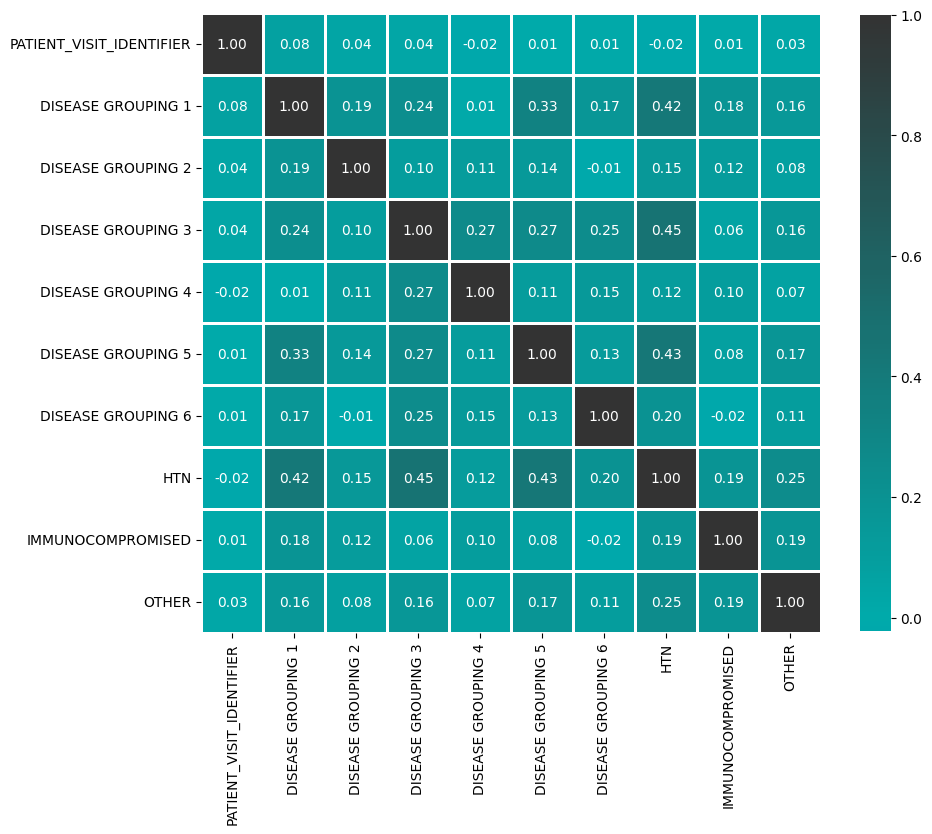

In [ ]:
cmap = sns.color_palette('winter_d', as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(disease_df.corr()
            , cmap=cmap
            , vmax=1.0
            , center=0
            , fmt='.2f'
            , square=True
            , linewidths=.9
            , annot=True
            , cbar_kws={"shrink": .8})
plt.show()

HTN which is abbreviation for Hypertension or high blood pressure has moderate positive correlation (~0.43) with:
- disease grouping 1
- disease grouping 3
- disease grouping 5


### **Exploring blood results**

Blood result data has above 57% of missing data for each of the features. The reason for such a high percentage of data missing might be related to processing blood samples by laboratory. To get results for blood test can take quite long time, especially during high demand which COVID-19 pandemic was.

In [ ]:
# Display metadata for blood results:
meta_data[meta_data.category=='blood_result']

dtype      category   stats  missing  %_missing  \
varname                                                                    
ALBUMIN_MEDIAN         float64  blood_result  median     1104  57.350649   
ALBUMIN_MEAN           float64  blood_result    mean     1104  57.350649   
ALBUMIN_MIN            float64  blood_result     min     1104  57.350649   
ALBUMIN_MAX            float64  blood_result     max     1104  57.350649   
ALBUMIN_DIFF           float64  blood_result    diff     1104  57.350649   
BE_ARTERIAL_MEDIAN     float64  blood_result  median     1104  57.350649   
BE_ARTERIAL_MEAN       float64  blood_result    mean     1104  57.350649   
BE_ARTERIAL_MIN        float64  blood_result     min     1104  57.350649   
BE_ARTERIAL_MAX        float64  blood_result     max     1104  57.350649   
BE_ARTERIAL_DIFF       float64  blood_result    diff     1104  57.350649   
BE_VENOUS_MEDIAN       float64  blood_result  median     1104  57.350649   
BE_VENOUS_MEAN         float64  blood_result    mean     1104  57.350649   
BE_VENOUS_MIN          float64  blood_result     min     1104  57.350649   
BE_VENOUS_MAX          float64  blood_result     max     1104  57.350649   
BE_VENOUS_DIFF         float64  blood_result    diff     1104  57.350649   
BIC_ARTERIAL_MEDIAN    float64  blood_result  median     1104  57.350649   
BIC_ARTERIAL_MEAN      float64  blood_result    mean     1104  57.350649   
BIC_ARTERIAL_MIN       float64  blood_result     min     1104  57.350649   
BIC_ARTERIAL_MAX       float64  blood_result     max     1104  57.350649   
BIC_ARTERIAL_DIFF      float64  blood_result    diff     1104  57.350649   
BIC_VENOUS_MEDIAN      float64  blood_result  median     1104  57.350649   
BIC_VENOUS_MEAN        float64  blood_result    mean     1104  57.350649   
BIC_VENOUS_MIN         float64  blood_result     min     1104  57.350649   
BIC_VENOUS_MAX         float64  blood_result     max     1104  57.350649   
BIC_VENOUS_DIFF        float64  blood_result    diff     1104  57.350649   
BILLIRUBIN_MEDIAN      float64  blood_result  median     1104  57.350649   
BILLIRUBIN_MEAN        float64  blood_result    mean     1104  57.350649   
BILLIRUBIN_MIN         float64  blood_result     min     1104  57.350649   
BILLIRUBIN_MAX         float64  blood_result     max     1104  57.350649   
BILLIRUBIN_DIFF        float64  blood_result    diff     1104  57.350649   
BLAST_MEDIAN           float64  blood_result  median     1104  57.350649   
BLAST_MEAN             float64  blood_result    mean     1104  57.350649   
BLAST_MIN              float64  blood_result     min     1104  57.350649   
BLAST_MAX              float64  blood_result     max     1104  57.350649   
BLAST_DIFF             float64  blood_result    diff     1104  57.350649   
CALCIUM_MEDIAN         float64  blood_result  median     1104  57.350649   
CALCIUM_MEAN           float64  blood_result    mean     1104  57.350649   
CALCIUM_MIN            float64  blood_result     min     1104  57.350649   
CALCIUM_MAX            float64  blood_result     max     1104  57.350649   
CALCIUM_DIFF           float64  blood_result    diff     1104  57.350649   
CREATININ_MEDIAN       float64  blood_result  median     1104  57.350649   
CREATININ_MEAN         float64  blood_result    mean     1104  57.350649   
CREATININ_MIN          float64  blood_result     min     1104  57.350649   
CREATININ_MAX          float64  blood_result     max     1104  57.350649   
CREATININ_DIFF         float64  blood_result    diff     1104  57.350649   
FFA_MEDIAN             float64  blood_result  median     1104  57.350649   
FFA_MEAN               float64  blood_result    mean     1104  57.350649   
FFA_MIN                float64  blood_result     min     1104  57.350649   
FFA_MAX                float64  blood_result     max     1104  57.350649   
FFA_DIFF               float64  blood_result    diff     1104  57.350649   
GGT_MEDIAN             float64  blood_result  median     1104  57.350649 



From metadata we can also see that each of the blood_result features with the suffix diff has only one unique value, hence their variance will be 0 and won't be useful for our model.

In [ ]:
# Create dataset that contains blood results, patients ID and time window:
blood_df = df[list(meta_data.index[(meta_data.category == 'time_window')|
                  (meta_data.category == 'blood_result')|
                  (meta_data.category == 'id')])]

In [ ]:
# Display descriptive statistics for blood_df:
blood_df.describe().transpose()

count        mean         std  min        25%  \
PATIENT_VISIT_IDENTIFIER  1925.0  192.000000  111.168431  0.0  96.000000   
ALBUMIN_MEDIAN             821.0    0.528527    0.224100 -1.0   0.605263   
ALBUMIN_MEAN               821.0    0.528527    0.224100 -1.0   0.605263   
ALBUMIN_MIN                821.0    0.528527    0.224100 -1.0   0.605263   
ALBUMIN_MAX                821.0    0.528527    0.224100 -1.0   0.605263   
ALBUMIN_DIFF               821.0   -1.000000    0.000000 -1.0  -1.000000   
BE_ARTERIAL_MEDIAN         821.0   -0.963433    0.160870 -1.0  -1.000000   
BE_ARTERIAL_MEAN           821.0   -0.963433    0.160870 -1.0  -1.000000   
BE_ARTERIAL_MIN            821.0   -0.963433    0.160870 -1.0  -1.000000   
BE_ARTERIAL_MAX            821.0   -0.963433    0.160870 -1.0  -1.000000   
BE_ARTERIAL_DIFF           821.0   -1.000000    0.000000 -1.0  -1.000000   
BE_VENOUS_MEDIAN           821.0   -0.931121    0.169509 -1.0  -1.000000   
BE_VENOUS_MEAN             821.0   -0.931121    0.169509 -1.0  -1.000000   
BE_VENOUS_MIN              821.0   -0.931121    0.169509 -1.0  -1.000000   
BE_VENOUS_MAX              821.0   -0.931121    0.169509 -1.0  -1.000000   
BE_VENOUS_DIFF             821.0   -1.000000    0.000000 -1.0  -1.000000   
BIC_ARTERIAL_MEDIAN        821.0   -0.310924    0.100256 -1.0  -0.317073   
BIC_ARTERIAL_MEAN          821.0   -0.310924    0.100256 -1.0  -0.317073   
BIC_ARTERIAL_MIN           821.0   -0.310924    0.100256 -1.0  -0.317073   
BIC_ARTERIAL_MAX           821.0   -0.310924    0.100256 -1.0  -0.317073   
BIC_ARTERIAL_DIFF          821.0   -1.000000    0.000000 -1.0  -1.000000   
BIC_VENOUS_MEDIAN          821.0   -0.311845    0.118812 -1.0  -0.317073   
BIC_VENOUS_MEAN            821.0   -0.311845    0.118812 -1.0  -0.317073   
BIC_VENOUS_MIN             821.0   -0.311845    0.118812 -1.0  -0.317073   
BIC_VENOUS_MAX             821.0   -0.311845    0.118812 -1.0  -0.317073   
BIC_VENOUS_DIFF            821.0   -1.000000    0.000000 -1.0  -1.000000   
BILLIRUBIN_MEDIAN          821.0   -0.945928    0.076610 -1.0  -0.966510   
BILLIRUBIN_MEAN            821.0   -0.945928    0.076610 -1.0  -0.966510   
BILLIRUBIN_MIN             821.0   -0.945928    0.076610 -1.0  -0.966510   
BILLIRUBIN_MAX             821.0   -0.945928    0.076610 -1.0  -0.966510   
BILLIRUBIN_DIFF            821.0   -1.000000    0.000000 -1.0  -1.000000   
BLAST_MEDIAN               821.0   -0.994424    0.098000 -1.0  -1.000000   
BLAST_MEAN                 821.0   -0.994424    0.098000 -1.0  -1.000000   
BLAST_MIN                  821.0   -0.994424    0.098000 -1.0  -1.000000   
BLAST_MAX                  821.0   -0.994424    0.098000 -1.0  -1.000000   
BLAST_DIFF                 821.0   -1.000000    0.000000 -1.0  -1.000000   
CALCIUM_MEDIAN             821.0    0.330359    0.126224 -1.0   0.306122   
CALCIUM_MEAN               821.0    0.330359    0.126224 -1.0   0.306122   
CALCIUM_MIN                821.0    0.330359    0.126224 -1.0   0.306122   
CALCIUM_MAX                821.0    0.330359    0.126224 -1.0   0.306122   
CALCIUM_DIFF               821.0   -1.000000    0.000000 -1.0  -1.000000   
CREATININ_MEDIAN           821.0   -0.891078    0.115901 -1.0  -0.930644   
CREATININ_MEAN             821.0   -0.891078    0.115901 -1.0  -0.930644   
CREATININ_MIN              821.0   -0.891078    0.115901 -1.0  -0.930644   
CREATININ_MAX              821.0   -0.891078    0.115901 -1.0  -0.930644   
CREATININ_DIFF             821.0   -1.000000    0.000000 -1.0  -1.000000   
FFA_MEDIAN                 821.0   -0.723217    0.171244 -1.0  -0.742004   
FFA_MEAN                   821.0   -0.723217    0.171244 -1.0  -0.742004   
FFA_MIN                    821.0   -0.723217    0.171244 -1.0  -0.742004   
FFA_MAX                    821.0   -0.723217    0.171244 -1.0  -0.742004   
FFA_DIFF                   821.0   -1.000000    0.000000 -1.0  -1.000000   
GGT_MEDIAN                 821.0   -0.920403    0.152341 -1.0  -0.958528   

**Observation**

From statistical data description: each feature with suffix mean, median, min and max has repeated statistics across columns for this feature. This just recorfirms earlier observation that values are the same across multiple columns.

In [ ]:
# Checking % of missing values by window:
check = blood_df.groupby(['WINDOW'])
check.apply(lambda x : x.isnull().sum())/(len(blood_df)/5)*100


PATIENT_VISIT_IDENTIFIER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
WINDOW                                                                          
0-2                            0.0       55.324675     55.324675    55.324675   
2-4                            0.0       54.025974     54.025974    54.025974   
4-6                            0.0       89.090909     89.090909    89.090909   
6-12                           0.0       85.454545     85.454545    85.454545   
ABOVE_12                       0.0        2.857143      2.857143     2.857143   

          ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
WINDOW                                                                      
0-2         55.324675     55.324675           55.324675         55.324675   
2-4         54.025974     54.025974           54.025974         54.025974   
4-6         89.090909     89.090909           89.090909         89.090909   
6-12        85.454545     85.454545           85.454545         85.454545   
ABOVE_12     2.857143      2.857143            2.857143          2.857143   

          BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  \
WINDOW                                                         
0-2             55.324675        55.324675         55.324675   
2-4             54.025974        54.025974         54.025974   
4-6             89.090909        89.090909         89.090909   
6-12            85.454545        85.454545         85.454545   
ABOVE_12         2.857143         2.857143          2.857143   

          BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  \
WINDOW                                                                     
0-2              55.324675       55.324675      55.324675      55.324675   
2-4              54.025974       54.025974      54.025974      54.025974   
4-6              89.090909       89.090909      89.090909      89.090909   
6-12             85.454545       85.454545      85.454545      85.454545   
ABOVE_12          2.857143        2.857143       2.857143       2.857143   

          BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  \
WINDOW                                                             
0-2            55.324675            55.324675          55.324675   
2-4            54.025974            54.025974          54.025974   
4-6            89.090909            89.090909          89.090909   
6-12           85.454545            85.454545          85.454545   
ABOVE_12        2.857143             2.857143           2.857143   

          BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  \
WINDOW                                                            
0-2              55.324675         55.324675          55.324675   
2-4              54.025974         54.025974          54.025974   
4-6              89.090909         89.090909          89.090909   
6-12             85.454545         85.454545          85.454545   
ABOVE_12          2.857143          2.857143           2.857143   

          BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  BIC_VENOUS_MAX  \
WINDOW                                                                         
0-2               55.324675        55.324675       55.324675       55.324675   
2-4               54.025974        54.025974       54.025974       54.025974   
4-6               89.090909        89.090909       89.090909       89.090909   
6-12              85.454545        85.454545       85.454545       85.454545   
ABOVE_12           2.857143         2.857143        2.857143        2.857143   

          BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  BILLIRUBIN_MEAN  BILLIRUBIN_MIN  \
WINDOW                                                                          
0-2             55.324675          55.324675        55.324675       55.324675   
2-4             54.025974          54.025974        54.025974       54.025974   
4-6             89.090909          89.090909        89.090909       89.090909   
6-12   

**Observation**

As suspected, blood data is available much later after patient admission to hospital. In time window of 12+ hours % of missing data is only 2.6%. In earlier windows % of missing data is from 54 to almost 90%.

The data may hold some very useful information, however if we want to be able to classify ICU admission as soon as possible we should not consider use of this data since it won't be available early enough.

### **Exploring vital_signs**

Vital functions data can be mesured during hospital admission without a need of sending samples to the laboratory. This is data collected by measuring blood pressure, heart rate, temperature, oxygen saturation or respiratory rate.



In [ ]:
meta_data[meta_data.category=='vital_signs']

dtype     category     stats  missing  \
varname                                                                     
BLOODPRESSURE_DIASTOLIC_MEAN      float64  vital_signs      mean      685   
BLOODPRESSURE_SISTOLIC_MEAN       float64  vital_signs      mean      685   
HEART_RATE_MEAN                   float64  vital_signs      mean      685   
RESPIRATORY_RATE_MEAN             float64  vital_signs      mean      748   
TEMPERATURE_MEAN                  float64  vital_signs      mean      694   
OXYGEN_SATURATION_MEAN            float64  vital_signs      mean      686   
BLOODPRESSURE_DIASTOLIC_MEDIAN    float64  vital_signs    median      685   
BLOODPRESSURE_SISTOLIC_MEDIAN     float64  vital_signs    median      685   
HEART_RATE_MEDIAN                 float64  vital_signs    median      685   
RESPIRATORY_RATE_MEDIAN           float64  vital_signs    median      748   
TEMPERATURE_MEDIAN                float64  vital_signs    median      694   
OXYGEN_SATURATION_MEDIAN          float64  vital_signs    median      686   
BLOODPRESSURE_DIASTOLIC_MIN       float64  vital_signs       min      685   
BLOODPRESSURE_SISTOLIC_MIN        float64  vital_signs       min      685   
HEART_RATE_MIN                    float64  vital_signs       min      685   
RESPIRATORY_RATE_MIN              float64  vital_signs       min      748   
TEMPERATURE_MIN                   float64  vital_signs       min      694   
OXYGEN_SATURATION_MIN             float64  vital_signs       min      686   
BLOODPRESSURE_DIASTOLIC_MAX       float64  vital_signs       max      685   
BLOODPRESSURE_SISTOLIC_MAX        float64  vital_signs       max      685   
HEART_RATE_MAX                    float64  vital_signs       max      685   
RESPIRATORY_RATE_MAX              float64  vital_signs       max      748   
TEMPERATURE_MAX                   float64  vital_signs       max      694   
OXYGEN_SATURATION_MAX             float64  vital_signs       max      686   
BLOODPRESSURE_DIASTOLIC_DIFF      float64  vital_signs      diff      685   
BLOODPRESSURE_SISTOLIC_DIFF       float64  vital_signs      diff      685   
HEART_RATE_DIFF                   float64  vital_signs      diff      685   
RESPIRATORY_RATE_DIFF             float64  vital_signs      diff      748   
TEMPERATURE_DIFF                  float64  vital_signs      diff      694   
OXYGEN_SATURATION_DIFF            float64  vital_signs      diff      686   
BLOODPRESSURE_DIASTOLIC_DIFF_REL  float64  vital_signs  diff_rel      685   
BLOODPRESSURE_SISTOLIC_DIFF_REL   float64  vital_signs  diff_rel      685   
HEART_RATE_DIFF_REL               float64  vital_signs  diff_rel      685   
RESPIRATORY_RATE_DIFF_REL         float64  vital_signs  diff_rel      748   
TEMPERATURE_DIFF_REL              float64  vital_signs  diff_rel      694   
OXYGEN_SATURATION_DIFF_REL        float64  vital_signs  diff_rel      686   

                                  %_missing  uniques  
varname                                               
BLOODPRESSURE_DIASTOLIC_MEAN      35.584416      542  
BLOODPRESSURE_SISTOLIC_MEAN       35.584416      604  
HEART_RATE_MEAN                   35.584416      586  
RESPIRATORY_RATE_MEAN             38.857143      458  
TEMPERATURE_MEAN                  36.051948      570  
OXYGEN_SATURATION_MEAN            35.636364      455  
BLOODPRESSURE_DIASTOLIC_MEDIAN    35.584416       91  
BLOODPRESSURE_SISTOLIC_MEDIAN     35.584416      133  
HEART_RATE_MEDIAN                 35.584416      121  
RESPIRATORY_RATE_MEDIAN           38.857143       40  
TEMPERATURE_MEDIAN                36.051948       86  
OXYGEN_SATURATION_MEDIAN          35.636364       28  
BLOODPRESSURE_DIASTOLIC_MIN       35.584416       84  
BLOODPRESSURE_SISTOLIC_MIN        35.584416      127  
HEART_RATE_MIN                    35.584416       95  
RESPIRATORY_RATE_MIN              38.857143       28  
TEMPERATURE_MIN                   36.051948       61  
OXYGEN_SATURATION_MIN             35.636364       53  
BLOODPRES

In [ ]:
vital_df = df[list(meta_data.index[#(meta_data.category == 'id')|
                                   (meta_data.category == 'vital_signs')|
                                   (meta_data.category == 'target')])].sort_index(axis=1)
vital_df

BLOODPRESSURE_DIASTOLIC_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
0                        -1.000000                         -1.000000   
1                        -1.000000                         -1.000000   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                        -0.339130                         -0.389967   
...                            ...                               ...   
1920                     -1.000000                         -1.000000   
1921                     -1.000000                         -1.000000   
1922                     -1.000000                         -1.000000   
1923                     -1.000000                         -1.000000   
1924                     -0.652174                         -0.701863   

      BLOODPRESSURE_DIASTOLIC_MAX  BLOODPRESSURE_DIASTOLIC_MEAN  \
0                       -0.247863                      0.086420   
1                       -0.076923                      0.333333   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                       -0.076923                     -0.243021   
...                           ...                           ...   
1920                    -0.299145                      0.012346   
1921                    -0.247863                      0.086420   
1922                    -0.247863                      0.086420   
1923                    -0.162393                      0.209877   
1924                    -0.247863                     -0.185185   

      BLOODPRESSURE_DIASTOLIC_MEDIAN  BLOODPRESSURE_DIASTOLIC_MIN  \
0                           0.086420                     0.237113   
1                           0.333333                     0.443299   
2                                NaN                          NaN   
3                                NaN                          NaN   
4                          -0.283951                    -0.340206   
...                              ...                          ...   
1920                        0.012346                     0.175258   
1921                        0.086420                     0.237113   
1922                        0.086420                     0.237113   
1923                        0.209877                     0.340206   
1924                       -0.160494                    -0.175258   

      BLOODPRESSURE_SISTOLIC_DIFF  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
0                       -1.000000                        -1.000000   
1                       -1.000000                        -1.000000   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                        0.325153                         0.407558   
...                           ...                              ...   
1920                    -1.000000                        -1.000000   
1921                    -1.000000                        -1.000000   
1922                    -1.000000                        -1.000000   
1923                    -1.000000                        -1.000000   
1924                    -0.644172                        -0.585967   

      BLOODPRESSURE_SISTOLIC_MAX  BLOODPRESSURE_SISTOLIC_MEAN  \
0                      -0.459459                    -0.230769   
1                      -0.459459                    -0.230769   
2                            NaN                          NaN   
3                            NaN                          NaN   
4                       0.286486                    -0.338537   
...                          ...                          ...   
1920                   -0.502703                    -0.292308   
1921                   -0.567568                    -0.384615   
1922                   -0.459459                    -0.230769   
1923            

In [ ]:
# Display descriptive statistics:
vital_df.describe().transpose()

count      mean       std  min       25%  \
BLOODPRESSURE_DIASTOLIC_DIFF      1240.0 -0.752454  0.364001 -1.0 -1.000000   
BLOODPRESSURE_DIASTOLIC_DIFF_REL  1240.0 -0.786997  0.324754 -1.0 -1.000000   
BLOODPRESSURE_DIASTOLIC_MAX       1240.0 -0.235001  0.271123 -1.0 -0.418803   
BLOODPRESSURE_DIASTOLIC_MEAN      1240.0 -0.093631  0.252064 -1.0 -0.262708   
BLOODPRESSURE_DIASTOLIC_MEDIAN    1240.0 -0.097790  0.257733 -1.0 -0.283951   
BLOODPRESSURE_DIASTOLIC_MIN       1240.0 -0.040855  0.281304 -1.0 -0.195876   
BLOODPRESSURE_SISTOLIC_DIFF       1240.0 -0.728053  0.408677 -1.0 -1.000000   
BLOODPRESSURE_SISTOLIC_DIFF_REL   1240.0 -0.715950  0.419103 -1.0 -1.000000   
BLOODPRESSURE_SISTOLIC_MAX        1240.0 -0.399582  0.287580 -1.0 -0.578378   
BLOODPRESSURE_SISTOLIC_MEAN       1240.0 -0.332600  0.274102 -1.0 -0.523077   
BLOODPRESSURE_SISTOLIC_MEDIAN     1240.0 -0.338468  0.277952 -1.0 -0.538462   
BLOODPRESSURE_SISTOLIC_MIN        1240.0 -0.207812  0.277802 -1.0 -0.375000   
HEART_RATE_DIFF                   1240.0 -0.754100  0.366349 -1.0 -1.000000   
HEART_RATE_DIFF_REL               1240.0 -0.817800  0.270217 -1.0 -1.000000   
HEART_RATE_MAX                    1240.0 -0.282029  0.296247 -1.0 -0.477612   
HEART_RATE_MEAN                   1240.0 -0.264701  0.246760 -1.0 -0.420791   
HEART_RATE_MEDIAN                 1240.0 -0.268632  0.252709 -1.0 -0.433962   
HEART_RATE_MIN                    1240.0 -0.264999  0.272725 -1.0 -0.452991   
ICU                               1925.0  0.267532  0.442787  0.0  0.000000   
OXYGEN_SATURATION_DIFF            1239.0 -0.887196  0.296147 -1.0 -1.000000   
OXYGEN_SATURATION_DIFF_REL        1239.0 -0.886982  0.296772 -1.0 -1.000000   
OXYGEN_SATURATION_MAX             1239.0  0.818593  0.141316 -1.0  0.736842   
OXYGEN_SATURATION_MEAN            1239.0  0.743077  0.132635 -1.0  0.684211   
OXYGEN_SATURATION_MEDIAN          1239.0  0.748588  0.125994 -1.0  0.684211   
OXYGEN_SATURATION_MIN             1239.0  0.817565  0.283453 -1.0  0.818182   
RESPIRATORY_RATE_DIFF             1177.0 -0.703683  0.482097 -1.0 -1.000000   
RESPIRATORY_RATE_DIFF_REL         1177.0 -0.719147  0.446600 -1.0 -1.000000   
RESPIRATORY_RATE_MAX              1177.0 -0.316753  0.402675 -1.0 -0.575758   
RESPIRATORY_RATE_MEAN             1177.0 -0.438754  0.217113 -1.0 -0.552542   
RESPIRATORY_RATE_MEDIAN           1177.0 -0.435121  0.225554 -1.0 -0.517241   
RESPIRATORY_RATE_MIN              1177.0 -0.483129  0.278239 -1.0 -0.642857   
TEMPERATURE_DIFF                  1231.0 -0.770338  0.319001 -1.0 -1.000000   
TEMPERATURE_DIFF_REL              1231.0 -0.771327  0.317694 -1.0 -1.000000   
TEMPERATURE_MAX                   1231.0  0.014964  0.276163 -1.0 -0.188406   
TEMPERATURE_MEAN                  1231.0  0.066893  0.242858 -1.0 -0.102991   
TEMPERATURE_MEDIAN                1231.0  0.063798  0.249208 -1.0 -0.107143   
TEMPERATURE_MIN                   1231.0  0.326823  0.216198 -1.0  0.186813   

                                       50%       75%  max  
BLOODPRESSURE_DIASTOLIC_DIFF     -1.000000 -0.565217  1.0  
BLOODPRESSURE_DIASTOLIC_DIFF_REL -1.000000 -0.645482  1.0  
BLOODPRESSURE_DIASTOLIC_MAX      -0.247863 -0.076923  1.0  
BLOODPRESSURE_DIASTOLIC_MEAN     -0.100172  0.086420  1.0  
BLOODPRESSURE_DIASTOLIC_MEDIAN   -0.135802  0.086420  1.0  
BLOODPRESSURE_DIASTOLIC_MIN      -0.030928  0.175258  1.0  
BLOODPRESSURE_SISTOLIC_DIFF      -0.987730 -0.558282  1.0  
BLOODPRESSURE_SISTOLIC_DIFF_REL  -0.984944 -0.522176  1.0  
BLOODPRESSURE_SISTOLIC_MAX       -0.459459 -0.243243  1.0  
BLOODPRESSURE_SISTOLIC_MEAN      -0.374405 -0.184615  1.0  
BLOODPRESSURE_SISTOLIC_MEDIAN    -0.384615 -0.200000  1.0  
BLOODPRESSURE_SISTOLIC_MIN       -0.250000 -0.050000  1.0  
HEART_RATE_DIFF                  -0.984733 -0.541985  1.0  
HEART_RATE_DIFF_REL              -0.989822 -0.662529  1.0  
HEART_RATE_MAX                   -0.328358 -0.119403  1.0  
HEART_RATE_MEAN                  -0.283019 -0.132075  1.0  
HEART_RATE_M

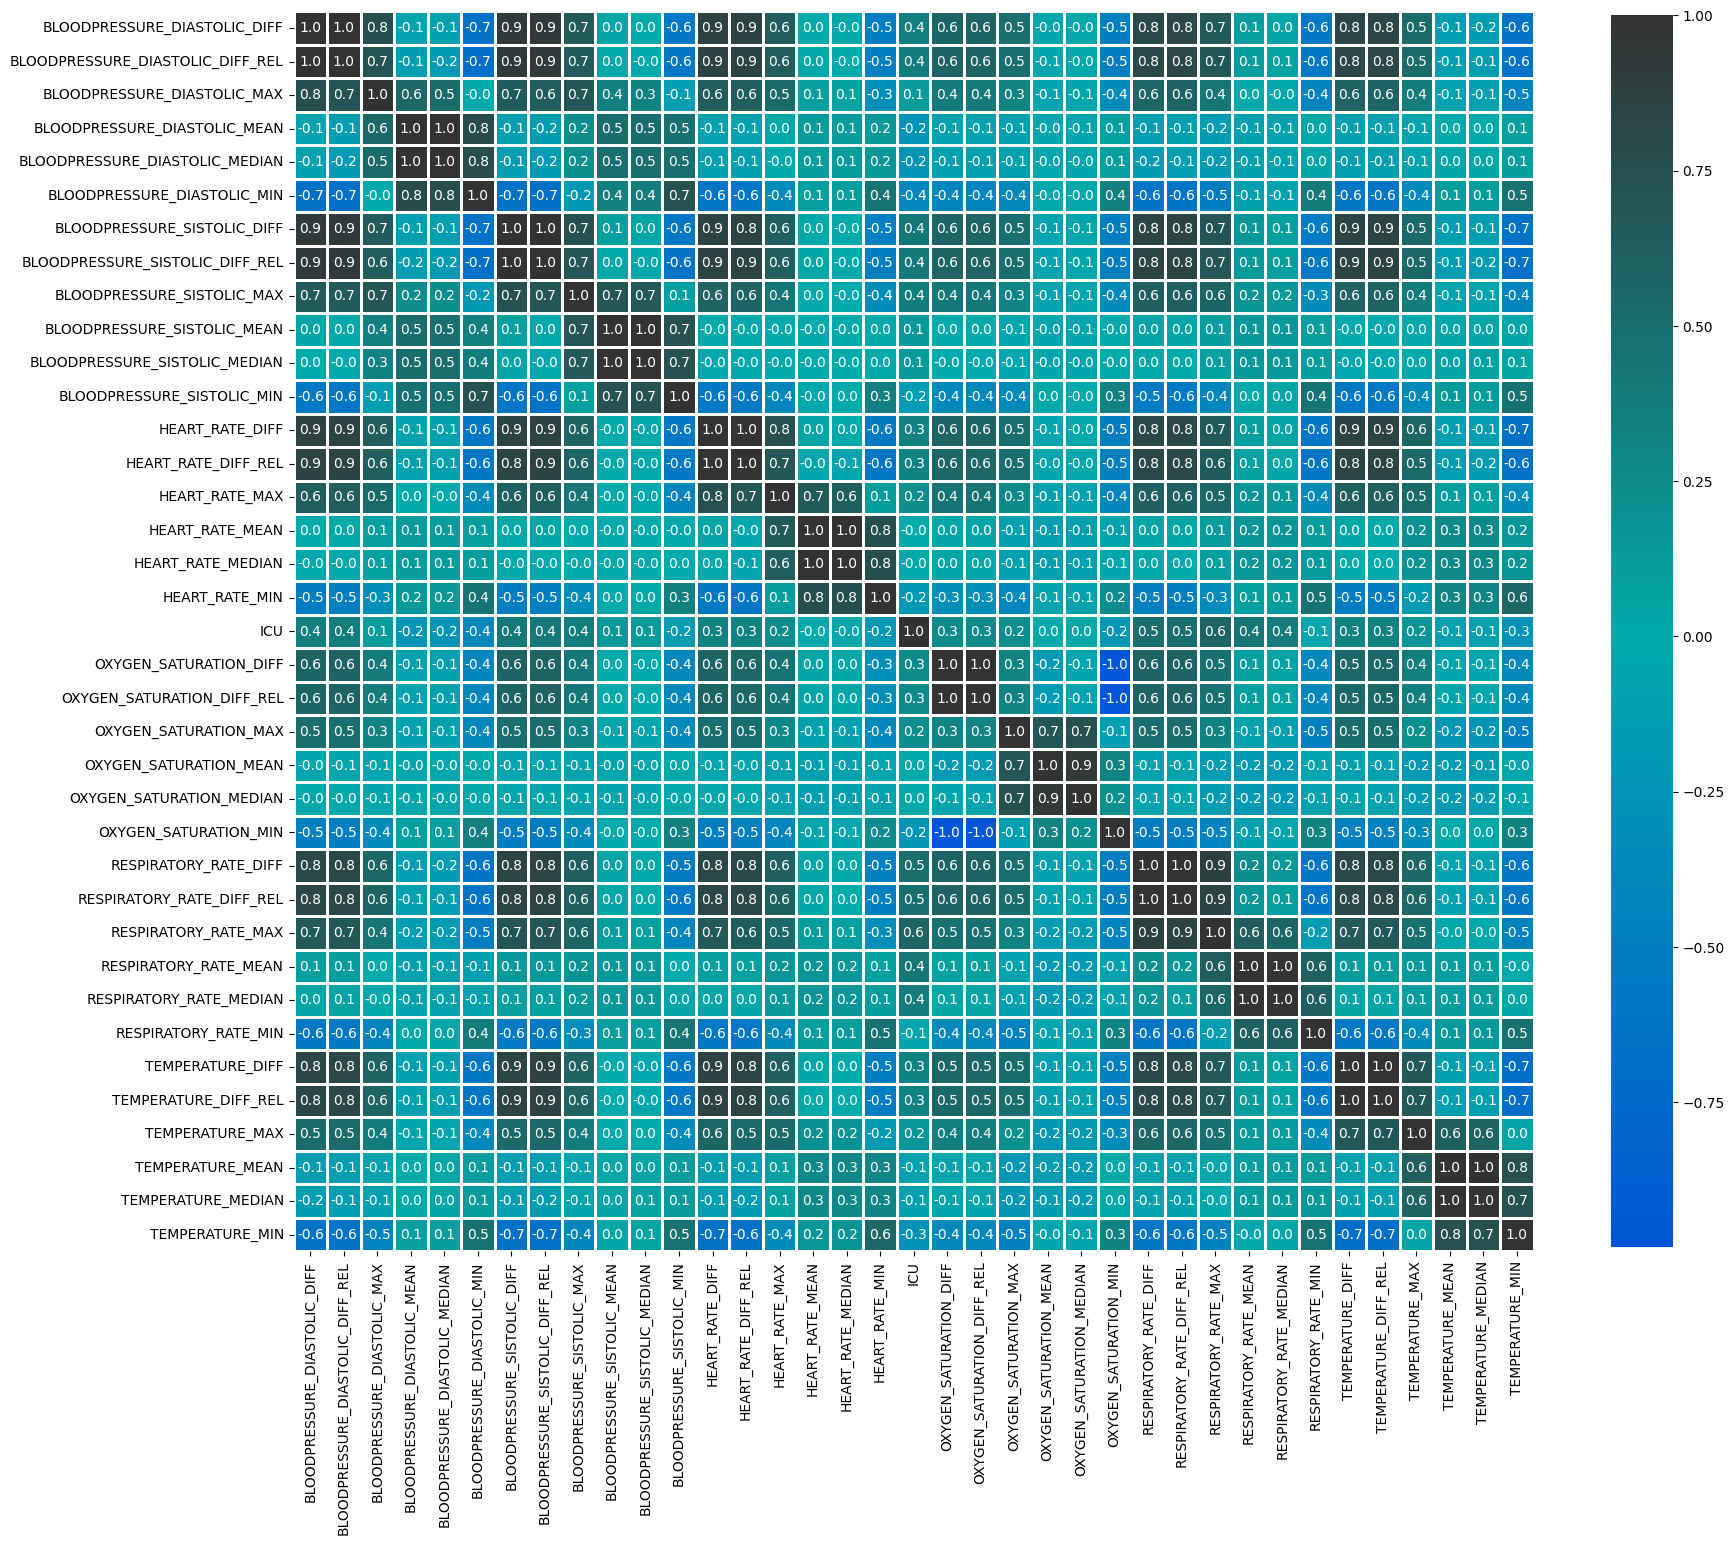

In [ ]:
cmap = sns.color_palette('winter_d', as_cmap=True)
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(vital_df.corr()
            , cmap=cmap
            , vmax=1.0
            , center=0
            , fmt='.1f'
            , square=True
            , linewidths=.9
            , annot=True
            , cbar_kws={"shrink": .8})
plt.show()

**Observation**

We have features that are highly correlated. Specifically, we can see high correlation among diff and diff_rel features. Diff has been calculated by using min and max, diff_rel calculation uses diff in its calculation.

Due to high correlation we can consider to drop those features.

## **MACHINE LEARNING APPROACHES EXPLANATION**

After the EDA section we came up with two different approaches we agreed to explore:

### Approach 1

This methodology prioritizes practical application and centers around providing a real-life solution to a pressing issue. The primary motivation is to develop a model that can be effectively utilized in the early stages of hospital admission for COVID-19 patients. It relies on demographic data, grouped disease information, and vital signs data to forecast whether a patient will require admission to the ICU.

The model is designed for immediate use as soon as vital signs measurements become accessible.

### Approach 2

This strategy incorporates demographic information, categorized diseases, vital signs, and all data available until a patient is admitted to the ICU.

Recognizing that blood data requires laboratory processing, we understand that sending hundreds, or even thousands of samples for processing could put extra pressure on healthcare system and its need of lab specialists.
Nevertheless, we chose to investigate this option due to our curiosity about the potential accuracy enhancement that including blood data in the model could bring.

Throuout this approach we will make an assumption that blood test results are available at earlier stage of patients hospital admission.

## **APPROACH 1**

### Data Preparation for Machine Learning [Approach 1]

In this approach we are going to use the earliest data available for patients, which is data from 0-2 time window. Since we would like to classify if a patient was or wasn't admitted to ICU at any time during their stay in hospital, we use ICU column in time window ABOVE_12.

In the EDA section we discussed and showed that blood data is available with a significant data lag (often 12+ hours after admission to hospital). For that reason, we will drop this data as we won't have it early enough for our data model to make predictions.

We will keep vital signs data. As per EDA we will drop columns with suffix _diff and _diff_rel.

#### Data Selection & Cleaning

In [ ]:
# Create a df_1 as a copy of our original df:
df_1 = df.copy()

In [ ]:
# As mentioned in EDA patient with ID 199 has no data and we can drop all rows related to this ID:
df_1.drop(df_1[df_1.PATIENT_VISIT_IDENTIFIER == 199].index, inplace=True)

In [ ]:
# Drop blood test data:
df_1.drop(df_1[list(meta_data.index[meta_data.category == 'blood_result'])], inplace=True, axis=1)

We decided to keep diff and diff_rel vital signs data. Their removal affected model accuracy negatively. Code was kept for possible experimenting with additional ML techniques.

In [ ]:
# Drop features with suffix diff and diff_rel:
#df_1.drop(df_1[list(meta_data.index[(meta_data.category == 'vital_signs') & ((meta_data.stats == 'diff') | (meta_data.stats == 'diff_rel'))])], inplace=True, axis=1)
#df_1.drop(df_1[list(meta_data.index[(meta_data.category == 'vital_signs') & (meta_data.stats == 'diff')])], inplace=True, axis=1)

As per EDA we still have 36-38% of data missing in our vital signs columns. For filling in missing values we will use the latest data available per patient and use the technique called backfilling.

In [ ]:
# Backfill missing values:
df_1 = df_1.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])\
    .groupby(['PATIENT_VISIT_IDENTIFIER'], as_index=False, group_keys=False)\
    .apply(lambda group: group.ffill().bfill())\
    .reset_index(drop=True)

Now we select data from earliest window and overall result for ICU admission and merge it together by using patient ID.

In [ ]:
# Selecting earliest time window data 0-2 and droppig window and icu columns:
data_df = df_1[df_1.WINDOW == '0-2'].drop(['WINDOW', 'ICU'], axis =1)

In [ ]:
# Selecting overall result for ICU admission and patient ID:
data_icu = df_1[['PATIENT_VISIT_IDENTIFIER', 'ICU', 'WINDOW']]
data_icu = data_icu[df_1.WINDOW == 'ABOVE_12'].drop(['WINDOW'], axis =1)

In [ ]:
# Merging data and target (ICU) by patient ID:
data_1 = data_df.merge(data_icu,on='PATIENT_VISIT_IDENTIFIER')

In [ ]:
# Display data_1 header:
data_1.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         1            1          90th       1   
2                         2            0          10th       0   
3                         3            0          40th       1   
4                         4            0          10th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 0.0                 0.0  1.0   
2                 0.0                 0.0                 0.0  0.0   
3                 0.0                 0.0                 0.0  0.0   
4                 0.0                 0.0                 0.0  0.0   

   IMMUNOCOMPROMISED  OTHER  BLOODPRESSURE_DIASTOLIC_MEAN  \
0                0.0    1.0                      0.086420   
1                1.0    1.0                     -0.283951   
2                0.0    1.0                     -0.489712   
3                1.0    1.0                      0.012346   
4                0.0    1.0                      0.333333   

   BLOODPRESSURE_SISTOLIC_MEAN  HEART_RATE_MEAN  RESPIRATORY_RATE_MEAN  \
0                    -0.230769        -0.283019              -0.593220   
1                    -0.046154         0.188679               0.830508   
2                    -0.685470        -0.048218              -0.645951   
3                    -0.369231        -0.528302              -0.457627   
4                    -0.153846         0.160377              -0.593220   

   TEMPERATURE_MEAN  OXYGEN_SATURATION_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN  \
0         -0.285714                0.736842                        0.086420   
1         -0.107143                1.000000                       -0.283951   
2          0.357143                0.935673                       -0.506173   
3         -0.285714                0.684211                        0.012346   
4          0.285714                0.868421                        0.333333   

   BLOODPRESSURE_SISTOLIC_MEDIAN  HEART_RATE_MEDIAN  RESPIRATORY_RATE_MEDIAN  \
0                      -0.230769          -0.283019                -0.586207   
1                      -0.046154           0.188679                 0.862069   
2                      -0.815385          -0.056604                -0.517241   
3                      -0.369231          -0.528302                -0.448276   
4                      -0.153846           0.160377                -0.586207   

   TEMPERATURE_MEDIAN  OXYGEN_SATURATION_MEDIAN  BLOODPRESSURE_DIASTOLIC_MIN  \
0           -0.285714                  0.736842                     0.237113   
1           -0.107143                  1.000000                    -0.072165   
2            0.357143                  0.947368                    -0.525773   
3           -0.285714                  0.684211                     0.175258   
4            0.285714                  0.868421                     0.443299   

   BLOODPRESSURE_SISTOLIC_MIN  HEART_RATE_MIN  RESPIRATORY_RATE_MIN  \
0                      0.0000       -0.162393             -0.500000   
1                      0.1500        0.264957              1.000000   
2                     -0.5125       -0.111111             -0.714286   
3                     -0.1125       -0.384615             -0.357143   
4                      0.0000        0.196581             -0.571429   

   TEMPERATURE_MIN  OXYGEN_SATURATION_MIN  BLOODPRESSURE_DIASTOLIC_MAX  \
0         0.208791               0.898990   

Check for duplicates:

In [ ]:
# Check dataframe's shape:
data_1.shape

(384, 50)

In [ ]:
# Drop duplicates and re-check datset's shape:
data_1 = data_1.drop_duplicates()
data_1.shape

(384, 50)

**Observation**

The shape of dataset is the same after dropping duplicated rows with 385 rows and 38 columns. Hence, it has no dupes.

Here, we were considering a variance check, however data was already scaled.
Changing the scale of data values affects the variance. MinMaxScaler was used on this dataset, which means the variance values are between -1 and 1 across all the features. Hence, we opted out of variance check.

#### Feature Engineering

Feature engineering is the process of selecting and transforming variables when creating a predictive model using machine learning.


LABEL ENCODING & DATA SCALING

In this section, we resolve the problem with AGE_PERCENTIL by using label encoding. We also engineer new features based on those that already exist.

In [ ]:
# Label encoding for column AGE_PERCENTIL:
labelencoder = LabelEncoder()
data_1['AGE_PERCENTIL'] = labelencoder.fit_transform(data_1['AGE_PERCENTIL'])

# Scale AGE_PERCENTIL by using MinMaxScaler:
scaler = MinMaxScaler()
data_1['AGE_PERCENTIL'] = scaler.fit_transform(data_1['AGE_PERCENTIL'].values.reshape(-1, 1))

In [ ]:
data_1.AGE_PERCENTIL.unique()

array([0.55555556, 0.88888889, 0.        , 0.33333333, 0.66666667,
       0.11111111, 0.44444444, 0.77777778, 0.22222222, 1.        ])

In above we assigned a label to AGE_PERCENTIL data. Label is a number for each unique entry of the feature. We then used MinMaxScaler so our models interpret those features on the same scale as others.



DATA ENGINEERING

In this section, we create new features for vital signs. We take a sum of min and max columns of the same features and divide them by 2. New features will have the same feature name but avg suffix.

In [ ]:
data_1['DISEASE_AVG'] = (data_1['DISEASE GROUPING 1'] +
                         data_1['DISEASE GROUPING 2'] +
                         data_1['DISEASE GROUPING 3'] +
                         data_1['DISEASE GROUPING 4'] +
                         data_1['DISEASE GROUPING 5'] +
                         data_1['DISEASE GROUPING 6'])/6

In [ ]:
# Create a function that calculates AVG as MAX+MIN/2:
def vital_metrics_avg(_X, vital_metrics):

    _X_vital_metrics = pd.DataFrame()
    for l in vital_metrics:
        try:
            _X_vital_metrics[l + '_AVG'] = (_X[l + '_MAX'] + _X[l + '_MIN'])/2
        except:
            pass

    return _X_vital_metrics

# Find features that have a "_MAX" in it, in medical datasets these are usually vitals & lab features:
vital_metrics = [c.replace("_MAX", "") for c in data_1.columns.tolist() if 'MAX' in c]

# Create dataset for engineered features:
data_lab_metrics = vital_metrics_avg(data_1, vital_metrics)

In [ ]:
#Show statistics for lab_metrics data:
data_lab_metrics.describe().transpose()

count      mean       std       min       25%  \
BLOODPRESSURE_DIASTOLIC_AVG  384.0 -0.103481  0.204357 -0.571064 -0.212794   
BLOODPRESSURE_SISTOLIC_AVG   384.0 -0.286089  0.226322 -0.770946 -0.462838   
HEART_RATE_AVG               384.0 -0.258859  0.237482 -0.761896 -0.425692   
RESPIRATORY_RATE_AVG         384.0 -0.426170  0.238018 -0.969697 -0.568182   
TEMPERATURE_AVG              384.0  0.179484  0.202042 -0.441949  0.021659   
OXYGEN_SATURATION_AVG        384.0  0.835505  0.110431 -0.383838  0.781499   

                                  50%       75%       max  
BLOODPRESSURE_DIASTOLIC_AVG -0.108468 -0.005375  0.692308  
BLOODPRESSURE_SISTOLIC_AVG  -0.323818 -0.143708  0.702703  
HEART_RATE_AVG              -0.281605 -0.121508  0.710996  
RESPIRATORY_RATE_AVG        -0.502165 -0.370130  0.818182  
TEMPERATURE_AVG              0.165313  0.288740  0.811594  
OXYGEN_SATURATION_AVG        0.854333  0.890750  1.000000

In [ ]:
# Combine engineered features into data_1 dataframe
data_1 = pd.concat([data_1, data_lab_metrics], axis = 1)
data_1.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                         0            1       0.555556       0   
1                         1            1       0.888889       1   
2                         2            0       0.000000       0   
3                         3            0       0.333333       1   
4                         4            0       0.000000       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 0.0                 0.0  1.0   
2                 0.0                 0.0                 0.0  0.0   
3                 0.0                 0.0                 0.0  0.0   
4                 0.0                 0.0                 0.0  0.0   

   IMMUNOCOMPROMISED  OTHER  BLOODPRESSURE_DIASTOLIC_MEAN  \
0                0.0    1.0                      0.086420   
1                1.0    1.0                     -0.283951   
2                0.0    1.0                     -0.489712   
3                1.0    1.0                      0.012346   
4                0.0    1.0                      0.333333   

   BLOODPRESSURE_SISTOLIC_MEAN  HEART_RATE_MEAN  RESPIRATORY_RATE_MEAN  \
0                    -0.230769        -0.283019              -0.593220   
1                    -0.046154         0.188679               0.830508   
2                    -0.685470        -0.048218              -0.645951   
3                    -0.369231        -0.528302              -0.457627   
4                    -0.153846         0.160377              -0.593220   

   TEMPERATURE_MEAN  OXYGEN_SATURATION_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN  \
0         -0.285714                0.736842                        0.086420   
1         -0.107143                1.000000                       -0.283951   
2          0.357143                0.935673                       -0.506173   
3         -0.285714                0.684211                        0.012346   
4          0.285714                0.868421                        0.333333   

   BLOODPRESSURE_SISTOLIC_MEDIAN  HEART_RATE_MEDIAN  RESPIRATORY_RATE_MEDIAN  \
0                      -0.230769          -0.283019                -0.586207   
1                      -0.046154           0.188679                 0.862069   
2                      -0.815385          -0.056604                -0.517241   
3                      -0.369231          -0.528302                -0.448276   
4                      -0.153846           0.160377                -0.586207   

   TEMPERATURE_MEDIAN  OXYGEN_SATURATION_MEDIAN  BLOODPRESSURE_DIASTOLIC_MIN  \
0           -0.285714                  0.736842                     0.237113   
1           -0.107143                  1.000000                    -0.072165   
2            0.357143                  0.947368                    -0.525773   
3           -0.285714                  0.684211                     0.175258   
4            0.285714                  0.868421                     0.443299   

   BLOODPRESSURE_SISTOLIC_MIN  HEART_RATE_MIN  RESPIRATORY_RATE_MIN  \
0                      0.0000       -0.162393             -0.500000   
1                      0.1500        0.264957              1.000000   
2                     -0.5125       -0.111111             -0.714286   
3                     -0.1125       -0.384615             -0.357143   
4                      0.0000        0.196581             -0.571429   

   TEMPERATURE_MIN  OXYGEN_SATURATION_MIN  BLOODPRESSURE_DIASTOLIC_MAX  \
0         0.208791               0.898

### **Machine Learning Model Development [Approach 1]**

In this section we check target distribution, split dataset into two parts train and test and train and evaluate machine learning models for classification.

In [ ]:
# Display percentage (%) of values for each class (1, 0) in our target column:
data_1['ICU'].value_counts(normalize=True) * 100

1    50.78125
0    49.21875
Name: ICU, dtype: float64

Observing target distribution, this dataset is balanced and we are expecting the accuracy to be higher than 51%.

In [ ]:
X=data_1.drop(['PATIENT_VISIT_IDENTIFIER', 'ICU'], axis = 1)
y=data_1.ICU

In [ ]:
# Import train_test_split form sklearn:
from sklearn.model_selection import train_test_split

# Keep 30% of data for testing:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = 0.2
                                                    , shuffle = True
                                                    #, stratify =y
                                                    , random_state=42)



For machine learning model we are going to explore the following classification models:
- Logistic Regression
- Support Vector Classifier (SVC)
- Random Forest

#### LOGISTIC REGRESSION

In [ ]:
# Logistic Regression

# Train the Logistic Regression model
lr_1 = LogisticRegression()
lr_1.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr_1.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

# Predict on the test set
y_pred = lr_1.predict(X_test)
y_pred_proba_lr = lr_1.predict_proba(X_test)[:, 1]

# Calculate metrics on the training set
acc_lr_train = round(lr_1.score(X_train, y_train) * 100, 2)

# Calculate metrics on the test set
acc_lr_test = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_lr = round(f1_score(y_test, y_pred, average='weighted'), 2)
precision_lr = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_lr = round(recall_score(y_test, y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_lr = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (Logistic Regression):", acc_lr_train)
print("Test Accuracy (Logistic Regression):", acc_lr_test)
print("F1 Score (Logistic Regression):", f1_lr)
print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)
print("Specificity (Logistic Regression):", specificity_lr)

Training Accuracy (Logistic Regression): 73.29
Test Accuracy (Logistic Regression): 67.53
F1 Score (Logistic Regression): 0.68
Precision (Logistic Regression): 0.68
Recall (Logistic Regression): 0.68
Specificity (Logistic Regression): 0.65


Logistic regression model seems to provide a reasonable balance between precision and recall, as evidenced by the F1 score. To improve performance we will tune hyperparameters.

LOGISTIC REGRESSION WITH HYPERPARATERS TUNED

In [ ]:
# Logistic Regression

# Train the Logistic Regression model with best hyperparameters
lr_1 = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')

lr_1.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr_1.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

# Predict on the test set
y_pred = lr_1.predict(X_test)
y_pred_proba_lr = lr_1.predict_proba(X_test)[:, 1]

# Calculate metrics on the training set
acc_lr_train = round(lr_1.score(X_train, y_train) * 100, 2)

# Calculate metrics on the test set
acc_lr_test = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_lr = round(f1_score(y_test, y_pred, average='weighted'), 2)
precision_lr = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_lr = round(recall_score(y_test, y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_lr = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (Logistic Regression):", acc_lr_train)
print("Test Accuracy (Logistic Regression):", acc_lr_test)
print("F1 Score (Logistic Regression):", f1_lr)
print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)
print("Specificity (Logistic Regression):", specificity_lr)

Training Accuracy (Logistic Regression): 72.31
Test Accuracy (Logistic Regression): 70.13
F1 Score (Logistic Regression): 0.7
Precision (Logistic Regression): 0.7
Recall (Logistic Regression): 0.7
Specificity (Logistic Regression): 0.68


The hyperparameter tuning appears to have positively impacted the logistic regression model. The test accuracy, F1 score, precision, and recall have all improved, indicating better overall performance.

##### CONFUSION MATRIX

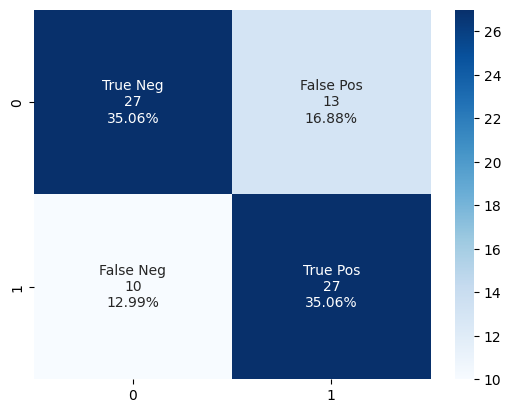

In [ ]:
# Print confusion matrix:
def plot_cm(actual, pred):
    cm = confusion_matrix(actual, pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plot_cm(y_test,y_pred)

##### ROC CURVE

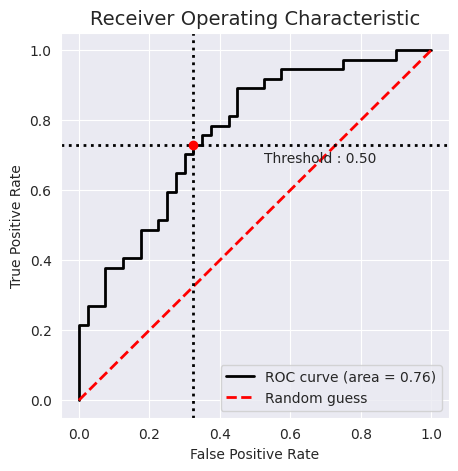

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_proba_lr, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In summary, with an AUC-ROC value of 0.76, our model is reasonably good at distinguishing between positive and negative instances. The ROC curve provides insights into how the model's performance varies across different threshold values.

##### FEATURE IMPORTANCE

Logistic regression boils down to an equation in which coefficients or importances are assigned to each input value. After we fit the model feature importance is stored in the coef_ property.

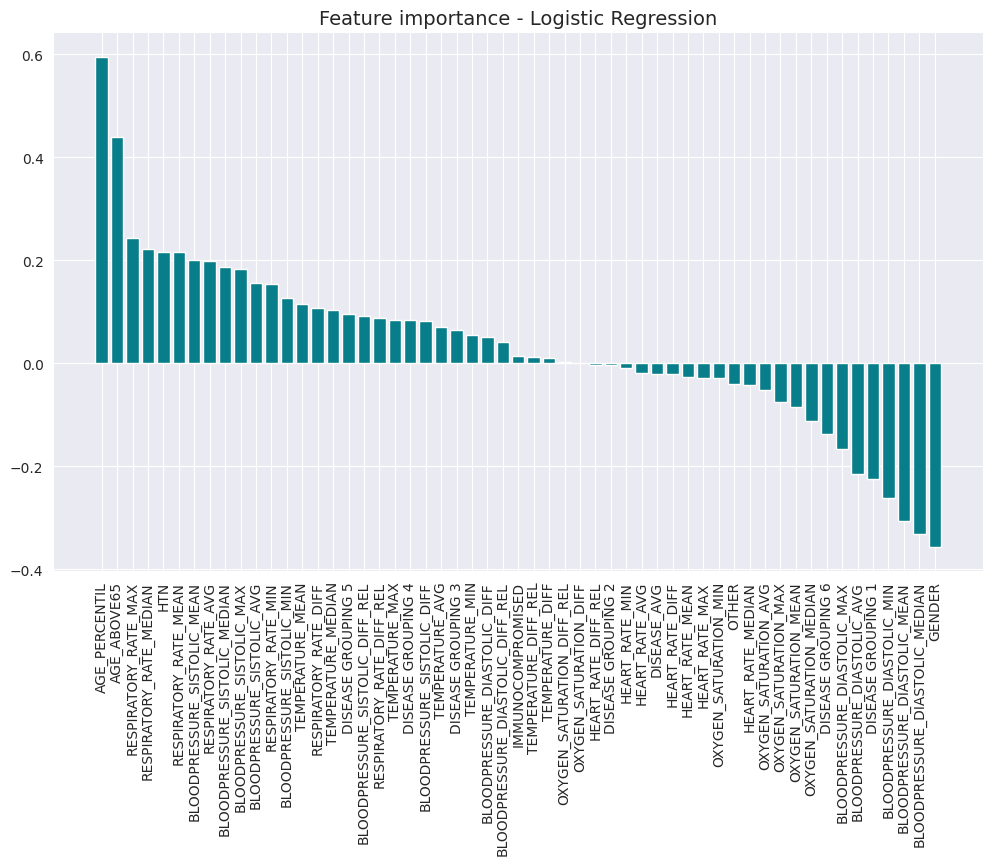

In [ ]:
plt.figure(figsize=(12,7))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importance - Logistic Regression')
plt.xticks(rotation='vertical', fontsize=10)

plt.show()

Our problem is a classification with classes 0 and 1. Coefficients of importance are both positive and negative. The positive scores indicate features that predicts class 1 and the negative scores indicate a features that predicts class 0.

**Observation**

- Top five features to classify target 1 are: AGE_PERCENTIL, RESPIRATORY_RATE_MAX, HTN, DISEASE GROUPING 4 AND RESPIRATORY_RATE_MEDIAN.

- Top five features to help classify target 0 are: GENDER, BLOODPRESSURE_DIASTOLIC MEAN, MEDIAN, MAX and DISESE GROUPING 5.

We believe that GENDER should not be a decision factor for patient not being admitted to ICU when needed. This is a potential bias issue.



#### SUPPORT VECTOR CLASSIFIER (SVC)

In [ ]:
# Support Vector Classifier

# Train the Support Vector Classifier (SVC)
svc = SVC(kernel='sigmoid', C=20)
svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()

importances = pd.DataFrame(data={
    'Attribute': np.array(X_train.columns),
    'Importance': perm_importance.importances_mean[sorted_idx]})
importances = importances.sort_values(by='Importance', ascending=False)

# Predict on the test set
y_pred = svc.predict(X_test)
y_pred_proba_svc = svc.decision_function(X_test)

# Calculate metrics on the training set
acc_svc_train = round(svc.score(X_train, y_train) * 100, 2)

# Calculate metrics on the test set
acc_svc_test = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_svc = round(f1_score(y_test, y_pred, average='weighted'), 2)
precision_svc = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_svc = round(recall_score(y_test, y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_svc = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (SVC):", acc_svc_train)
print("Test Accuracy (SVC):", acc_svc_test)
print("F1 Score (SVC):", f1_svc)
print("Precision (SVC):", precision_svc)
print("Recall (SVC):", recall_svc)
print("Specificity (SVC):", specificity_svc)

Training Accuracy (SVC): 63.84
Test Accuracy (SVC): 67.53
F1 Score (SVC): 0.67
Precision (SVC): 0.69
Recall (SVC): 0.68
Specificity (SVC): 0.55


Here, we can notice that training accuracy is lower than test accuracy 63.84 and 67.53 respectively. This may be caused by model complexity or relatively small training data where model doesn't have enough examples to learn underlying patterns effectively.
Overperforming on test data may be due to random data split not being representative enough.

In general, the SVC's performance metrics suggest a moderate level of accuracy, with a decent balance between precision and recall. The model is capturing a substantial portion of positive instances, but there is room for improvement, especially in terms of specificity.

Let's perform hyperparameters tuning to try improving this model.

SVC WITH HYPERPARAMTERS TUNED

In [ ]:
# Support Vector Classifier

# Train the Support Vector Classifier (SVC) with best hyperparameters
svc = SVC(C=0.1, gamma='scale', kernel='poly', probability=True)
svc.fit(X_train, y_train)
svc_1 = svc

perm_importance = permutation_importance(svc, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()

importances = pd.DataFrame(data={
    'Attribute': np.array(X_train.columns),
    'Importance': perm_importance.importances_mean[sorted_idx]})
importances = importances.sort_values(by='Importance', ascending=False)

# Predict on the test set
y_pred = svc.predict(X_test)
y_pred_proba_svc = svc.decision_function(X_test)

# Calculate metrics on the training set
acc_svc_train = round(svc.score(X_train, y_train) * 100, 2)

# Calculate metrics on the test set
acc_svc_test = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_svc = round(f1_score(y_test, y_pred, average='weighted'), 2)
precision_svc = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_svc = round(recall_score(y_test, y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_svc = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (SVC):", acc_svc_train)
print("Test Accuracy (SVC):", acc_svc_test)
print("F1 Score (SVC):", f1_svc)
print("Precision (SVC):", precision_svc)
print("Recall (SVC):", recall_svc)
print("Specificity (SVC):", specificity_svc)

Training Accuracy (SVC): 70.68
Test Accuracy (SVC): 68.83
F1 Score (SVC): 0.69
Precision (SVC): 0.69
Recall (SVC): 0.69
Specificity (SVC): 0.68


After hyperparameters tuning the test accuracy is close to the training accuracy, suggesting that the model generalizes reasonably well to unseen data, and there is not a significant overfitting issue.


##### CONFUSION MATRIX




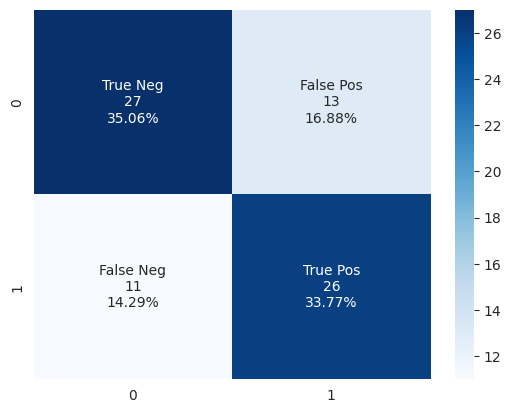

In [ ]:
plot_cm(y_test,y_pred)

##### ROC CURVE

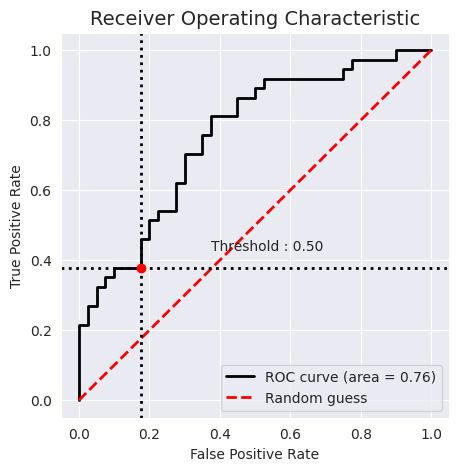

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_proba_svc, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

##### FEATURE IMPORTANCE

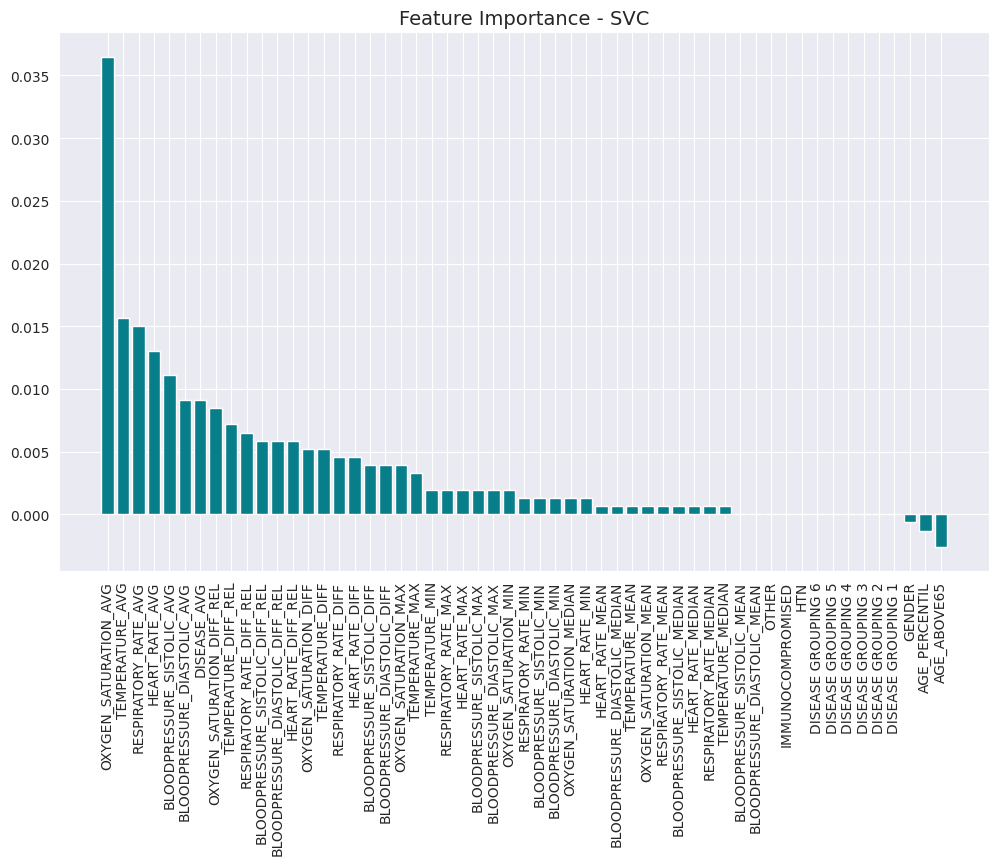

In [ ]:
# Plot feature importance for SVC
plt.figure(figsize=(12,7))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importance - SVC')
plt.xticks(rotation='vertical', fontsize=10)

plt.show()

**Observation**

- Independent variables that were feature engineered appear to have hight importance for this model.

- Disease groupping features have no weight according to our feature importance chart.

#### RANDOM FOREST

In [ ]:
#Random Forest

# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rf.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calculate metrics on the training set
acc_rf_train = round(rf.score(X_train, y_train) * 100, 2)

# Calculate metrics on the test set
acc_rf_test = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_rf = round(f1_score(y_test, y_pred, average='weighted'), 2)
precision_rf = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_rf = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (Random Forest):", acc_rf_train)
print("Test Accuracy (Random Forest):", acc_rf_test)
print("F1 Score (Random Forest):", f1_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("Specificity (Random Forest):", specificity_rf)

Training Accuracy (Random Forest): 100.0
Test Accuracy (Random Forest): 66.23
F1 Score (Random Forest): 0.66
Precision (Random Forest): 0.67
Recall (Random Forest): 0.66
Specificity (Random Forest): 0.57


The perfect 100 training accuracy and much lower test accuracy 64.94 means that model is overfitting. The model has momorized training data, but struggles to geralize to unseen data.

RANDOM FOREST HYPERPARAMETERS TUNED

In [ ]:
#Random Forest

# Train the Random Forest model
rf_classifier = RandomForestClassifier(max_features='sqrt', n_estimators=100)
rf.fit(X_train, y_train)
rf_1 = rf

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rf.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calculate metrics on the training set
acc_rf_train = round(rf.score(X_train, y_train) * 100, 2)

# Calculate metrics on the test set
acc_rf_test = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_rf = round(f1_score(y_test, y_pred, average='weighted'), 2)
precision_rf = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_rf = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (Random Forest):", acc_rf_train)
print("Test Accuracy (Random Forest):", acc_rf_test)
print("F1 Score (Random Forest):", f1_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("Specificity (Random Forest):", specificity_rf)

Training Accuracy (Random Forest): 100.0
Test Accuracy (Random Forest): 68.83
F1 Score (Random Forest): 0.69
Precision (Random Forest): 0.69
Recall (Random Forest): 0.69
Specificity (Random Forest): 0.62


The Random Forest model is still overfitting even after simple hyperparameter tuning. To reduce overfitting we could also try tuning the following: max_depth, min_samples_split or min_samples_leaf.

However we already have two models that perform relatively well and without overfitting. At this stage we won't proceed with further hyperparameter tuning.

##### CONFUSION MATRIX

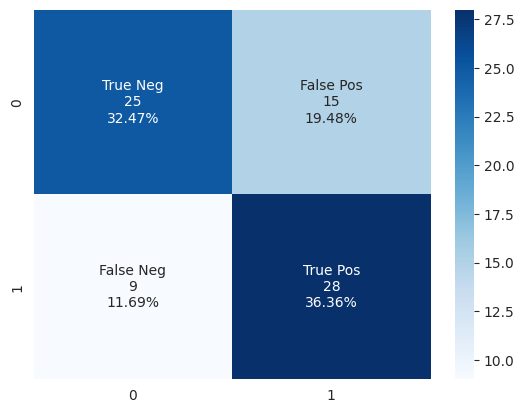

In [ ]:
plot_cm(y_test,y_pred)

ROC CURVE

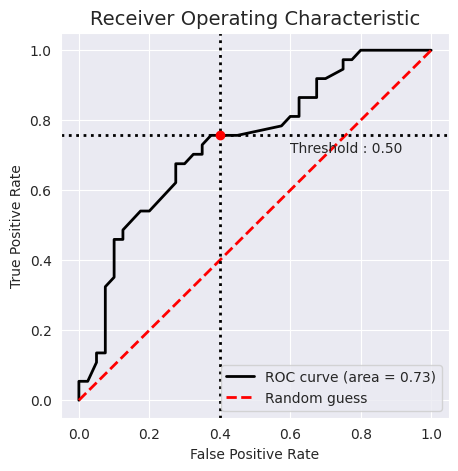

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_proba_rf, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

##### FEATURE IMPORTANCE

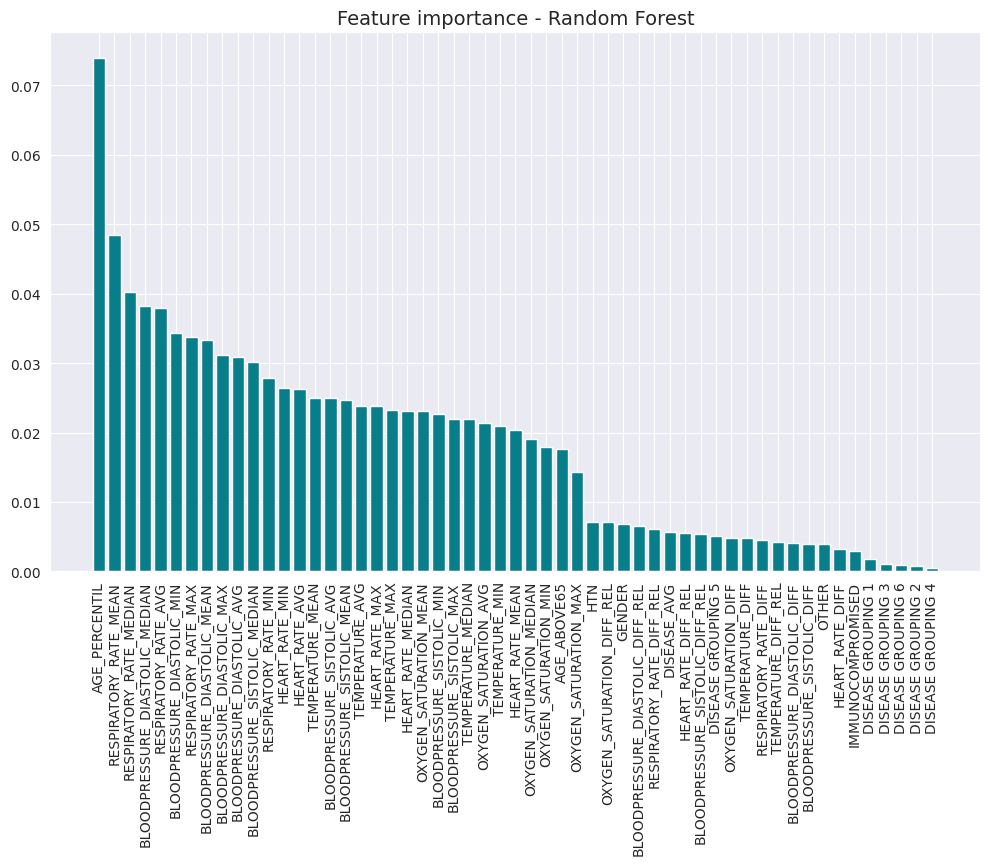

In [ ]:
plt.figure(figsize=(12,7))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importance - Random Forest')
plt.xticks(rotation='vertical', fontsize=10)

plt.show()

#### MODELS PERFORMANCE SUMMARY

In [ ]:
# In the context of medical diagnosis where false negatives are particularly concerning, recall (sensitivity) might be the most importnat metric, so high ICU admission risk will not go undetected


models = pd.DataFrame(
    {

    'Model': ['Logistic Regression'
              ,'Support Vector Classifier'
              , 'Random Forest'],

    'Recall':[recall_lr
             , recall_svc
             , recall_rf],

    'Precision':[precision_lr
              , precision_svc
              , precision_rf],

     'Specificity':[specificity_lr
              , specificity_svc
              , specificity_rf],

    'Traning accuracy': [acc_lr_train
              , acc_svc_train
              , acc_rf_train],

    'Test accuracy':[acc_lr_test
              , acc_svc_test
               , acc_rf_test],

     'F1 Score' : [f1_lr
              , f1_svc
              , f1_rf]


})

models.sort_values(by='Recall', ascending=False, ignore_index=True)

Model  Recall  Precision  Specificity  \
0        Logistic Regression    0.70       0.70         0.68   
1  Support Vector Classifier    0.69       0.69         0.68   
2              Random Forest    0.69       0.69         0.62   

   Traning accuracy  Test accuracy  F1 Score  
0             72.31          70.13      0.70  
1             70.68          68.83      0.69  
2            100.00          68.83      0.69

**Observations**

In conclusion, while the Random Forest model achieves perfect accuracy during training, its evident overfitting leads to poor performance on the test dataset. In scenario where blood data is not available, Logistic Regression is the preferred model, with relatively good ability to identify patients needing more attention with Recall at 70%.

SVC model has comparable, but slightly worse performance.

It would be interesting to see if the performance of this model can improve by having more data available. We have have been working with significantly less data when compared to the upcoming approach 2.

### Hyperparameter Tuning [Approach 1]

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = [ 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search:
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator = lr_1, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall', error_score=0)

# Run gridsearch fit:
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.738611 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.668194 (0.108165) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.672222 (0.106905) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.668194 (0.108165) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.665972 (0.101248) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.668333 (0.100339) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.670417 (0.095896) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.670417 (0.095896) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.672639 (0.096553) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.672639 (0.096553) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.679028 (0.094333) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.693889 (0.106255) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.693889 (0.106255) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.687639 (0.110646) with: {'C': 1.0, 'pena

SUPPORT VECTOR CLASSIFIER (SVC)

In [ ]:
# define model and parameters

kernel = ['poly', 'rbf', 'sigmoid']
C = [20, 15, 10, 5, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.649861 (0.108052) with: {'C': 20, 'gamma': 'scale', 'kernel': 'poly'}
0.681389 (0.112349) with: {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}
0.606667 (0.139483) with: {'C': 20, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.679306 (0.117322) with: {'C': 15, 'gamma': 'scale', 'kernel': 'poly'}
0.683611 (0.122029) with: {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
0.596111 (0.132868) with: {'C': 15, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.685556 (0.119241) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.679444 (0.120156) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.606389 (0.112251) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.690000 (0.108646) with: {'C': 5, 'gamma': 'scale', 'kernel': 'poly'}
0.669167 (0.113822) with: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
0.642500 (0.121623) with: {'C': 5, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.679722 (0.105890) with: {'C': 1.0, 'gamma': 'scale', 'kern

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.726528 using {'max_features': 'log2', 'n_estimators': 100}
0.611111 (0.154868) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.713889 (0.123042) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.720139 (0.099629) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.592917 (0.116667) with: {'max_features': 'log2', 'n_estimators': 10}
0.726528 (0.114365) with: {'max_features': 'log2', 'n_estimators': 100}
0.715972 (0.109519) with: {'max_features': 'log2', 'n_estimators': 1000}


## **APPROACH 2**

### **Data Preparation for Machine Learning [Approach 2]**

In this approach we are going to use the data available for patients from all windows prior to ICU admission.

In the EDA section we discussed and showed that blood data is available with a significant data lag (often 12+ hours after admission to hospital). Due to this issue we will backfill the data as it is assumed that the blood test result although delayed would have been taken at an earlier time during admission and model could be in use as soon as results are received.

In [ ]:
# Create a df_2 as a copy of our original df:
df_2 = df.copy()

In [ ]:
# Print shape (number of rows x columns):
df_2.shape

(1925, 231)

In [ ]:
# As mentioned in EDA patient with ID 199 has no data and we can drop all rows related to this ID:
df_2.drop(df_2[df_2.PATIENT_VISIT_IDENTIFIER == 199].index, inplace=True)

In [ ]:
# Check if patient with ID 199 has been removed:
df_2.shape

(1920, 231)

In [ ]:
# Display descriptive statistics for data columns:
df_2.describe(include='all').transpose()

count unique   top freq        mean  \
PATIENT_VISIT_IDENTIFIER          1920.0    NaN   NaN  NaN  191.981771   
AGE_ABOVE65                       1920.0    NaN   NaN  NaN     0.46875   
AGE_PERCENTIL                       1920     10  20th  215         NaN   
GENDER                            1920.0    NaN   NaN  NaN    0.369792   
DISEASE GROUPING 1                1920.0    NaN   NaN  NaN    0.108333   
DISEASE GROUPING 2                1920.0    NaN   NaN  NaN    0.028125   
DISEASE GROUPING 3                1920.0    NaN   NaN  NaN    0.097917   
DISEASE GROUPING 4                1920.0    NaN   NaN  NaN    0.019792   
DISEASE GROUPING 5                1920.0    NaN   NaN  NaN    0.128125   
DISEASE GROUPING 6                1920.0    NaN   NaN  NaN    0.046875   
HTN                               1920.0    NaN   NaN  NaN    0.213021   
IMMUNOCOMPROMISED                 1920.0    NaN   NaN  NaN    0.158333   
OTHER                             1920.0    NaN   NaN  NaN    0.809896   
ALBUMIN_MEDIAN                     821.0    NaN   NaN  NaN    0.528527   
ALBUMIN_MEAN                       821.0    NaN   NaN  NaN    0.528527   
ALBUMIN_MIN                        821.0    NaN   NaN  NaN    0.528527   
ALBUMIN_MAX                        821.0    NaN   NaN  NaN    0.528527   
ALBUMIN_DIFF                       821.0    NaN   NaN  NaN        -1.0   
BE_ARTERIAL_MEDIAN                 821.0    NaN   NaN  NaN   -0.963433   
BE_ARTERIAL_MEAN                   821.0    NaN   NaN  NaN   -0.963433   
BE_ARTERIAL_MIN                    821.0    NaN   NaN  NaN   -0.963433   
BE_ARTERIAL_MAX                    821.0    NaN   NaN  NaN   -0.963433   
BE_ARTERIAL_DIFF                   821.0    NaN   NaN  NaN        -1.0   
BE_VENOUS_MEDIAN                   821.0    NaN   NaN  NaN   -0.931121   
BE_VENOUS_MEAN                     821.0    NaN   NaN  NaN   -0.931121   
BE_VENOUS_MIN                      821.0    NaN   NaN  NaN   -0.931121   
BE_VENOUS_MAX                      821.0    NaN   NaN  NaN   -0.931121   
BE_VENOUS_DIFF                     821.0    NaN   NaN  NaN        -1.0   
BIC_ARTERIAL_MEDIAN                821.0    NaN   NaN  NaN   -0.310924   
BIC_ARTERIAL_MEAN                  821.0    NaN   NaN  NaN   -0.310924   
BIC_ARTERIAL_MIN                   821.0    NaN   NaN  NaN   -0.310924   
BIC_ARTERIAL_MAX                   821.0    NaN   NaN  NaN   -0.310924   
BIC_ARTERIAL_DIFF                  821.0    NaN   NaN  NaN        -1.0   
BIC_VENOUS_MEDIAN                  821.0    NaN   NaN  NaN   -0.311845   
BIC_VENOUS_MEAN                    821.0    NaN   NaN  NaN   -0.311845   
BIC_VENOUS_MIN                     821.0    NaN   NaN  NaN   -0.311845   
BIC_VENOUS_MAX                     821.0    NaN   NaN  NaN   -0.311845   
BIC_VENOUS_DIFF                    821.0    NaN   NaN  NaN        -1.0   
BILLIRUBIN_MEDIAN                  821.0    NaN   NaN  NaN   -0.945928   
BILLIRUBIN_MEAN                    821.0    NaN   NaN  NaN   -0.945928   
BILLIRUBIN_MIN                     821.0    NaN   NaN  NaN   -0.945928   
BILLIRUBIN_MAX                     821.0    NaN   NaN  NaN   -0.945928   
BILLIRUBIN_DIFF                    821.0    NaN   NaN  NaN        -1.0   
BLAST_MEDIAN                       821.0    NaN   NaN  NaN   -0.994424   
BLAST_MEAN                         821.0    NaN   NaN  NaN   -0.994424   
BLAST_MIN                          821.0    NaN   NaN  NaN   -0.994424   
BLAST_MAX                          821.0    NaN   NaN  NaN   -0.994424   
BLAST_DIFF                         821.0    NaN   NaN  NaN        -1.0   
CALCIUM_MEDIAN                     821.0    NaN   NaN  NaN    0.330359   
CALCIUM_MEAN                       821.0    NaN   NaN  NaN    0.330359   
CALCIUM_MIN                        821.0    NaN   NaN  NaN    0.330359   
CALCIUM_MAX                        821.0    NaN   NaN  NaN    0.330359   
CALCIUM_DIFF                       821.0    NaN   NaN  NaN        -1.0   
CREATININ_MEDIAN                   821.

In [ ]:
# Print out number of missing values for each variable:

df_2 = df_2.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])\
    .groupby(['PATIENT_VISIT_IDENTIFIER'], as_index=False, group_keys=False)\
    .apply(lambda group: group.ffill().bfill())\
    .reset_index(drop=True)

print('NaN values =', df_2.isnull().sum().sum())
print("""""")
vars_with_missing = []
for feature in df_2.columns:
    missings = df_2[feature].isna().sum()
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / df_2.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))


NaN values = 900

Variable ALBUMIN_MEDIAN has 5 records (0.26%) with missing values.
Variable ALBUMIN_MEAN has 5 records (0.26%) with missing values.
Variable ALBUMIN_MIN has 5 records (0.26%) with missing values.
Variable ALBUMIN_MAX has 5 records (0.26%) with missing values.
Variable ALBUMIN_DIFF has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_MEDIAN has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_MEAN has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_MIN has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_MAX has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_DIFF has 5 records (0.26%) with missing values.
Variable BE_VENOUS_MEDIAN has 5 records (0.26%) with missing values.
Variable BE_VENOUS_MEAN has 5 records (0.26%) with missing values.
Variable BE_VENOUS_MIN has 5 records (0.26%) with missing values.
Variable BE_VENOUS_MAX has 5 records (0.26%) with missing values.
Variable BE_VENOUS_DIFF has 5 records (0.26%

In [ ]:
# Using a simple imputer to replace nan values with mean and mode.

mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_2['DIMER_MEDIAN'] = mode_imp.fit_transform(df_2[['DIMER_MEDIAN']]).ravel()
df_2['DIMER_MEAN'] = mean_imp.fit_transform(df_2[['DIMER_MEAN']]).ravel()
df_2['DIMER_MIN'] = mean_imp.fit_transform(df_2[['DIMER_MIN']]).ravel()
df_2['DIMER_MAX'] = mean_imp.fit_transform(df_2[['DIMER_MAX']]).ravel()
df_2['PCR_MEDIAN'] = mode_imp.fit_transform(df_2[['PCR_MEDIAN']]).ravel()
df_2['PCR_MEAN'] = mean_imp.fit_transform(df_2[['PCR_MEAN']]).ravel()
df_2['PCR_MIN'] = mean_imp.fit_transform(df_2[['PCR_MIN']]).ravel()
df_2['PCR_MAX'] = mean_imp.fit_transform(df_2[['PCR_MAX']]).ravel()


In [ ]:
# Re-check dataset for missing values:
print('NaN values =', df_2.isnull().sum().sum())
print("""""")
vars_with_missing = []
for feature in df_2.columns:
    missings = df_2[feature].isna().sum()
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / df_2.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

NaN values = 860

Variable ALBUMIN_MEDIAN has 5 records (0.26%) with missing values.
Variable ALBUMIN_MEAN has 5 records (0.26%) with missing values.
Variable ALBUMIN_MIN has 5 records (0.26%) with missing values.
Variable ALBUMIN_MAX has 5 records (0.26%) with missing values.
Variable ALBUMIN_DIFF has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_MEDIAN has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_MEAN has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_MIN has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_MAX has 5 records (0.26%) with missing values.
Variable BE_ARTERIAL_DIFF has 5 records (0.26%) with missing values.
Variable BE_VENOUS_MEDIAN has 5 records (0.26%) with missing values.
Variable BE_VENOUS_MEAN has 5 records (0.26%) with missing values.
Variable BE_VENOUS_MIN has 5 records (0.26%) with missing values.
Variable BE_VENOUS_MAX has 5 records (0.26%) with missing values.
Variable BE_VENOUS_DIFF has 5 records (0.26%

We have 5 records or 0.26% of variables missing across most of the features in our dataset. Let's find out what's missing and perform data cleaning.

In [ ]:
# Create null_data dataset - containing null values in any column:
null_data = df_2[df_2.isnull().any(axis=1)]
null_data

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
1430                       287            0          10th       0   
1431                       287            0          10th       0   
1432                       287            0          10th       0   
1433                       287            0          10th       0   
1434                       287            0          10th       0   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
1430                 0.0                 0.0                 0.0   
1431                 0.0                 0.0                 0.0   
1432                 0.0                 0.0                 0.0   
1433                 0.0                 0.0                 0.0   
1434                 0.0                 0.0                 0.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
1430                 0.0                 0.0                 0.0  0.0   
1431                 0.0                 0.0                 0.0  0.0   
1432                 0.0                 0.0                 0.0  0.0   
1433                 0.0                 0.0                 0.0  0.0   
1434                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
1430                0.0    1.0             NaN           NaN          NaN   
1431                0.0    1.0             NaN           NaN          NaN   
1432                0.0    1.0             NaN           NaN          NaN   
1433                0.0    1.0             NaN           NaN          NaN   
1434                0.0    1.0             NaN           NaN          NaN   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
1430          NaN           NaN                 NaN               NaN   
1431          NaN           NaN                 NaN               NaN   
1432          NaN           NaN                 NaN               NaN   
1433          NaN           NaN                 NaN               NaN   
1434          NaN           NaN                 NaN               NaN   

      BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
1430              NaN              NaN               NaN               NaN   
1431              NaN              NaN               NaN               NaN   
1432              NaN              NaN               NaN               NaN   
1433              NaN              NaN               NaN               NaN   
1434              NaN              NaN               NaN               NaN   

      BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
1430             NaN            NaN            NaN             NaN   
1431             NaN            NaN            NaN             NaN   
1432             NaN            NaN            NaN             NaN   
1433             NaN            NaN            NaN             NaN   
1434             NaN            NaN            NaN             NaN   

      BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  \
1430                  NaN                NaN               NaN   
1431                  NaN                NaN               NaN   
1432                  NaN                NaN               NaN   
1433                  NaN                NaN               NaN   
1434                  NaN                NaN               NaN   

      BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  \
1430               NaN                NaN                NaN              NaN   
1431               NaN                NaN                NaN              NaN   
1432               NaN                NaN                NaN              NaN   
1433               NaN                NaN                NaN              NaN   
1434               NaN                NaN                NaN              NaN   

      BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_M

<Axes: >

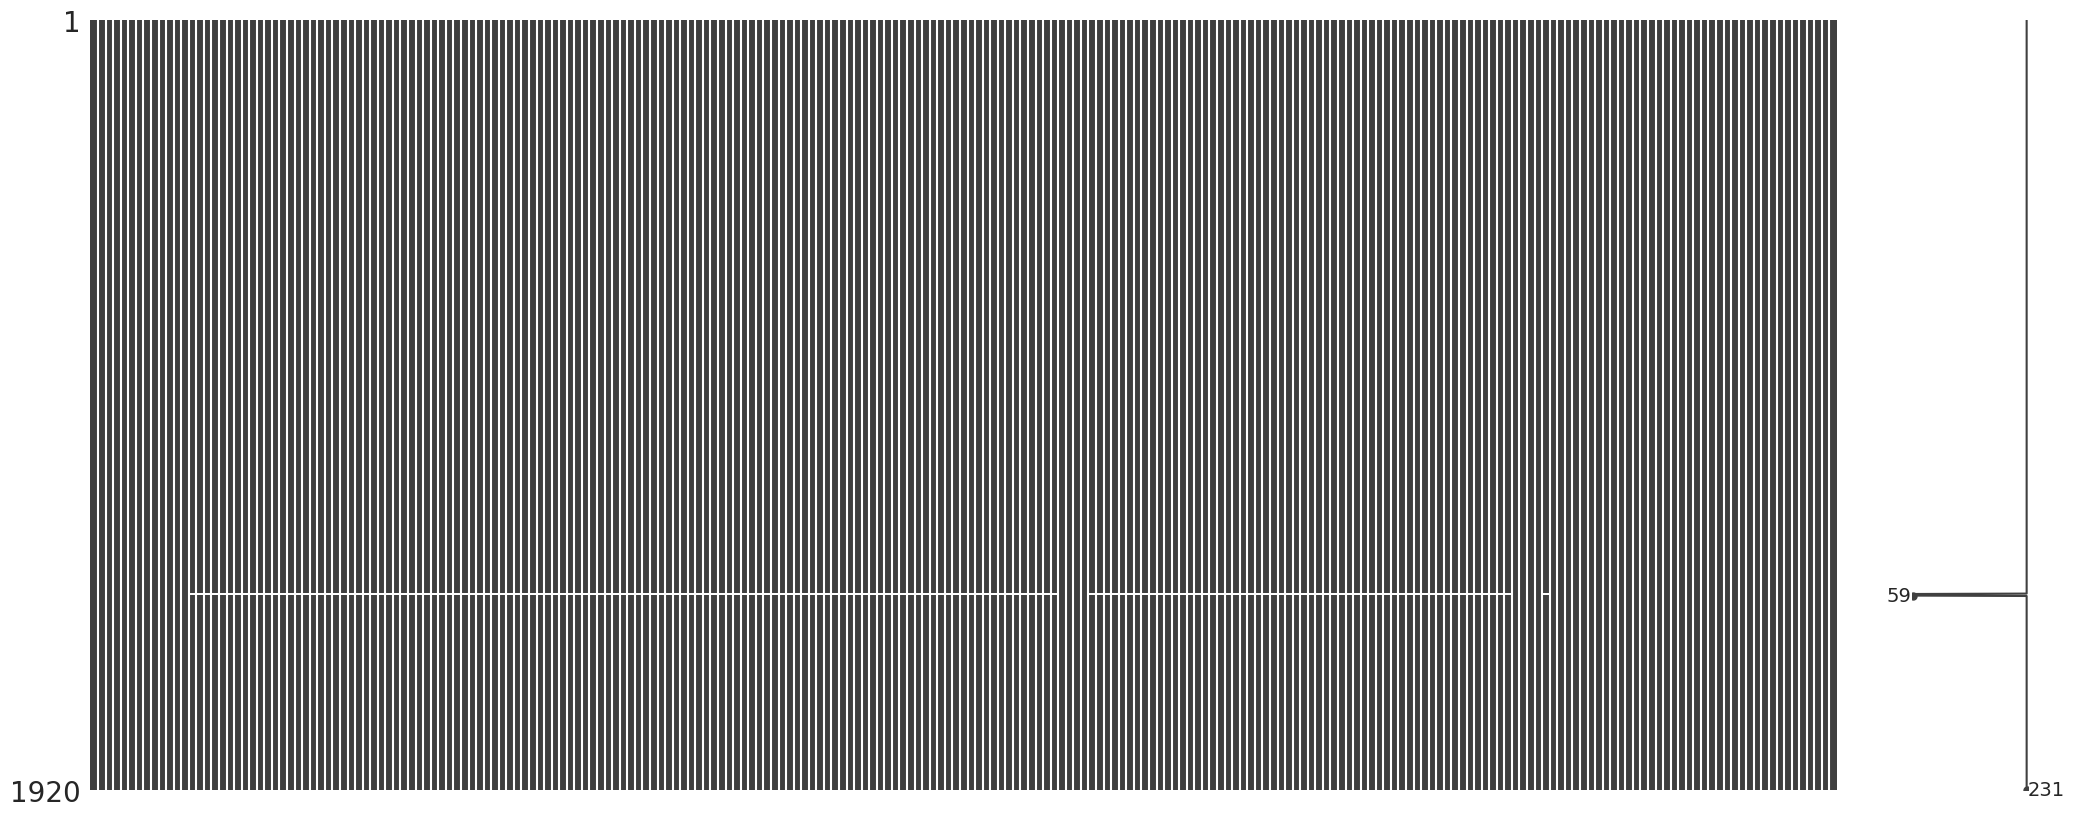

In [ ]:
msno.matrix(df_2)

In [ ]:
# Drop rows for patient with id 287 and 329(very limited data available):
df_2.drop(df_2[df_2.PATIENT_VISIT_IDENTIFIER == 287].index, inplace=True)
df_2.drop(df_2[df_2.PATIENT_VISIT_IDENTIFIER == 329].index, inplace=True)

In [ ]:
# Create new column identifying patients amitted/not admitted to ICU
df_2['ICU_Admission'] = df_2.groupby('PATIENT_VISIT_IDENTIFIER')['ICU'].transform('max')
df_2['ICU_Admission'] = df_2['ICU_Admission'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Dropping rows with  time widows after admission to ICU as patients vital signs can change from the point and should be treated as after-event data
df_2 = df_2[df_2['ICU'] != 1]

<Axes: >

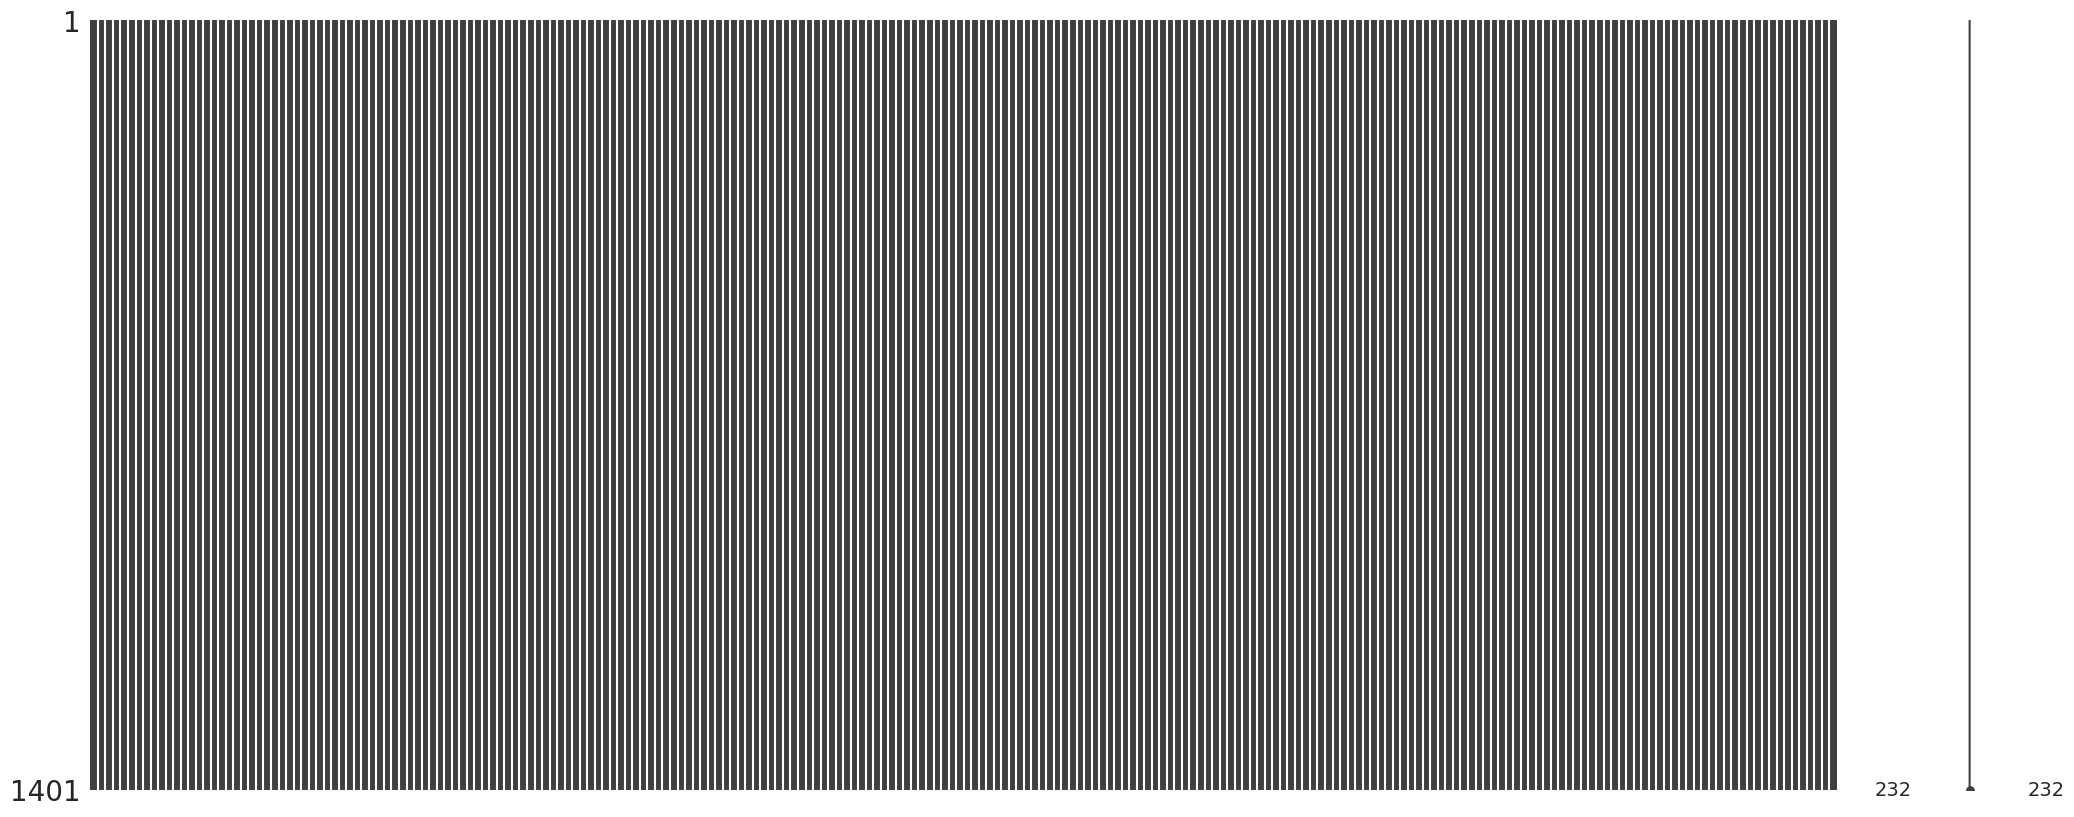

In [ ]:
msno.matrix(df_2)

In above we assigned a label to AGE_PERCENTIL data. Label is a number for each unique entry of the feature. We then used MinMaxScaler so our models interpret those features on the same scale as others.

#### Feature Engineering

In this section, we resolve the problem with AGE_PERCENTIL by converting non-numerical data into numerical ones that can be understood and used by machine learning model.

In [ ]:
# Label encoding for column AGE_PERCENTIL:
labelencoder = LabelEncoder()
df_2['AGE_PERCENTIL'] = labelencoder.fit_transform(df_2['AGE_PERCENTIL'])

# Scale AGE_PERCENTIL by using MinMaxScaler:
scaler = MinMaxScaler()
df_2['AGE_PERCENTIL'] = scaler.fit_transform(df_2['AGE_PERCENTIL'].values.reshape(-1, 1))

In [ ]:
df_2.AGE_PERCENTIL.unique()

array([0.55555556, 0.        , 0.33333333, 0.66666667, 0.11111111,
       0.44444444, 0.77777778, 0.22222222, 0.88888889, 1.        ])

In [ ]:
df_2.head(20)

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                          0            1       0.555556       0   
1                          0            1       0.555556       0   
2                          0            1       0.555556       0   
3                          0            1       0.555556       0   
10                         2            0       0.000000       0   
11                         2            0       0.000000       0   
12                         2            0       0.000000       0   
13                         2            0       0.000000       0   
15                         3            0       0.333333       1   
16                         3            0       0.333333       1   
17                         3            0       0.333333       1   
18                         3            0       0.333333       1   
19                         3            0       0.333333       1   
20                         4            0       0.000000       0   
21                         4            0       0.000000       0   
22                         4            0       0.000000       0   
23                         4            0       0.000000       0   
24                         4            0       0.000000       0   
25                         5            0       0.000000       0   
26                         5            0       0.000000       0   

    DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
10                 0.0                 0.0                 0.0   
11                 0.0                 0.0                 0.0   
12                 0.0                 0.0                 0.0   
13                 0.0                 0.0                 0.0   
15                 0.0                 0.0                 0.0   
16                 0.0                 0.0                 0.0   
17                 0.0                 0.0                 0.0   
18                 0.0                 0.0                 0.0   
19                 0.0                 0.0                 0.0   
20                 0.0                 0.0                 0.0   
21                 0.0                 0.0                 0.0   
22                 0.0                 0.0                 0.0   
23                 0.0                 0.0                 0.0   
24                 0.0                 0.0                 0.0   
25                 0.0                 0.0                 0.0   
26                 0.0                 0.0                 0.0   

    DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                  0.0                 1.0                 1.0  0.0   
1                  0.0                 1.0                 1.0  0.0   
2                  0.0                 1.0                 1.0  0.0   
3                  0.0                 1.0                 1.0  0.0   
10                 0.0                 0.0                 0.0  0.0   
11                 0.0                 0.0                 0.0  0.0   
12                 0.0                 0.0                 0.0  0.0   
13                 0.0                 0.0                 0.0  0.0   
15                 0.0                 0.0                 0.0  0.0   
16                 0.0                 0.0                 0.0  0.0   
17                 0.0                 0.0                 0.0  0.0   
18                 0.0                 0.0                 0.0  0.0   
19                 0.0                 0.0                 0.0  0.0   
20                 0.0                 0.0                 0.0  0.0   
21                 0.0                 0.0                 0.0  0.0   
22                 0.0                 0.0          

### **Machine Learning Model Development [Approach 2]**


In this section we check target distribution, split dataset into two parts train and test and train and evaluate machine learning models for classification.

In [ ]:
# Display percentage (%) of values for each class (1, 0) in our target column:
df_2['ICU_Admission'].value_counts(normalize=True) * 100

0    67.45182
1    32.54818
Name: ICU_Admission, dtype: float64

<ipython-input-99-1dffe3e89295>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_2['ICU_Admission'],palette='winter_d')


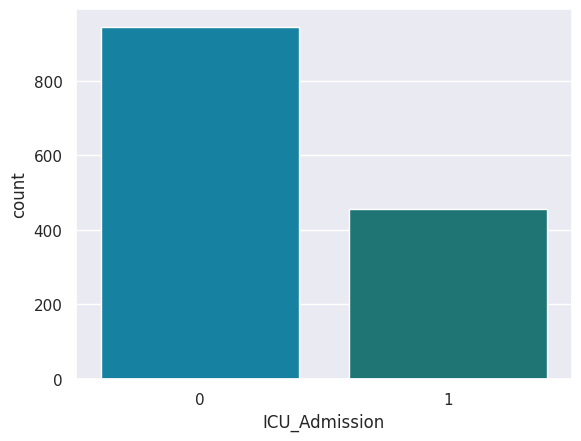

In [ ]:
# Checking if classes are balanced:
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=df_2['ICU_Admission'],palette='winter_d')
plt.show()

DEALING WITH IMBALANCED CLASSES

Due to the imbalance in the classes we will need to use random undersampler. This is to prevent models form memorising majority class and being more sensitivie to it. This is especially important in the context of medical diagnosis, where model should be sensitive to positive cases (ICU) which are usually in minority comparing to cases not needeing special attention.

In [ ]:
df_2.head(10)


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                          0            1       0.555556       0   
1                          0            1       0.555556       0   
2                          0            1       0.555556       0   
3                          0            1       0.555556       0   
10                         2            0       0.000000       0   
11                         2            0       0.000000       0   
12                         2            0       0.000000       0   
13                         2            0       0.000000       0   
15                         3            0       0.333333       1   
16                         3            0       0.333333       1   

    DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
10                 0.0                 0.0                 0.0   
11                 0.0                 0.0                 0.0   
12                 0.0                 0.0                 0.0   
13                 0.0                 0.0                 0.0   
15                 0.0                 0.0                 0.0   
16                 0.0                 0.0                 0.0   

    DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                  0.0                 1.0                 1.0  0.0   
1                  0.0                 1.0                 1.0  0.0   
2                  0.0                 1.0                 1.0  0.0   
3                  0.0                 1.0                 1.0  0.0   
10                 0.0                 0.0                 0.0  0.0   
11                 0.0                 0.0                 0.0  0.0   
12                 0.0                 0.0                 0.0  0.0   
13                 0.0                 0.0                 0.0  0.0   
15                 0.0                 0.0                 0.0  0.0   
16                 0.0                 0.0                 0.0  0.0   

    IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                 0.0    1.0        0.605263      0.605263     0.605263   
1                 0.0    1.0        0.605263      0.605263     0.605263   
2                 0.0    1.0        0.605263      0.605263     0.605263   
3                 0.0    1.0        0.605263      0.605263     0.605263   
10                0.0    1.0        0.605263      0.605263     0.605263   
11                0.0    1.0        0.605263      0.605263     0.605263   
12                0.0    1.0        0.605263      0.605263     0.605263   
13                0.0    1.0        0.605263      0.605263     0.605263   
15                1.0    1.0       -0.263158     -0.263158    -0.263158   
16                1.0    1.0       -0.263158     -0.263158    -0.263158   

    ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0      0.605263          -1.0                -1.0              -1.0   
1      0.605263          -1.0                -1.0              -1.0   
2      0.605263          -1.0                -1.0              -1.0   
3      0.605263          -1.0                -1.0              -1.0   
10     0.605263          -1.0                -1.0              -1.0   
11     0.605263          -1.0                -1.0              -1.0   
12     0.605263          -1.0                -1.0              -1.0   
13     0.605263          -1.0                -1.0              -1.0   
15    -0.263158          -1.0                -1.0              -1.0   
16    -0.263158          -1.0                -1.0              -1.0   

    BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0              -1.0             -1.0              -1.0        

In [ ]:
X_2= df_2.drop (['ICU','WINDOW','ICU_Admission'], axis= 1)
y_2= df_2['ICU_Admission']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

random_under= RandomUnderSampler(random_state= 0, replacement=True)
X_resampled, y_resampled = random_under.fit_resample(X_2,y_2)

In [ ]:
## Keep 30% of data for testing:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_resampled, y_resampled, test_size = 0.3, shuffle = True, random_state=42)

In [ ]:
print(sorted(Counter(y_resampled).items()))

[(0, 456), (1, 456)]


<ipython-input-105-bbdfc019346c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x=y_resampled,palette='winter_d')


<Axes: xlabel='ICU_Admission', ylabel='count'>

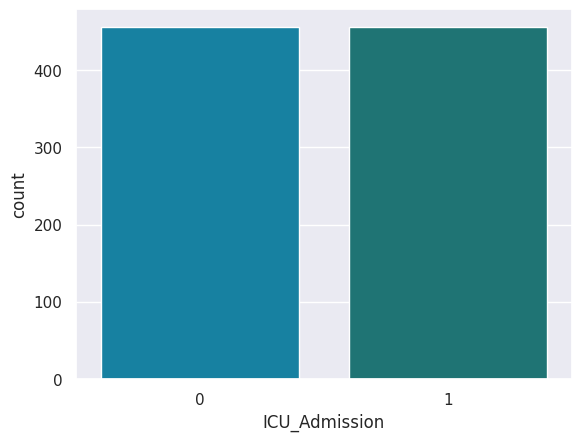

In [ ]:
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot (x=y_resampled,palette='winter_d')

For the machine learning model we are going to explore the following classification models:

 - Logistic Regression
 - Support Vector Classifier (SVC)
 - Naive Bayes
 - Linear SVC
 - Random Forest

LOGISTIC REGRESSION

In [ ]:
# Logistic Regression

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_2, y_train_2)

# Predict on the test set
Y_pred = lr.predict(X_test_2)

# Calculate metrics on the training set
acc_lr_train = round(lr.score(X_train_2, y_train_2) * 100, 2)

# Calculate metrics on the test set
acc_lr_test = round(accuracy_score(y_test_2, Y_pred) * 100, 2)
f1_lr = round(f1_score(y_test_2, Y_pred, average='weighted'), 2)
precision_lr = round(precision_score(y_test_2, Y_pred, average='weighted'), 2)
recall_lr = round(recall_score(y_test_2, Y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test_2, Y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_lr = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (Logistic Regression):", acc_lr_train)
print("Test Accuracy (Logistic Regression):", acc_lr_test)
print("F1 Score (Logistic Regression):", f1_lr)
print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)
print("Specificity (Logistic Regression):", specificity_lr)

Training Accuracy (Logistic Regression): 80.09
Test Accuracy (Logistic Regression): 74.82
F1 Score (Logistic Regression): 0.75
Precision (Logistic Regression): 0.75
Recall (Logistic Regression): 0.75
Specificity (Logistic Regression): 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC REGRESSION HYPERPARAMETER TUNING

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = [ 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search:
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator = lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall', error_score=0)

# Run gridsearch fit:
grid_result = grid_search.fit(X_train_2, y_train_2)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793908 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.783649 (0.049864) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.780492 (0.054023) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.783649 (0.049864) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.676042 (0.068987) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.657449 (0.072866) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.792835 (0.050243) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.779419 (0.055447) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793908 (0.050838) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.676042 (0.068987) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.660574 (0.070705) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.783491 (0.051121) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.780429 (0.063685) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785574 (0.055862) with: {'C': 1.0, 'penalt

LOGISITC REGRESSION WITH HYPERPARATERS TUNED

In [ ]:
# Logistic Regression


# Train the Logistic Regression model with best hyperparameters
lr = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
lr.fit(X_train_2, y_train_2)
lr_2 = lr

# Predict on the test set
Y_pred = lr.predict(X_test_2)

# Calculate metrics on the training set
acc_lr_train = round(lr.score(X_train_2, y_train_2) * 100, 2)

# Calculate metrics on the test set
acc_lr_test = round(accuracy_score(y_test_2, Y_pred) * 100, 2)
f1_lr = round(f1_score(y_test_2, Y_pred, average='weighted'), 2)
precision_lr = round(precision_score(y_test_2, Y_pred, average='weighted'), 2)
recall_lr = round(recall_score(y_test_2, Y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test_2, Y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_lr = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (Logistic Regression):", acc_lr_train)
print("Test Accuracy (Logistic Regression):", acc_lr_test)
print("F1 Score (Logistic Regression):", f1_lr)
print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)
print("Specificity (Logistic Regression):", specificity_lr)

Training Accuracy (Logistic Regression): 81.5
Test Accuracy (Logistic Regression): 78.83
F1 Score (Logistic Regression): 0.79
Precision (Logistic Regression): 0.79
Recall (Logistic Regression): 0.79
Specificity (Logistic Regression): 0.79


LOGISTIC REGRESSION CONFUSION MATRIX

Confusion Matrix (Logistic Regression):
 [[110  30]
 [ 28 106]]


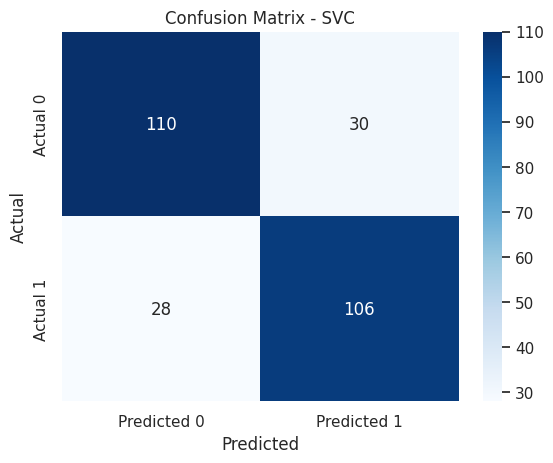

In [ ]:

# Print confusion matrix
print("Confusion Matrix (Logistic Regression):\n", conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()

#### LOGISTIC REGRESSION ROC CURVE

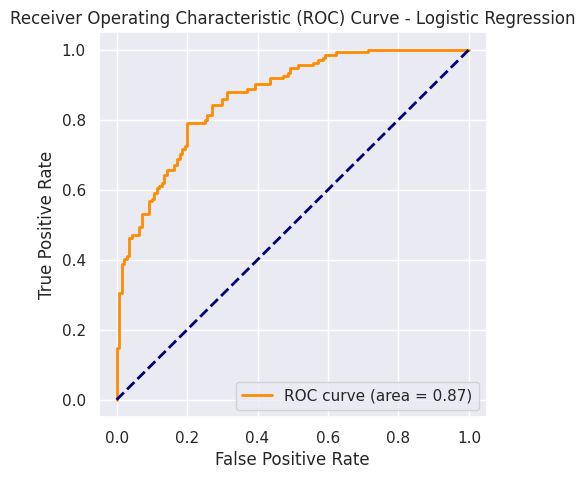

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba_lr = lr.predict_proba(X_test_2)[:, 1]

# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_2, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


SUPPORT VECTOR CLASSIFIER (SVC)



In [ ]:
# Support Vector Machines

# Train the Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train_2, y_train_2)

# Predict on the test set
Y_pred = svc.predict(X_test_2)

# Calculate metrics on the training set
acc_svc_train = round(svc.score(X_train_2, y_train_2) * 100, 2)

# Calculate metrics on the test set
acc_svc_test = round(accuracy_score(y_test_2, Y_pred) * 100, 2)
f1_svc = round(f1_score(y_test_2, Y_pred, average='weighted'), 2)
precision_svc = round(precision_score(y_test_2, Y_pred, average='weighted'), 2)
recall_svc = round(recall_score(y_test_2, Y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test_2, Y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_svc = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (SVC):", acc_svc_train)
print("Test Accuracy (SVC):", acc_svc_test)
print("F1 Score (SVC):", f1_svc)
print("Precision (SVC):", precision_svc)
print("Recall (SVC):", recall_svc)
print("Specificity (SVC):", specificity_svc)

Training Accuracy (SVC): 56.74
Test Accuracy (SVC): 59.12
F1 Score (SVC): 0.59
Precision (SVC): 0.59
Recall (SVC): 0.59
Specificity (SVC): 0.56


SUPPORT VECTOR CLASSIFIER (SVC) HYPERPARAMETERS TUNING

In [ ]:
# define model and parameters

kernel = ['poly', 'rbf', 'sigmoid']
C = [20, 15, 10, 5, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train_2, y_train_2)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.866572 (0.070460) with: {'C': 20, 'gamma': 'scale', 'kernel': 'poly'}
0.525063 (0.090371) with: {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}
0.557165 (0.102208) with: {'C': 20, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.864489 (0.070179) with: {'C': 15, 'gamma': 'scale', 'kernel': 'poly'}
0.522001 (0.088144) with: {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
0.557165 (0.102208) with: {'C': 15, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.867677 (0.065504) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.526136 (0.090471) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.556124 (0.101027) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.840878 (0.074994) with: {'C': 5, 'gamma': 'scale', 'kernel': 'poly'}
0.553030 (0.094263) with: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
0.556124 (0.101027) with: {'C': 5, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.796433 (0.075470) with: {'C': 1.0, 'gamma': 'scale', 'kernel'

SVC WITH HYPERPARAMTERS TUNED

In [ ]:
# Support Vector Machines

# Train the Support Vector Classifier (SVC) with best hyperparameters
svc = SVC(C=0.01, gamma='scale', kernel='rbf', probability=True)
svc.fit(X_train_2, y_train_2)
svc_2 = svc

# Predict on the test set
Y_pred = svc.predict(X_test_2)

# Calculate metrics on the training set
acc_svc_train = round(svc.score(X_train_2, y_train_2) * 100, 2)

# Calculate metrics on the test set
acc_svc_test = round(accuracy_score(y_test_2, Y_pred) * 100, 2)
f1_svc = round(f1_score(y_test_2, Y_pred, average='weighted'), 2)
precision_svc = round(precision_score(y_test_2, Y_pred, average='weighted'), 2)
recall_svc = round(recall_score(y_test_2, Y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test_2, Y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_svc = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (SVC):", acc_svc_train)
print("Test Accuracy (SVC):", acc_svc_test)
print("F1 Score (SVC):", f1_svc)
print("Precision (SVC):", precision_svc)
print("Recall (SVC):", recall_svc)
print("Specificity (SVC):", specificity_svc)

Training Accuracy (SVC): 50.47
Test Accuracy (SVC): 48.91
F1 Score (SVC): 0.32
Precision (SVC): 0.24
Recall (SVC): 0.49
Specificity (SVC): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC CONFUSION MATRIX

Confusion Matrix (SVC):
 [[  0 140]
 [  0 134]]


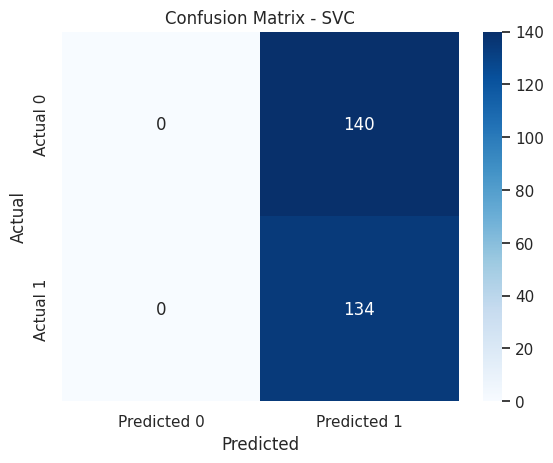

In [ ]:

# Print confusion matrix
print("Confusion Matrix (SVC):\n", conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()

#### SVC ROC CURVE

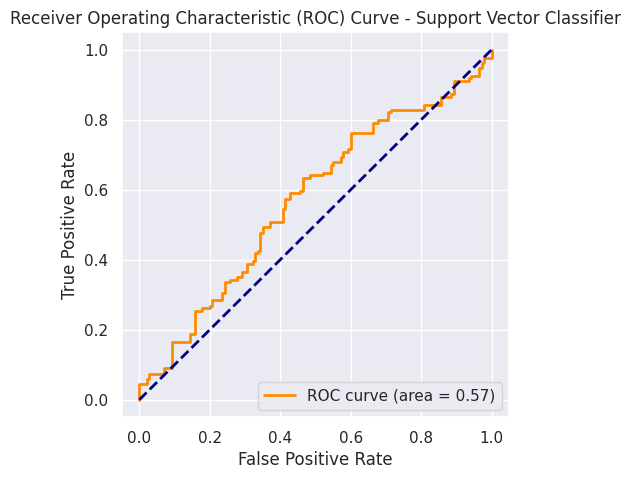

In [ ]:

y_pred_proba_svc = svc.decision_function(X_test_2)

# Calculate ROC curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test_2, y_pred_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Classifier')
plt.legend(loc='lower right')
plt.show()


NAIVE BAYES

In [ ]:
# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_2, y_train_2)

# Predict on the test set
Y_pred = gnb.predict(X_test_2)

# Calculate metrics on the training set
acc_gnb_train = round(gnb.score(X_train_2, y_train_2) * 100, 2)

# Calculate metrics on the test set
acc_gnb_test = round(accuracy_score(y_test_2, Y_pred) * 100, 2)
f1_gnb = round(f1_score(y_test_2, Y_pred, average='weighted'), 2)
precision_gnb = round(precision_score(y_test_2, Y_pred, average='weighted'), 2)
recall_gnb = round(recall_score(y_test_2, Y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test_2, Y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_gnb = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (GaussianNB):", acc_gnb_train)
print("Test Accuracy (GaussianNB):", acc_gnb_test)
print("F1 Score (GaussianNB):", f1_gnb)
print("Precision (GaussianNB):", precision_gnb)
print("Recall (GaussianNB):", recall_gnb)
print("Specificity (GaussianNB):", specificity_gnb)

Training Accuracy (GaussianNB): 62.38
Test Accuracy (GaussianNB): 65.69
F1 Score (GaussianNB): 0.62
Precision (GaussianNB): 0.74
Recall (GaussianNB): 0.66
Specificity (GaussianNB): 0.96


NAIVE BAYES CONFUSION MATRIX




Confusion Matrix (Naive Bayes):
 [[134   6]
 [ 88  46]]


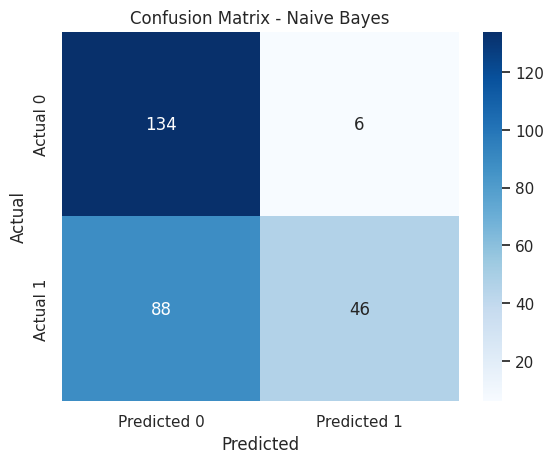

In [ ]:

# Print confusion matrix
print("Confusion Matrix (Naive Bayes):\n", conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Naive Bayes ROC curve

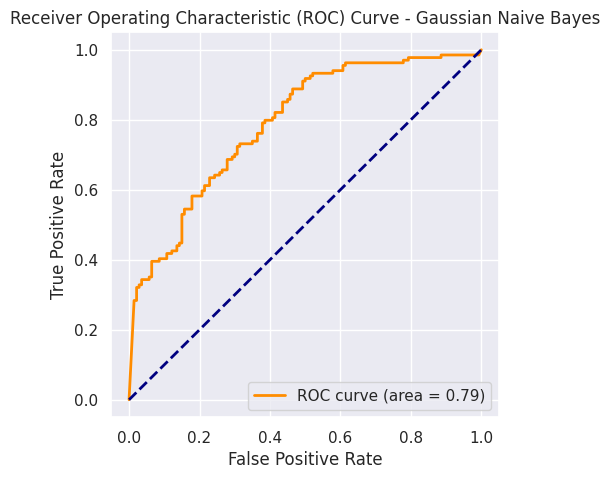

In [ ]:
y_pred_proba_gnb = gnb.predict_proba(X_test_2)[:, 1]

# Calculate ROC curve
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test_2, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gnb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()


LINEAR SUPPRORT VECTOR CLASSIFIER (SVC)

In [ ]:
# Linear SVC

linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train_2, y_train_2)
Y_pred = linear_svc.predict(X_test_2)


# Calculate metrics on the training set
acc_linear_svc_train = round(linear_svc.score(X_train_2, y_train_2) * 100, 2)

# Calculate metrics on the test set
acc_linear_svc_test = round(accuracy_score(y_test_2, Y_pred) * 100, 2)
f1_linear_svc = round(f1_score(y_test_2, Y_pred, average='weighted'), 2)
precision_linear_svc = round(precision_score(y_test_2, Y_pred, average='weighted'), 2)
recall_linear_svc = round(recall_score(y_test_2, Y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test_2, Y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_linear_svc = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy:", acc_linear_svc_train)
print("Test Accuracy:", acc_linear_svc_test)
print("F1 Score:", f1_linear_svc)
print("Precision:", precision_linear_svc)
print("Recall:", recall_linear_svc)
print("Specificity:", specificity_linear_svc)

Training Accuracy: 82.45
Test Accuracy: 76.64
F1 Score: 0.77
Precision: 0.77
Recall: 0.77
Specificity: 0.77


LINEAR SVC CONFUSION MATRIX




Confusion Matrix (Linear SVC):
 [[108  32]
 [ 32 102]]


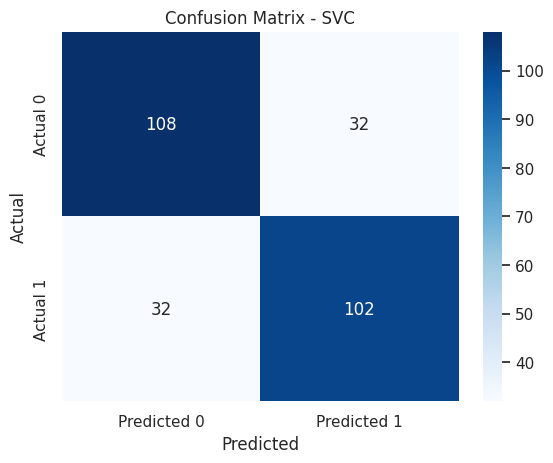

In [ ]:

# Print confusion matrix
print("Confusion Matrix (Linear SVC):\n", conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()

Linear SVC ROC curve


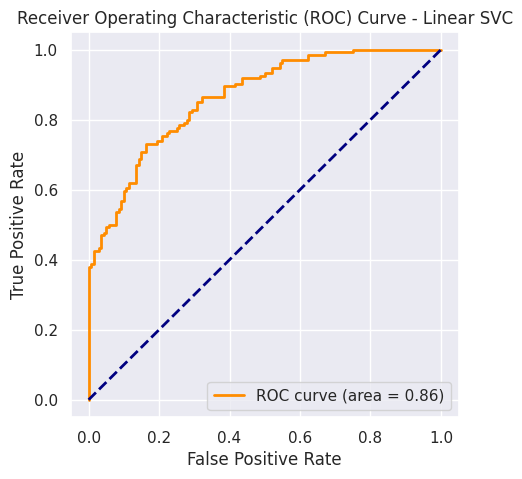

In [ ]:
y_pred_proba_linear_svc = linear_svc.decision_function(X_test_2)

# Calculate ROC curve
fpr_linear_svc, tpr_linear_svc, thresholds_linear_svc = roc_curve(y_test_2, y_pred_proba_linear_svc)
roc_auc_linear_svc = auc(fpr_linear_svc, tpr_linear_svc)

# Plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr_linear_svc, tpr_linear_svc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_linear_svc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Linear SVC')
plt.legend(loc='lower right')
plt.show()


RANDOM FOREST


In [ ]:
#Random Forest


# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_2, y_train_2)

# Predict on the test set
Y_pred = rf.predict(X_test_2)

# Calculate metrics on the training set
acc_rf_train = round(rf.score(X_train_2, y_train_2) * 100, 2)

# Calculate metrics on the test set
acc_rf_test = round(accuracy_score(y_test_2, Y_pred) * 100, 2)
f1_rf = round(f1_score(y_test_2, Y_pred, average='weighted'), 2)
precision_rf = round(precision_score(y_test_2, Y_pred, average='weighted'), 2)
recall_rf = round(recall_score(y_test_2, Y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test_2, Y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_rf = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (Random Forest):", acc_rf_train)
print("Test Accuracy (Random Forest):", acc_rf_test)
print("F1 Score (Random Forest):", f1_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("Specificity (Random Forest):", specificity_rf)

Training Accuracy (Random Forest): 100.0
Test Accuracy (Random Forest): 96.35
F1 Score (Random Forest): 0.96
Precision (Random Forest): 0.96
Recall (Random Forest): 0.96
Specificity (Random Forest): 0.94


RANDOM FOREST HYPERPARAMETERS TUNING

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train_2, y_train_2)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.939836 using {'max_features': 'log2', 'n_estimators': 1000}
0.904609 (0.053326) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.935764 (0.040948) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.938794 (0.039099) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.889394 (0.053364) with: {'max_features': 'log2', 'n_estimators': 10}
0.937784 (0.038677) with: {'max_features': 'log2', 'n_estimators': 100}
0.939836 (0.036908) with: {'max_features': 'log2', 'n_estimators': 1000}


RANDOM FOREST WITH HYPERPARAMETERS TUNED

In [ ]:
#Random Forest


# Train the Random Forest model with best hyperparameters
rf_classifier = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf.fit(X_train_2, y_train_2)
rf_2 = rf

# Predict on the test set
Y_pred = rf.predict(X_test_2)

# Calculate metrics on the training set
acc_rf_train = round(rf.score(X_train_2, y_train_2) * 100, 2)

# Calculate metrics on the test set
acc_rf_test = round(accuracy_score(y_test_2, Y_pred) * 100, 2)
f1_rf = round(f1_score(y_test_2, Y_pred, average='weighted'), 2)
precision_rf = round(precision_score(y_test_2, Y_pred, average='weighted'), 2)
recall_rf = round(recall_score(y_test_2, Y_pred, average='weighted'), 2)

# Calculate specificity
conf_matrix = confusion_matrix(y_test_2, Y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]

specificity_rf = round(true_negatives / (true_negatives + false_positives),2)

# Print or use the metrics
print("Training Accuracy (Random Forest):", acc_rf_train)
print("Test Accuracy (Random Forest):", acc_rf_test)
print("F1 Score (Random Forest):", f1_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("Specificity (Random Forest):", specificity_rf)

Training Accuracy (Random Forest): 100.0
Test Accuracy (Random Forest): 95.26
F1 Score (Random Forest): 0.95
Precision (Random Forest): 0.95
Recall (Random Forest): 0.95
Specificity (Random Forest): 0.92


RANDOM FOREST CONFUSION MATRIX




Confusion Matrix (Random Forest):
 [[129  11]
 [  2 132]]


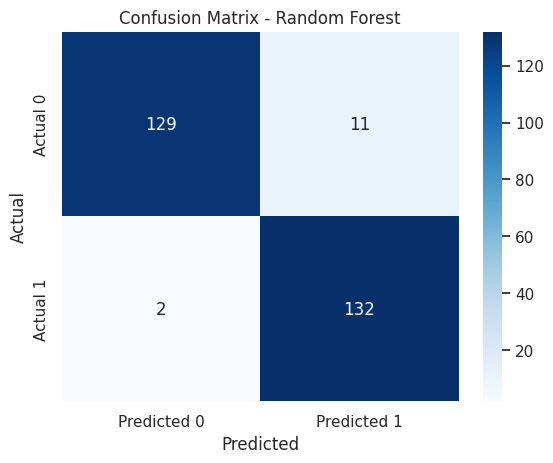

In [ ]:

# Print confusion matrix
print("Confusion Matrix (Random Forest):\n", conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#### Random Forest ROC CURVE

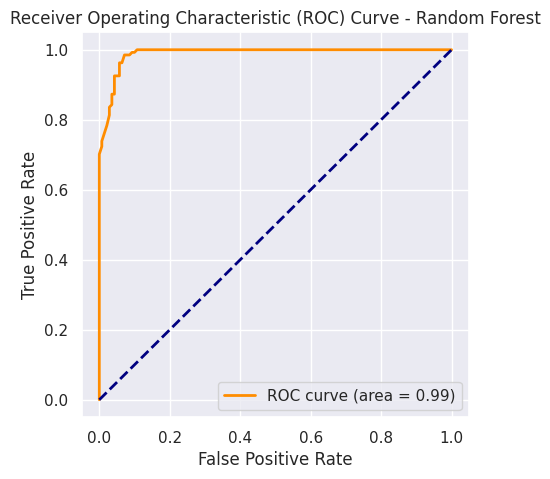

In [ ]:
y_pred_proba_rf = rf.predict_proba(X_test_2)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_2, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

Feature importance

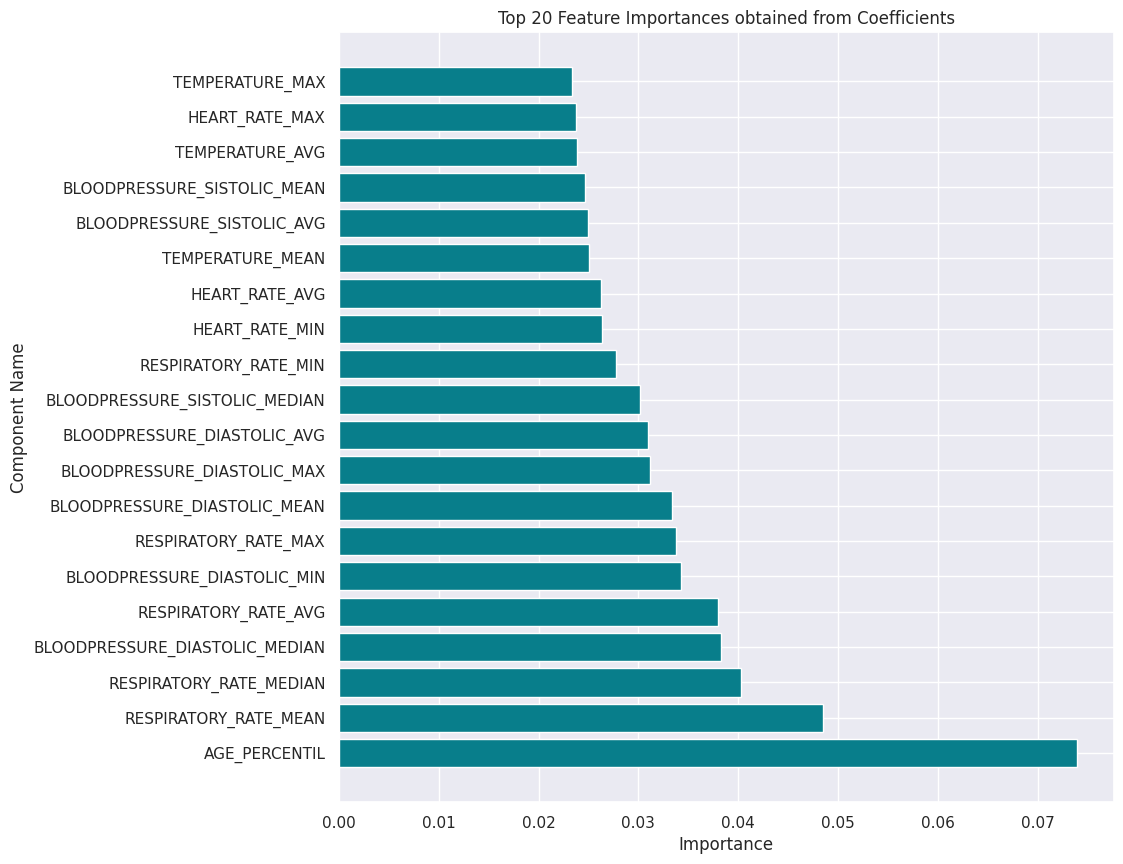

In [ ]:
top_n = 20  # Set the number of top components to display

plt.figure(figsize=(10, top_n/2))
sorted_importances = importances.sort_values(by='Importance', ascending=False)
top_importances = sorted_importances.head(top_n)

plt.barh(y=top_importances['Attribute'], width=top_importances['Importance'], color='#087E8B')
plt.title(f'Top {top_n} Feature Importances obtained from Coefficients')
plt.xlabel('Importance')
plt.ylabel('Component Name')
plt.show()


Permutation Importance

In [ ]:
import plotly.express as px

fig = px.bar(importances, x='Importance', y='Attribute', orientation='h',
             title='Permutation Importance', text='Importance')
fig.update_traces(marker_color='#087E8B')
fig.update_layout(yaxis=dict(categoryorder='total ascending'), showlegend=False)
fig.show()


MODELS EVALUATION SUMMARY TABLE

In [ ]:
#In the context of medical diagnosis where false negatives are particularly concerning, recall (sensitivity) might be the most importnat metric, so high ICU admission risk will not go undetected


models = pd.DataFrame(
    {

    'Model': ['Logistic Regression'
              ,'Support Vector Machines'
              , 'Naive Bayes'
              , 'Linear SVC'
              , 'Random Forest'],

    'Recall':[recall_lr
             , recall_gnb
             , recall_svc
             , recall_gnb
             , recall_rf],

    'Precision':[precision_lr
              , precision_svc
              , precision_gnb
              , precision_svc
              , precision_rf],

     'Specificity':[specificity_lr
              , specificity_svc
              , specificity_gnb
              , specificity_svc
              , specificity_rf],

    'Traning accuracy': [acc_lr_train
              , acc_svc_train
              , acc_gnb_train
              , acc_linear_svc_train
              , acc_rf_train],

    'Test accuracy':[acc_lr_test
              , acc_svc_test
              , acc_gnb_test
              , acc_linear_svc_test
              , acc_rf_test],

     'F1 Score' : [f1_lr
              , f1_svc
              , f1_gnb
              , f1_linear_svc
              , f1_rf]


})

models.sort_values(by='Recall', ascending=False, ignore_index=True)

Model  Recall  Precision  Specificity  Traning accuracy  \
0            Random Forest    0.95       0.95         0.92            100.00   
1      Logistic Regression    0.79       0.79         0.79             81.50   
2  Support Vector Machines    0.66       0.24         0.00             50.47   
3               Linear SVC    0.66       0.24         0.00             82.45   
4              Naive Bayes    0.49       0.74         0.96             62.38   

   Test accuracy  F1 Score  
0          95.26      0.95  
1          78.83      0.79  
2          48.91      0.32  
3          76.64      0.77  
4          65.69      0.62

**Conclusion**

 Random Forest is best performing model in the most metrics and high test accauracy indicates it is not overfitting. Recall, metrics describing ability of the model to identify all patients with high ICU risk minimising any omissions is very high on the test at 96%. It would be preferred model for appoach 2, where blood test results are made avialable in the very short timeframe.

## **AIF360**

## Standardisation

From the previous code, we know that the dataset for aproach 1 is labelled as 'data_1', and the dataset for approach 2 is labelled as 'df_2'. They will both get standardised to 'approach_1' and 'approach_2' respectively.

Also, AIF360 measures bias against the target feature using binary features, such as gender (male/female), age_above65 (yes/no), etc. The following code is setting up for fairness analysis in the context of ICU admissions, focusing on age and gender as potential sources of bias. The BinaryLabelDataset instances are structured to facilitate the use of AIF360 tools to measure and mitigate such biases.

Also note the training and test datasets for approach 2 are:

X_train_2, X_test_2, y_train_2, y_test_2

In [ ]:
# Constants for column names and group identifiers
AGE = 'AGE_ABOVE65'  # Column name for age group above 65
GENDER = 'GENDER'  # Column name for gender
PROTECTED = 1  # Identifier for protected group
UNPROTECTED = 0  # Identifier for unprotected group

# Copying datasets for different approaches
approach_1 = data_1.copy()  # Copy of the first dataset for approach 1
approach_2 = df_2.copy()  # Copy of the second dataset for approach 2
approach_2 = approach_2.drop(['ICU','WINDOW'], axis= 1)  # Drop columns not used for training/testing in approach 2

# BinaryLabelDataset for age-based analysis in approach 1
age_dataset_1 = BinaryLabelDataset(
    df=approach_1,
    label_names=['ICU'],  # Outcome variable
    protected_attribute_names=[AGE],  # Protected attribute
    favorable_label=0,  # Favorable outcome (e.g., no ICU admission)
    unfavorable_label=1  # Unfavorable outcome (e.g., ICU admission)
)

# BinaryLabelDataset for gender-based analysis in approach 1
gender_dataset_1 = BinaryLabelDataset(
    df=approach_1,
    label_names=['ICU'],  # Outcome variable
    protected_attribute_names=[GENDER],  # Protected attribute
    favorable_label=0,  # Favorable outcome (e.g., no ICU admission)
    unfavorable_label=1  # Unfavorable outcome (e.g., ICU admission)
)

# BinaryLabelDataset for age-based analysis in approach 2
age_dataset_2 = BinaryLabelDataset(
    df=approach_2,
    label_names=['ICU_Admission'],  # Outcome variable
    protected_attribute_names=[AGE],  # Protected attribute
    favorable_label=0,  # Favorable outcome (e.g., no ICU admission)
    unfavorable_label=1  # Unfavorable outcome (e.g., ICU admission)
)

# BinaryLabelDataset for gender-based analysis in approach 2
gender_dataset_2 = BinaryLabelDataset(
    df=approach_2,
    label_names=['ICU_Admission'],  # Outcome variable
    protected_attribute_names=[GENDER],  # Protected attribute
    favorable_label=0,  # Favorable outcome (e.g., no ICU admission)
    unfavorable_label=1  # Unfavorable outcome (e.g., ICU admission)
)

In [ ]:
# Dictionary of models for approach 1
models_1 = {
    'lr': lr_1,  # Logistic Regression
    'svc': svc_1,  # Support Vector Classifier
    'rf': rf_1,  # Random Forest
}

# Dictionary of models for approach 2
models_2 = {
    'lr': lr_2,  # Logistic Regression
    'svc': svc_2,  # Support Vector Classifier
    'rf': rf_2,  # Random Forest
}

## Measure Bias
Protected/privileged groups are treated differently by the model due to biases existing within the dataest. This is a measure of how much more likely a protected group is to be predicted as high risk than a non-protected group.
Testing bias on the basis of gender(class 1 favoured) and age(above 65th percentile favoured).

### Disparate Impact

Disparate Impact is calculated as the ratio of the rate of favorable outcome for the unprivileged group to that of the privileged group. It's a measure of the difference in the probability of a positive outcome between the unprivileged and privileged groups.

Interpretation:
- A value of 1 implies perfect fairness.
- A value less than 1 indicates a disparity unfavorable to the unprivileged group.
- A value greater than 1 indicates a disparity unfavorable to the privileged group.

Use in AIF360: In AIF360, this metric is typically used to assess whether a model or a dataset exhibits bias regarding the outcomes for different groups (defined by protected attributes like race, gender, etc.).

- 1 >> Perfect fairness
- Less than 1 >> bad to unprivileged
- More than 1 >> bad to privileged

In [ ]:
# Function to calculate disparate impact
def disparate_impact(dataset, privileged_groups, unprivileged_groups):
    metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
    return metric.disparate_impact()

#### Approach 1:

For age, value is more than 1, therefore bad to privileged, meaning bias against age 1.

For gender, value is less than 1, therefore bad to unprivileged, meaning bias against gender 0.

In [ ]:
# Calculate disparate impact for age and gender in approach 1
age_impact_1 = disparate_impact(age_dataset_1, privileged_groups=[{AGE: 1}], unprivileged_groups=[{AGE: 0}])
gender_impact_1 = disparate_impact(gender_dataset_1, privileged_groups=[{GENDER: 1}], unprivileged_groups=[{GENDER: 0}])

# Print disparate impact results
print(f'Disparate impact for age: {age_impact_1}')
print(f'Disparate impact for gender: {gender_impact_1}')

Disparate impact for age: 1.8514946962391512
Disparate impact for gender: 0.7656722434992945


For age, value is less than 1, therefore bad to unprivileged, meaning bias against age 1.

For gender, value is more than 1, therefore bad to unprivileged, meaning bias against gender 0.

In [ ]:
# Calculate disparate impact for age and gender in approach 1
age_impact_1 = disparate_impact(age_dataset_1, privileged_groups=[{AGE: 0}], unprivileged_groups=[{AGE: 1}])
gender_impact_1 = disparate_impact(gender_dataset_1, privileged_groups=[{GENDER: 0}], unprivileged_groups=[{GENDER: 1}])

# Print disparate impact results
print(f'Disparate impact for age: {age_impact_1}')
print(f'Disparate impact for gender: {gender_impact_1}')

Disparate impact for age: 0.5401041666666667
Disparate impact for gender: 1.306041858628406


#### Approach 2:

For age, value is more than 1, therefore bad to privileged, meaning bias against age 1.

For gender, value is less than 1, therefore bad to unprivileged, meaning bias against gender 0.

In [ ]:
#Calculate disparate impact for age and gender in approach 1
age_impact_2 = disparate_impact(age_dataset_2, privileged_groups=[{AGE: 1}], unprivileged_groups=[{AGE: 0}])
gender_impact_2 = disparate_impact(gender_dataset_2, privileged_groups=[{GENDER: 1}], unprivileged_groups=[{GENDER: 0}])

# Print disparate impact results
print(f'Disparate impact for age: {age_impact_2}')
print(f'Disparate impact for gender: {gender_impact_2}')

Disparate impact for age: 1.4350567465321564
Disparate impact for gender: 0.8357942537270807


For age, value is less than 1, therefore bad to unprivileged, meaning bias against age 1.

For gender, value is more than 1, therefore bad to unprivileged, meaning bias against gender 0.

In [ ]:
#Calculate disparate impact for age and gender in approach 1
age_impact_2 = disparate_impact(age_dataset_2, privileged_groups=[{AGE: 0}], unprivileged_groups=[{AGE: 1}])
gender_impact_2 = disparate_impact(gender_dataset_2, privileged_groups=[{GENDER: 0}], unprivileged_groups=[{GENDER: 1}])

# Print disparate impact results
print(f'Disparate impact for age: {age_impact_2}')
print(f'Disparate impact for gender: {gender_impact_2}')

Disparate impact for age: 0.6968365553602812
Disparate impact for gender: 1.1964667088110166


### Equal opportunity
The Equal Opportunity Difference (EOD) assesses the difference in true positive rates (the rate at which the positive outcome is correctly predicted) between privileged and unprivileged groups. A value of 0 indicates perfect fairness, meaning both groups have equal true positive rates. Positive or negative values indicate bias favoring the privileged or unprivileged group, respectively.

In [ ]:
# Function to calculate equal opportunity difference
def equal_opportunity(x_test, y_test, model, protected):
    y_pred = model.predict(x_test)  # Model predictions
    try:
        prot_attr_test = x_test[protected]  # Protected attribute data
    except TypeError:
        x_test_ = pd.DataFrame(x_test.features, columns=x_test.feature_names)
        prot_attr_test = x_test.protected_attributes[:, x_test.protected_attribute_names.index(AGE)]
        y_pred = y_pred.labels.ravel()

    # Calculate the equal opportunity difference
    eod = equal_opportunity_difference(y_test, y_pred, prot_attr=prot_attr_test)  # Calculate EOD
    return eod

In [ ]:
# Iterate over each model in models_1
for name, model in models_1.items():
    print(f'Model: {name}')

    # Calculate and print Equal Opportunity Difference for age
    age_equal_opportunity = equal_opportunity(X_test, y_test, model, protected=AGE)
    print(f'Equal opportunity for age: {age_equal_opportunity}')

    # Calculate and print Equal Opportunity Difference for gender
    gender_equal_opportunity = equal_opportunity(X_test, y_test, model, protected=GENDER)
    print(f'Equal opportunity for gender: {gender_equal_opportunity}')

Model: lr
Equal opportunity for age: -0.6666666666666667
Equal opportunity for gender: 0.0034965034965034336
Model: svc
Equal opportunity for age: -0.7333333333333334
Equal opportunity for gender: -0.034965034965035
Model: rf
Equal opportunity for age: -0.37575757575757573
Equal opportunity for gender: -0.0874125874125875


In [ ]:
# Iterate over each model in models_2
for name, model in models_2.items():
    print(f'Model: {name}')

    # Calculate and print Equal Opportunity Difference for age
    age_equal_opportunity = equal_opportunity(X_test_2, y_test_2, model, protected=AGE)
    print(f'Equal opportunity for age: {age_equal_opportunity}')

    # Calculate and print Equal Opportunity Difference for gender
    gender_equal_opportunity = equal_opportunity(X_test_2, y_test_2, model, protected=GENDER)
    print(f'Equal opportunity for gender: {gender_equal_opportunity}')

Model: lr
Equal opportunity for age: -0.2813823857302118
Equal opportunity for gender: 0.10310391363022942
Model: svc
Equal opportunity for age: 0.0
Equal opportunity for gender: 0.0
Model: rf
Equal opportunity for age: -0.03076923076923077
Equal opportunity for gender: 0.05128205128205132


### Disparate mistreatment


Assesses the difference in the false positive, false negative, and overall error rates between protected and non-protected groups.

This code defines two functions to calculate the False Positive Rate and False Negative Rate from a confusion matrix, and the Overall Error Rate from true and predicted values of a classification model.

In [ ]:
def calculate_error_rate(y_true, y_pred):
    # Extract confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate False Positive Rate and False Negative Rate
    fpr = fp / (fp + tn)  # FPR calculation
    fnr = fn / (fn + tp)  # FNR calculation

    # Return FPR and FNR
    return fpr, fnr

def calculate_overall_error_rate(y_true, y_pred):
    # Extract confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate Overall Error Rate
    oer = (fp + fn) / (tp + tn + fp + fn)  # OER calculation

    # Return OER
    return oer

This code defines a function to calculate and compare False Positive Rates, False Negative Rates, and Overall Error Rates for privileged and unprivileged groups based on a protected attribute in classification predictions. It uses the previously defined functions 'calculate_error_rate' and 'calculate_overall_error_rate'.

In the disparate impact analysis, the unprivileged group for age is different from the unprivileged group for gender. Originally, the code treated '0' as the unprivileged group for all attributes, which wasn't accurate for age where '1' represents the unprivileged group (people above 65). To fix this, the code was updated to specify which group is unprivileged for each attribute. This change ensures the error rate calculations correctly reflect the unprivileged groups for both age and gender, leading to a more accurate analysis of bias in the model.

In [ ]:
def calculate_error_rates(y_test, y_pred, prot_attr_test):
    # Calculate FPR and FNR for unprivileged group
    fpr_unpriv, fnr_unpriv = calculate_error_rate(y_test[prot_attr_test == 0], y_pred[prot_attr_test == 0])

    # Calculate FPR and FNR for privileged group
    fpr_priv, fnr_priv = calculate_error_rate(y_test[prot_attr_test == 1], y_pred[prot_attr_test == 1])

    # Calculate OER for unprivileged group
    oer_unpriv = calculate_overall_error_rate(y_test[prot_attr_test == 0], y_pred[prot_attr_test == 0])

    # Calculate OER for privileged group
    oer_priv = calculate_overall_error_rate(y_test[prot_attr_test == 1], y_pred[prot_attr_test == 1])

    # Return all calculated error rates
    return fpr_unpriv, fnr_unpriv, fpr_priv, fnr_priv, oer_unpriv, oer_priv

This code defines a function that calculates average error rates and highlights disparities in mistreatment between unprivileged and privileged groups based on classification predictions and a protected attribute. It uses the previously defined function 'calculate_error_rates'.

In [ ]:
def mistake_rate(y_pred, y_test, prot_attr_test):
    # Calculate error rates for both unprivileged and privileged groups
    fpr_unpriv, fnr_unpriv, fpr_priv, fnr_priv, oer_unpriv, oer_priv = calculate_error_rates(y_test, y_pred, prot_attr_test)

    # Calculate average error rates across groups
    fpr = (fpr_unpriv + fpr_priv) / 2  # Average FPR
    fnr = (fnr_unpriv + fnr_priv) / 2  # Average FNR
    ovr = (oer_unpriv + oer_priv) / 2  # Average OER

    # Print disparities in error rates between unprivileged and privileged groups
    print(f"Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: {fpr_unpriv - fpr_priv}")
    print(f"Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: {fnr_unpriv - fnr_priv}")
    print(f"Disparate Mistreatment (OER) - Unprivileged vs. Privileged: {oer_unpriv - oer_priv}")

    # Return average error rates
    return fpr, fnr, ovr

Approach 1

In [ ]:
for name, model in models_1.items():
    print(f'Model: {name}')
    y_pred = model.predict(X_test)
    prot_attr_test = X_test['AGE_ABOVE65']
    fpr, fnr, ovr = mistake_rate(y_pred, y_test, prot_attr_test)
    print('...............................................')

Model: lr
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: -0.8452380952380952
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: 0.6666666666666666
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: -0.04445964432284544
...............................................
Model: svc
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: -0.9642857142857143
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: 0.7333333333333333
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: -0.0738714090287278
...............................................
Model: rf
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: -0.7738095238095237
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: 0.37575757575757573
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: -0.12653898768809846
...............................................


Approach 2:

In [ ]:
for name, model in models_2.items():
    print(f'Model: {name}')
    y_pred = model.predict(X_test_2)
    prot_attr_test = X_test_2['AGE_ABOVE65']
    fpr, fnr, ovr = mistake_rate(y_pred, y_test_2, prot_attr_test)
    print('...............................................')

Model: lr
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: -0.2736842105263158
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: 0.28138238573021185
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: 0.01699561403508773
...............................................
Model: svc
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: 0.0
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: 0.0
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: 0.19901315789473684
...............................................
Model: rf
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: 0.017543859649122806
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: 0.03076923076923077
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: 0.03618421052631579
...............................................


### Check if any column is strongly correlated with either GENDER or AGE_ABOVE65

Relevant to highlight highly correlated variables as it could potentially cause bias by proxy.

Approach 1:

In [ ]:
# Assigning the DataFrame 'approach_1' to 'corrData1'
corrData1 = approach_1

#AGE:
# Calculating the correlation of all variables with 'AGE_ABOVE65' and sorting in descending order
correlation_with_age = corrData1.corr()['AGE_ABOVE65'].sort_values(ascending=False)

# Printing a descriptive line followed by the top 5 variables most positively correlated with 'AGE_ABOVE65'
print("\nTop 5 variables most positively correlated with 'AGE_ABOVE65':")
print(correlation_with_age.head(5))

# Printing a descriptive line followed by the 5 variables least correlated with 'AGE_ABOVE65'
print("\nBottom 5 variables least correlated with 'AGE_ABOVE65':")
print(correlation_with_age.tail(5))

#GENDER:
# Calculating the correlation of all variables with 'GENDER' and sorting in descending order
correlation_with_age = corrData1.corr()['GENDER'].sort_values(ascending=False)

# Printing a descriptive line followed by the top 5 variables most positively correlated with 'GENDER'
print("\nTop 5 variables most positively correlated with 'GENDER':")
print(correlation_with_age.head(5))

# Printing a descriptive line followed by the 5 variables least correlated with 'GENDER'
print("\nBottom 5 variables least correlated with 'GENDER':")
print(correlation_with_age.tail(5))


Top 5 variables most positively correlated with 'AGE_ABOVE65':
AGE_ABOVE65           1.000000
AGE_PERCENTIL         0.868837
HTN                   0.313866
ICU                   0.288033
DISEASE GROUPING 5    0.286111
Name: AGE_ABOVE65, dtype: float64

Bottom 5 variables least correlated with 'AGE_ABOVE65':
HEART_RATE_MAX      -0.175492
HEART_RATE_MEDIAN   -0.179578
HEART_RATE_MEAN     -0.190659
HEART_RATE_AVG      -0.199292
HEART_RATE_MIN      -0.207106
Name: AGE_ABOVE65, dtype: float64

Top 5 variables most positively correlated with 'GENDER':
GENDER                      1.000000
OXYGEN_SATURATION_AVG       0.096421
OXYGEN_SATURATION_MAX       0.093483
OXYGEN_SATURATION_MEDIAN    0.090293
OXYGEN_SATURATION_MEAN      0.089087
Name: GENDER, dtype: float64

Bottom 5 variables least correlated with 'GENDER':
TEMPERATURE_MEDIAN   -0.117139
TEMPERATURE_MEAN     -0.125266
TEMPERATURE_AVG      -0.125844
ICU                  -0.130663
TEMPERATURE_MAX      -0.137876
Name: GENDER, dtype: float

Approach 2:

In [ ]:
# Assigning the DataFrame 'approach_2' to 'corrData2'
corrData2 = approach_2

#AGE:
# Calculating the correlation of all variables with 'AGE_ABOVE65' and sorting in descending order
correlation_with_age = corrData2.corr()['AGE_ABOVE65'].sort_values(ascending=False)

# Printing a descriptive line followed by the top 5 variables most positively correlated with 'AGE_ABOVE65'
print("\nTop 5 variables most positively correlated with 'AGE_ABOVE65':")
print(correlation_with_age.head(5))

# Printing a descriptive line followed by the 5 variables least correlated with 'AGE_ABOVE65'
print("\nBottom 5 variables least correlated with 'AGE_ABOVE65':")
print(correlation_with_age.tail(5))

#GENDER:
# Calculating the correlation of all variables with 'GENDER' and sorting in descending order
correlation_with_age = corrData2.corr()['GENDER'].sort_values(ascending=False)

# Printing a descriptive line followed by the top 5 variables most positively correlated with 'GENDER'
print("\nTop 5 variables most positively correlated with 'GENDER':")
print(correlation_with_age.head(5))

# Printing a descriptive line followed by the 5 variables least correlated with 'GENDER'
print("\nBottom 5 variables least correlated with 'GENDER':")
print(correlation_with_age.tail(5))


Top 5 variables most positively correlated with 'AGE_ABOVE65':
AGE_ABOVE65      1.000000
AGE_PERCENTIL    0.865174
HTN              0.329914
UREA_MAX         0.314028
UREA_MEDIAN      0.314028
Name: AGE_ABOVE65, dtype: float64

Bottom 5 variables least correlated with 'AGE_ABOVE65':
TGO_DIFF     NaN
TGP_DIFF     NaN
TTPA_DIFF    NaN
UREA_DIFF    NaN
DIMER_DIFF   NaN
Name: AGE_ABOVE65, dtype: float64

Top 5 variables most positively correlated with 'GENDER':
GENDER                      1.000000
OXYGEN_SATURATION_MAX       0.114299
OXYGEN_SATURATION_MEDIAN    0.096186
OXYGEN_SATURATION_MEAN      0.089489
LINFOCITOS_MEDIAN           0.086486
Name: GENDER, dtype: float64

Bottom 5 variables least correlated with 'GENDER':
TGO_DIFF     NaN
TGP_DIFF     NaN
TTPA_DIFF    NaN
UREA_DIFF    NaN
DIMER_DIFF   NaN
Name: GENDER, dtype: float64


## Pre-process data

### Reweighing

The reweighing method does not alter the actual values of the features in the dataset. Instead, it assigns different weights to the instances (rows) in the dataset.

In [ ]:
def reweigh(dataset, privileged_groups, unprivileged_groups):
    # Initialize Reweighing with specified privileged and unprivileged groups
    RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    # Fit the Reweighing method to the dataset
    RW.fit(dataset)

    # Apply the transformation to the dataset to get new weights
    dataset_transformed = RW.transform(dataset)

    # Return the reweighted dataset
    return dataset_transformed

Approach 1:

In [ ]:
# Apply reweighing to mitigate bias based on age
age_dataset_1_transformed_rw = reweigh(age_dataset_1, privileged_groups=[{AGE: 0}], unprivileged_groups=[{AGE: 1}])

# Apply reweighing to mitigate bias based on gender
gender_dataset_1_transformed_rw = reweigh(gender_dataset_1, privileged_groups=[{GENDER: 1}], unprivileged_groups=[{GENDER: 0}])

Approach 2:

In [ ]:
# Apply reweighing to mitigate bias based on age
age_dataset_2_transformed_rw = reweigh(age_dataset_2, privileged_groups=[{AGE: 0}], unprivileged_groups=[{AGE: 1}])

# Apply reweighing to mitigate bias based on gender
gender_dataset_2_transformed_rw = reweigh(gender_dataset_2, privileged_groups=[{GENDER: 1}], unprivileged_groups=[{GENDER: 0}])

### Disparate impact remover

The Disparate Impact Remover (DIR) changes certain data in the dataset to reduce unfairness, making sure that characteristics like age or gender don't unfairly influence predictions. The function remove_disparate_impact applies the DisparateImpactRemover technique to the dataset to mitigate bias by adjusting feature values, aiming to equalize outcomes across different groups defined by protected attributes. The method uses a repair level of 1.0 for maximum bias mitigation.

In [ ]:
def remove_disparate_impact(dataset, privileged_groups, unprivileged_groups):
    # Initialize Disparate Impact Remover with full repair level
    DI = DisparateImpactRemover(repair_level=1.0)

    # Mitigate bias in the dataset
    dataset_transformed = DI.fit_transform(dataset)

    # Return bias-mitigated dataset
    return dataset_transformed


Approach 1:

In [ ]:
# Apply Disparate Impact Remover to mitigate age bias
age_dataset_1_transformed_dir = remove_disparate_impact(age_dataset_1, privileged_groups=[{AGE: 0}], unprivileged_groups=[{AGE: 1}])

# Apply Disparate Impact Remover to mitigate gender bias
gender_dataset_1_transformed_dir = remove_disparate_impact(gender_dataset_1, privileged_groups=[{GENDER: 1}], unprivileged_groups=[{GENDER: 0}])

Approach 2:

In [ ]:
# Apply Disparate Impact Remover to mitigate age bias
age_dataset_2_transformed_dir = remove_disparate_impact(age_dataset_2, privileged_groups=[{AGE: 0}], unprivileged_groups=[{AGE: 1}])

# Apply Disparate Impact Remover to mitigate gender bias
gender_dataset_2_transformed_dir = remove_disparate_impact(gender_dataset_2, privileged_groups=[{GENDER: 1}], unprivileged_groups=[{GENDER: 0}])

Up to this point, there are 10 datasets being used within AIF360:

1. dataset_1: Your original dataset for approach 1.

2. dataset_2: Your original dataset for approach 2.

Transformed Datasets Using Disparate Impact Remover (DIR):

3. age_dataset_1_transformed_dir: dataset_1 transformed to mitigate age bias using DIR.
4. age_dataset_2_transformed_dir: dataset_2 transformed to mitigate age bias using DIR.
5. gender_dataset_1_transformed_dir: dataset_1 transformed to mitigate gender bias using DIR.
6. gender_dataset_2_transformed_dir: dataset_2 transformed to mitigate gender bias using DIR.

Transformed Datasets Using Reweighing:

7. age_dataset_1_transformed_rw: dataset_1 reweighed to address age bias.
8. age_dataset_2_transformed_rw: dataset_2 reweighed to address age bias.
9. gender_dataset_1_transformed_rw: dataset_1 reweighed to address gender bias.
10. gender_dataset_2_transformed_rw: dataset_2 reweighed to address gender bias.

### Retrain models

In [ ]:
def retrain(X_train, y_train, lr, svc, rf):
  lr = lr()
  svc = svc()
  rf = rf()

  try:
    sample_weights = train_transf.instance_weights
    lr.fit(X_train, y_train, sample_weight=sample_weights)
    svc.fit(X_train, y_train, sample_weight=sample_weights)
    rf.fit(X_train, y_train, sample_weight=sample_weights)
  except :
    lr.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    rf.fit(X_train, y_train)

  return {
      'lr': lr,
      'svc': svc,
      'rf': rf
  }

In [ ]:
# Dictionary 'untrained_1' with lambda functions for initializing models with specific settings
untrained_1 = {
    'lr': lambda: LogisticRegression(C=0.1, penalty='l2', solver='newton-cg'),  # Logistic Regression
    'svc': lambda: SVC(C=0.1, gamma='scale', kernel='poly', probability=True),   # SVC with polynomial kernel
    'rf': lambda: RandomForestClassifier(max_features='sqrt', n_estimators=100)  # Random Forest with 100 trees
}

# Dictionary 'untrained_2' for model initialization with different hyperparameters
untrained_2 = {
    'lr': lambda: LogisticRegression(C=1.0, penalty='l2', solver='newton-cg'),  # Logistic Regression with default C
    'svc': lambda: SVC(C=0.01, gamma='scale', kernel='rbf', probability=True),   # SVC with RBF kernel
    'rf': lambda: RandomForestClassifier(max_features='sqrt', n_estimators=1000) # Random Forest with 1000 trees
}

In [ ]:
# Split first dataset: 70% train, 30% test
train_transf, test_transf = age_dataset_1_transformed_rw.split([0.7], shuffle=True)
X_train_1, y_train_1 = train_transf.features, train_transf.labels.ravel()  # Training set 1
X_test_1, y_test_1 = test_transf.features, test_transf.labels.ravel()      # Testing set 1

# Split second dataset: 70% train, 30% test
train_transf_2, test_transf_2 = age_dataset_2_transformed_rw.split([0.7], shuffle=True)
X_train_2_, y_train_2_ = train_transf_2.features, train_transf_2.labels.ravel()  # Training set 2
X_test_2_, y_test_2_ = test_transf_2.features, test_transf_2.labels.ravel()      # Testing set 2

In [ ]:
# Retraining models on first age dataset with untrained_1 specifications
age_rw_retrained_1 = retrain(X_train_1, y_train_1, **untrained_1)

# Retraining models on first gender dataset with untrained_1 specifications
gender_rw_retrained_1 = retrain(X_train_1, y_train_1, **untrained_1)

# Retraining models on second age dataset with untrained_2 specifications
age_rw_retrained_2 = retrain(X_train_2_, y_train_2_, **untrained_2)

# Retraining models on second gender dataset with untrained_2 specifications
gender_rw_retrained_2 = retrain(X_train_2_, y_train_2_, **untrained_2)

### Reevaluate bias

This involves analyzing the model's fairness metrics to understand the impact of different bias mitigation techniques. It's essential for ensuring the model's decisions are equitable and don't disadvantage any group. This step reveals how fairness changes with each applied technique.

#### Disparate impact

Approach 1:

In [ ]:
# Calculate disparate impact for age dataset (privileged: AGE_ABOVE65=1, unprivileged: AGE_ABOVE65=0)
age_impact_1 = disparate_impact(age_dataset_1_transformed_rw, privileged_groups=[{'AGE_ABOVE65': 1}], unprivileged_groups=[{'AGE_ABOVE65': 0}])

# Calculate disparate impact for gender dataset (privileged: GENDER=1, unprivileged: GENDER=0)
gender_impact_1 = disparate_impact(gender_dataset_1_transformed_rw, privileged_groups=[{'GENDER': 1}], unprivileged_groups=[{'GENDER': 0}])

# Print disparate impacts
print(f'Disparate impact for age: {age_impact_1}')
print(f'Disparate impact for gender: {gender_impact_1}')

Disparate impact for age: 1.0000000000000004
Disparate impact for gender: 1.0000000000000004


Approach 2:

In [ ]:
# Calculate disparate impact for age dataset (privileged: AGE_ABOVE65=1, unprivileged: AGE_ABOVE65=0)
age_impact_2 = disparate_impact(age_dataset_2_transformed_rw, privileged_groups=[{'AGE_ABOVE65': 1}], unprivileged_groups=[{'AGE_ABOVE65': 0}])

# Calculate disparate impact for gender dataset (privileged: GENDER=1, unprivileged: GENDER=0)
gender_impact_2 = disparate_impact(gender_dataset_2_transformed_rw, privileged_groups=[{'GENDER': 1}], unprivileged_groups=[{'GENDER': 0}])

# Print disparate impacts
print(f'Disparate impact for age: {age_impact_2}')
print(f'Disparate impact for gender: {gender_impact_2}')

Disparate impact for age: 1.0000000000000002
Disparate impact for gender: 0.9999999999999997


#### Equal opportunity

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress specific sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# approach 1 for age
print('\n\nApproach 1 for age')
X_test_ = pd.DataFrame(test_transf.features, columns=test_transf.feature_names)
y_test_ = test_transf.labels.ravel()
for name, model in age_rw_retrained_1.items():
    print(f'Model: {name}')
    age_equal_opportunity = equal_opportunity(X_test_, y_test_, model, protected=AGE)
    print(f'Equal opportunity for age: {age_equal_opportunity}')

# approach 2 for age
print('\n\nApproach 2 for age')
X_test_ = pd.DataFrame(test_transf_2.features, columns=test_transf_2.feature_names)
y_test_ = test_transf_2.labels.ravel()
for name, model in age_rw_retrained_2.items():
    print(f'Model: {name}')
    age_equal_opportunity = equal_opportunity(X_test_, y_test_, model, protected=AGE)
    print(f'Equal opportunity for age: {age_equal_opportunity}')



Approach 1 for age
Model: lr
Equal opportunity for age: -0.016081871345029253
Model: svc
Equal opportunity for age: -0.06871345029239773
Model: rf
Equal opportunity for age: -0.12134502923976609


Approach 2 for age
Model: lr
Equal opportunity for age: -0.07904245709123758
Model: svc
Equal opportunity for age: 0.0
Model: rf
Equal opportunity for age: -0.0018066847335139746


In [ ]:
# Approach 1: Equal opportunity evaluation for gender
print('\nApproach 1 for gender')
X_test_ = pd.DataFrame(test_transf.features, columns=test_transf.feature_names)  # Test data setup
y_test_ = test_transf.labels.ravel()
for name, model in gender_rw_retrained_1.items():  # Loop through models
    # Calculate equal opportunity score
    gender_equal_opportunity = equal_opportunity(X_test_, y_test_, model, protected=GENDER)
    print(f'Model: {name}, Equal opportunity for gender: {gender_equal_opportunity}')

# Approach 2: Equal opportunity evaluation for gender
print('\nApproach 2 for gender')
X_test_ = pd.DataFrame(test_transf_2.features, columns=test_transf_2.feature_names)  # Test data setup
y_test_ = test_transf_2.labels.ravel()
for name, model in gender_rw_retrained_2.items():  # Loop through models
    # Calculate equal opportunity score
    gender_equal_opportunity = equal_opportunity(X_test_, y_test_, model, protected=GENDER)
    print(f'Model: {name}, Equal opportunity for gender: {gender_equal_opportunity}')



Approach 1 for gender
Model: lr, Equal opportunity for gender: 0.2573099415204678
Model: svc, Equal opportunity for gender: -0.09210526315789469
Model: rf, Equal opportunity for gender: 0.040935672514619936

Approach 2 for gender
Model: lr, Equal opportunity for gender: 0.05833333333333335
Model: svc, Equal opportunity for gender: 0.0
Model: rf, Equal opportunity for gender: 0.07499999999999996


#### Disparate mistreatment

In [ ]:
# approach 1 for age
print('\n\nApproach 1 AGE:')
for name, model in age_rw_retrained_1.items():
    print(f'Model: {name}')
    X_test_ = pd.DataFrame(age_dataset_1_transformed_rw.features, columns=age_dataset_1_transformed_rw.feature_names)
    y_test_ = age_dataset_1_transformed_rw.labels.ravel()
    y_pred_ = model.predict(X_test_)
    prot_attr_test = X_test_['AGE_ABOVE65']

    # Make sure the lengths are the same
    assert len(y_pred_) == len(y_test_) == len(prot_attr_test), "Lengths of arrays do not match"

    fpr, fnr, ovr = mistake_rate(y_pred_, y_test_, prot_attr_test)
    print('...............................................')

# approach 2 for age
print('\n\nApproach 2 AGE:')
for name, model in age_rw_retrained_2.items():
    print(f'Model: {name}')
    X_test_ = pd.DataFrame(age_dataset_2_transformed_rw.features, columns=age_dataset_2_transformed_rw.feature_names)
    y_test_ = age_dataset_2_transformed_rw.labels.ravel()
    y_pred_ = model.predict(X_test_)
    prot_attr_test = X_test_['AGE_ABOVE65']

    # Make sure the lengths are the same
    assert len(y_pred_) == len(y_test_) == len(prot_attr_test), "Lengths of arrays do not match"

    fpr, fnr, ovr = mistake_rate(y_pred_, y_test_, prot_attr_test)
    print('...............................................')



Approach 1 AGE:
Model: lr
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: -0.028560450819672123
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: 0.0015479876160990613
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: 0.042483660130718914
...............................................
Model: svc
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: 0.08414446721311475
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: -0.009066784608580292
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: 0.1970588235294118
...............................................
Model: rf
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: -0.07799692622950818
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: 0.020123839009287922
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: -0.011111111111111113
...............................................


Approach 2 AGE:
Model: lr
Disparate Mistreatment (FPR) - Unprivileged vs. P

In [ ]:
# approach 1 for gender
print('\n\nApproach 1 gender:')
for name, model in gender_rw_retrained_1.items():
    print(f'Model: {name}')
    X_test_ = pd.DataFrame(gender_dataset_1_transformed_rw.features, columns=gender_dataset_1_transformed_rw.feature_names)
    y_test_ = gender_dataset_1_transformed_rw.labels.ravel()
    y_pred_ = model.predict(X_test_)
    prot_attr_test = X_test_['GENDER']

    # Make sure the lengths are the same
    assert len(y_pred_) == len(y_test_) == len(prot_attr_test), "Lengths of arrays do not match"

    fpr, fnr, ovr = mistake_rate(y_pred_, y_test_, prot_attr_test)
    print('...............................................')

# approach 2 for gender
print('\n\nApproach 2 gender:')
for name, model in gender_rw_retrained_2.items():
    print(f'Model: {name}')
    X_test_ = pd.DataFrame(gender_dataset_2_transformed_rw.features, columns=gender_dataset_2_transformed_rw.feature_names)
    y_test_ = gender_dataset_2_transformed_rw.labels.ravel()
    y_pred_ = model.predict(X_test_)
    prot_attr_test = X_test_['GENDER']

    # Make sure the lengths are the same
    assert len(y_pred_) == len(y_test_) == len(prot_attr_test), "Lengths of arrays do not match"

    fpr, fnr, ovr = mistake_rate(y_pred_, y_test_, prot_attr_test)
    print('...............................................')



Approach 1 gender:
Model: lr
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: 0.596877136995669
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: -0.33333333333333337
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: 0.12955418461180307
...............................................
Model: svc
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: 0.05333941189879188
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: -0.014814814814814836
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: -0.056629030380630885
...............................................
Model: rf
Disparate Mistreatment (FPR) - Unprivileged vs. Privileged: 0.02678367905174378
Disparate Mistreatment (FNR) - Unprivileged vs. Privileged: -0.024074074074074067
Disparate Mistreatment (OER) - Unprivileged vs. Privileged: -0.0018624141543475692
...............................................


Approach 2 gender:
Model: lr
Disparate Mistreatment (FPR) - Unprivileged v

### Results

## Mitiage bias

In [ ]:
def prejudice_remover(dataset):
    # Initialize the Prejudice Remover model
    model = PrejudiceRemover(sensitive_attr='AGE_ABOVE65', eta=25.0)

    # Fit the model to the dataset
    model.fit(dataset)

    # Return the trained PrejudiceRemover model
    return model

In [ ]:
train_1, test_1 = age_dataset_1_transformed_rw.split([0.7], shuffle=True)
train_2, test_2 = age_dataset_2_transformed_rw.split([0.7], shuffle=True)

In [ ]:
mitigated_1 = prejudice_remover(train_1)
mitigated_2 = prejudice_remover(train_2)

In [ ]:
print(type(age_dataset_1_transformed_rw))
print(type(train_1))
print(type(mitigated_1))

<class 'aif360.datasets.binary_label_dataset.BinaryLabelDataset'>
<class 'aif360.datasets.binary_label_dataset.BinaryLabelDataset'>
<class 'aif360.algorithms.inprocessing.prejudice_remover.PrejudiceRemover'>


#### Reevaluate bias

In [ ]:
# Calculate disparate impact for age dataset (privileged: AGE_ABOVE65=1, unprivileged: AGE_ABOVE65=0)
age_final1 = disparate_impact(test_1, privileged_groups=[{'AGE_ABOVE65': 1}], unprivileged_groups=[{'AGE_ABOVE65': 0}])

# Print disparate impacts
print(f'Disparate impact for age approach 1: {age_final1}')

# Calculate disparate impact for age dataset (privileged: AGE_ABOVE65=1, unprivileged: AGE_ABOVE65=0)
age_final2 = disparate_impact(test_2, privileged_groups=[{'AGE_ABOVE65': 1}], unprivileged_groups=[{'AGE_ABOVE65': 0}])

# Print disparate impacts
print(f'Disparate impact for age approach 2: {age_final2}')

Disparate impact for age approach 1: 0.8863236742780306
Disparate impact for age approach 2: 0.9926729854164459


In [ ]:
# approach 1 for age
print('\n\nApproach 1 for age')
X_test_ = pd.DataFrame(test_1.features, columns=test_1.feature_names)
y_test_ = test_1.labels.ravel()
age_equal_opportunity = equal_opportunity(test_1, y_test_, mitigated_1, protected=AGE)
print(f'Equal opportunity for age: {age_equal_opportunity}')




Approach 1 for age
Equal opportunity for age: 0.4493087557603687


In [ ]:
# approach 2 for age
print('\n\nApproach 2 for age')
X_test_ = pd.DataFrame(test_2.features, columns=test_2.feature_names)
y_test_ = test_2.labels.ravel()
age_equal_opportunity = equal_opportunity(test_2, y_test_, mitigated_2, protected=AGE)
print(f'Equal opportunity for age: {age_equal_opportunity}')



Approach 2 for age
Equal opportunity for age: 0.1217610062893082


## Post-process

In [ ]:
##########################################################################################################################
##### ATTENTION! Testing / troubleshooting section. This code does NOT affect the project! Feel free to delete later #####
##########################################################################################################################
# Assuming 'X_train' is your training data
print("Training columns:", X_train.columns)
print("Testing columns:", X_test.columns)

# Check if both have the same columns and in the same order
if list(X_train.columns) != list(X_test.columns):
    print("Mismatch in column names or order between training and testing datasets")
else:
    print("Column names and order are consistent")
##########################################################################################################################
##### ATTENTION! Testing / troubleshooting section. This code does NOT affect the project! Feel free to delete later #####
##########################################################################################################################

Training columns: Index(['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1',
       'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
       'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED',
       'OTHER', 'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN',
       'HEART_RATE_MEAN', 'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN',
       'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
       'BLOODPRESSURE_SISTOLIC_MEDIAN', 'HEART_RATE_MEDIAN',
       'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN',
       'OXYGEN_SATURATION_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MIN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN',
       'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX',
       'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX',
       'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF',
       'BLOODPRESSURE_SISTOLI

### Approach 1:  Post processing for all the Models : LogisticRegression, Support Vector Machine and Random Forest

In [ ]:
# Function to apply postprocessing and evaluate
def postprocess_and_evaluate(dataset, model, protected_attribute):
    cpp = CalibratedEqOddsPostprocessing(unprivileged_groups=[{protected_attribute: PROTECTED}],
                                         privileged_groups=[{protected_attribute: UNPROTECTED}],
                                         cost_constraint='weighted',
                                         seed=None)
    cpp = cpp.fit(dataset, model)
    dataset_postprocessed = cpp.predict(model)

    # Evaluate performance and fairness
    metric = ClassificationMetric(dataset, dataset_postprocessed,
                                  unprivileged_groups=[{protected_attribute: PROTECTED}],
                                  privileged_groups=[{protected_attribute: UNPROTECTED}])

    return {
        "Accuracy": accuracy_score(dataset.labels, dataset_postprocessed.labels),
        "Statistical Parity Difference": metric.statistical_parity_difference(),
        "Disparate Impact": metric.disparate_impact(),
        "Equal Opportunity Difference": metric.equal_opportunity_difference()
    }

In [ ]:
# Constants for column names and group identifiers
AGE = 'AGE_ABOVE65'  # Column name for age group above 65
GENDER = 'GENDER'  # Column name for gender
PROTECTED = 1  # Identifier for protected group
UNPROTECTED = 0  # Identifier for unprotected group

# Copying datasets for different approaches
approach_1 = data_1.copy()  # Copy of the first dataset for approach 1


# Creating BinaryLabelDataset for age-based analysis in approach 1
age_dataset_1 = BinaryLabelDataset(
    df=approach_1,
    label_names=['ICU'],
    protected_attribute_names=[AGE],
    favorable_label=0,
    unfavorable_label=1
)

# Creating BinaryLabelDataset for gender-based analysis in approach 1
gender_dataset_1 = BinaryLabelDataset(
    df=approach_1,
    label_names=['ICU'],
    protected_attribute_names=[GENDER],
    favorable_label=0,
    unfavorable_label=1
)

In [ ]:
# Constants for column names and group identifiers
AGE = 'AGE_ABOVE65'
GENDER = 'GENDER'
PROTECTED = 1        # Identifier for protected group
UNPROTECTED = 0      # Identifier for unprotected group

# Assuming X_test, y_test are your test features and labels
# Convert the test set to BinaryLabelDataset
bld_test = BinaryLabelDataset(df=pd.concat((X_test.reset_index(drop=True), y_test.reset_index(drop=True)), axis=1),
                              label_names=['ICU'], protected_attribute_names=[GENDER, AGE],
                              favorable_label=1, unfavorable_label=0)


for name, model in models_1.items():
    # Make predictions on the test set using the trained model
    print(f'Model: {name}')
    test_pred_prob = model.predict_proba(X_test)[:, 1]
    test_pred = (test_pred_prob > 0.5).astype(np.double)
    bld_test_pred = bld_test.copy()
    bld_test_pred.labels = test_pred.reshape(-1, 1)

    # Apply post-processing and evaluate for Gender and Age
    results_gender = postprocess_and_evaluate(bld_test, bld_test_pred, GENDER)
    results_age = postprocess_and_evaluate(bld_test, bld_test_pred, AGE)

    print("Post-Processing Results for Gender:")
    print(results_gender)
    print("\nPost-Processing Results for Age:")
    print(results_age)
    print('...............................................')


def train_model(model, train_aif360, train_aif360_debiased, X_test):
    x_train_debiased = pd.DataFrame(data=train_aif360_debiased.features, columns=train_aif360.feature_names)
    y_train_debiased = pd.Series(data=train_aif360_debiased.labels.ravel(), name='target')
    model.fit(x_train_debiased, y_train_debiased)
    predictions = model.predict(X_test)
    return predictions

Model: lr
Post-Processing Results for Gender:
{'Accuracy': 1.0, 'Statistical Parity Difference': -0.11259259259259263, 'Disparate Impact': 0.7834757834757834, 'Equal Opportunity Difference': 0.0}

Post-Processing Results for Age:
{'Accuracy': 1.0, 'Statistical Parity Difference': 0.2982216142270862, 'Disparate Impact': 1.8549019607843138, 'Equal Opportunity Difference': 0.0}
...............................................
Model: svc
Post-Processing Results for Gender:
{'Accuracy': 1.0, 'Statistical Parity Difference': -0.11259259259259263, 'Disparate Impact': 0.7834757834757834, 'Equal Opportunity Difference': 0.0}

Post-Processing Results for Age:
{'Accuracy': 1.0, 'Statistical Parity Difference': 0.2982216142270862, 'Disparate Impact': 1.8549019607843138, 'Equal Opportunity Difference': 0.0}
...............................................
Model: rf
Post-Processing Results for Gender:
{'Accuracy': 1.0, 'Statistical Parity Difference': -0.11259259259259263, 'Disparate Impact': 0.783475

Observation:

Common Metrics Across All Models:

Accuracy: 1.0 - This means all models perfectly predicted the outcomes. However, perfect accuracy is extremely rare in real-world scenarios and might indicate overfitting.

Equal Opportunity Difference: 0.0 - This implies that all models provide equal true positive rates across different groups (Gender and Age). A value of 0 indicates no disparity in benefiting from the positive outcome between groups.

Post-Processing Results for Gender:

Statistical Parity Difference: -0.11259259259259263
This value is negative, suggesting that the group defined as the favorable (Group 1) outcome is less likely to get positive outcomes. The closer this value is to zero, the fairer the model is considered in terms of Statistical Parity.

Disparate Impact: 0.7834757834757834
A value less than 1 indicates a disparity against the unprivileged group. The ideal value is 1, meaning no disparate impact. This value suggests some bias against the unprivileged group in gender (Group 0).

Post-Processing Results for Age

Statistical Parity Difference: 0.2982216142270862
This positive value indicates that the group defined as having the favorable outcome is more likely to receive positive outcomes. The model is somewhat biased in favor of the privileged group in age (above 65).

Disparate Impact: 1.8549019607843138
A value greater than 1 indicates a bias in favor of the privileged group. Here, the value suggests the model is biased in favor of the older (Age above65.



## Approach 2 - Post Processing for Logistic Regression

In [ ]:
# Constants for column names and group identifiers
AGE = 'AGE_ABOVE65'  # Column name for age group above 65
GENDER = 'GENDER'  # Column name for gender
PROTECTED = 1  # Identifier for protected group
UNPROTECTED = 0  # Identifier for unprotected group




# # Creating BinaryLabelDataset for age-based analysis in approach 2
age_dataset_2 = BinaryLabelDataset(
    df= df_2.drop (['ICU','WINDOW'], axis= 1),
    label_names=['ICU_Admission'],
    protected_attribute_names=[AGE],
    favorable_label=0,
    unfavorable_label=1
)

# # Creating BinaryLabelDataset for gender-based analysis in approach 2
gender_dataset_2 = BinaryLabelDataset(
    df= df_2.drop (['ICU','WINDOW'], axis= 1),
    label_names=['ICU_Admission'],
    protected_attribute_names=[GENDER],
    favorable_label=0,
    unfavorable_label=1
)

In [ ]:
# Constants for column names and group identifiers
AGE = 'AGE_ABOVE65'
GENDER = 'GENDER'
PROTECTED = 1        # Identifier for protected group
UNPROTECTED = 0      # Identifier for unprotected group

# Assuming X_test, y_test are your test features and labels
# Convert the test set to BinaryLabelDataset
bld_test = BinaryLabelDataset(df=pd.concat((X_test_2.reset_index(drop=True), y_test_2.reset_index(drop=True)), axis=1),
                              label_names=['ICU_Admission'], protected_attribute_names=[GENDER, AGE],
                              favorable_label=1, unfavorable_label=0)

for name, model in models_2.items():
    # Make predictions on the test set using the trained model
    print(f'Model: {name}')
    test_pred_prob = model.predict_proba(X_test_2)[:, 1]
    test_pred = (test_pred_prob > 0.5).astype(np.double)
    bld_test_pred = bld_test.copy()
    bld_test_pred.labels = test_pred.reshape(-1, 1)

    # Apply post-processing and evaluate for Gender and Age
    results_gender = postprocess_and_evaluate(bld_test, bld_test_pred, GENDER)
    results_age = postprocess_and_evaluate(bld_test, bld_test_pred, AGE)

    print("Post-Processing Results for Gender:")
    print(results_gender)
    print("\nPost-Processing Results for Age:")
    print(results_age)
    print('...............................................')


Model: lr
Post-Processing Results for Gender:
{'Accuracy': 1.0, 'Statistical Parity Difference': -0.23147073453821915, 'Disparate Impact': 0.6028449502133714, 'Equal Opportunity Difference': 0.0}

Post-Processing Results for Age:
{'Accuracy': 1.0, 'Statistical Parity Difference': 0.19901315789473684, 'Disparate Impact': 1.4898785425101215, 'Equal Opportunity Difference': 0.0}
...............................................
Model: svc
Post-Processing Results for Gender:
{'Accuracy': 1.0, 'Statistical Parity Difference': -0.23147073453821915, 'Disparate Impact': 0.6028449502133714, 'Equal Opportunity Difference': 0.0}

Post-Processing Results for Age:
{'Accuracy': 1.0, 'Statistical Parity Difference': 0.19901315789473684, 'Disparate Impact': 1.4898785425101215, 'Equal Opportunity Difference': 0.0}
...............................................
Model: rf
Post-Processing Results for Gender:
{'Accuracy': 1.0, 'Statistical Parity Difference': -0.23147073453821915, 'Disparate Impact': 0.6028

**Observation:**

**Accuracy**: 1.0 - This suggests perfect prediction accuracy for all models. While impressive it indicates overfitting.

**Equal Opportunity Difference**: 0.0 - All models have an equal true positive rate for different groups in both Gender and Age, indicating no disparity in benefiting from the positive outcome between groups.

**Post-Processing Results for Gender:**

**Statistical Parity Difference**: -0.23147073453821915
A negative value indicates that the protected group ( gender 1) is less likely to receive positive outcomes. This value suggests moderate bias against the protected gender group.

Disparate Impact: 0.6028449502133714
A value below 1 implies bias against the protected group. The ideal value is 1 (no bias). This result indicates a significant bias against the protected gender group 1.

**Post-Processing Results for Age:**

**Statistical Parity Difference**: 0.19901315789473684
A positive value suggests that the protected group (here, presumably those above 65) is more likely to receive positive outcomes, indicating a bias in favor of this age group.

**Disparate Impact**: 1.4898785425101215
A value greater than 1 indicates a bias in favor of the privileged group. This result suggests the model is biased in favor of the protected age group (e.g., older individuals).

Conclusion:

Despite perfect accuracy, biases are evident. For Gender, there's a bias against the protected group 1, while for Age, the bias favors the protected group.
The zero value for Equal Opportunity Difference is a positive sign, indicating no disparity in true positive rates between groups.
These results highlight the importance of considering fairness metrics in addition to accuracy when assessing the performance of machine learning models, especially in this case- ICU admissions. While the models are accurate, they do not treat all groups equally, which could lead to ethical concerns and unintended consequences in ICU admissions.



## Evaluate fairness

In [ ]:
# approach 1
print('Approach 1')
for name, model in models_1.items():
    print(f'Model: {name}')
    # Example of revised function call, adjust based on actual function definition
    age_equal_opportunity = equal_opportunity(X_test, y_test, model, AGE)
    gender_equal_opportunity = equal_opportunity(X_test, y_test, model, GENDER)
    # age_equal_opportunity = equal_opportunity(X_test, y_test, model, protected='AGE_ABOVE65')
    # gender_equal_opportunity = equal_opportunity(X_test, y_test, model, protected='GENDER')
    print(f'Equal opportunity for age: {age_equal_opportunity}')
    print(f'Equal opportunity for gender: {gender_equal_opportunity}')
    print('...............................................')

Approach 1
Model: lr
Equal opportunity for age: -0.6666666666666667
Equal opportunity for gender: 0.0034965034965034336
...............................................
Model: svc
Equal opportunity for age: -0.7333333333333334
Equal opportunity for gender: -0.034965034965035
...............................................
Model: rf
Equal opportunity for age: -0.37575757575757573
Equal opportunity for gender: -0.0874125874125875
...............................................


Observations:

Model: Logistic Regression (lr)

Equal Opportunity for Age: -0.6666666666666667

This negative value indicates a significant bias against the protected group in age. A more negative value means a greater disparity in the true positive rates favoring the unprotected group.

Equal Opportunity for Gender: 0.0034965034965034336

This value is close to zero, suggesting minimal or no bias in terms of gender. The closer this value is to zero, the fairer the model is considered.

Model: Support Vector Classifier (svc)

Equal Opportunity for Age: -0.7333333333333334

This is a more negative value than the Logistic Regression model, indicating an even stronger bias against the protected age group. The model is less fair in terms of age than the Logistic Regression model.

Equal Opportunity for Gender: -0.034965034965035

A negative value, albeit small, suggests a slight bias against the protected gender group. This contrasts with the Logistic Regression model, which showed virtually no bias based on gender.

Model: Random Forest (rf)

Equal Opportunity for Age: -0.26363636363636367

This value, while still negative, is less so than in the other models, indicating a lower level of bias against the protected age group. This model appears to be fairer in terms of age compared to the Logistic Regression and Support Vector Classifier.

Equal Opportunity for Gender: -0.0874125874125875

This negative value, larger in magnitude than in the SVC model, indicates a more significant bias against the protected gender group.

Conclusion:

All models exhibit some level of bias.
The Logistic Regression model shows the least bias in terms of gender but a significant bias regarding age.
The Support Vector Classifier has a noticeable bias in both categories, especially age.
The Random Forest model, while fairer in terms of age, shows a considerable bias in gender.
These variations highlight the importance of choosing and tuning models carefully, especially in our case- ICU admissions application where fairness is a critical concern. It's crucial to consider these fairness metrics alongside traditional performance metrics like accuracy to ensure the models do not perpetuate or exacerbate existing biases.

# **EXECUTIVE SUMMARY**

This executive summary explains data analysis, preparation, and machine learning model implementation for Intensive Care Unit (ICU) admission prediction, considering its fairness and bias.

The dataset, originating from data scientists at Sírio Libanês, a healthcare institution in Brazil, contains substantial information about patients and their ICU admission outcomes. These outcomes have a binary nature and were later used as the target variables in the model. Various demographic data about individuals are included, together with disease information, vital signs, and blood results. The dataset contains 1925 instances with each instance being one of five admission windows for each of 365 patients, and is highly dimensional, containing 231 features, from which a large proportion is created as difference, median, or average of other related features.

Exploratory Data Analysis (EDA)showed that age above 65 years was relatively strongly correlated with ICU admission. Furthermore, 57% of blood data was missing. This can be considered a large percentage, however, it can be assumed that patients with missing blood test results were in stable state. Therefore, in second approach, where blood test data are preferred to be used, missing data were imputed using backfilling, which seems reasonable if the state is stable. On the other hand, in real life scenario, blood test results will not be available immediately. This more realistic scenario was adopted in approach 1, which excludes blood test results completely, assuming that delay in obtaining them excludes this feature group from being valuable contributors to early detection, which preferably should happen in the first window (1-2 hours). This window was used to build a model for the approach 1. Windows where patients were already admitted to the ICU were excluded from further work, as the focus should be maintained on events and signs preceding admission. The data were cleaned, feature scaled and encoded. In addition, the data required some balancing in approach 2 owing to a significant imbalance between target variables.

Both approaches used Logistic Regression, Support Vector Classifier (SVC), and Random Forest in their modelling, as they provide a good balance of interpretability, efficiency, robustness, and predictive power. After additional hyperparameter tuning, the modelling results were compared for each approach in the form of a table, and the following conclusions were drawn:

The Approach 1 (no blood data, first window only): Altough Random Forest model gives perfect accuracy during training, it's clearly overfitting, performing poorly in the test. Logistic regression would be preferred model in situation where no blood data is available, with a relatively good ability to identify patients needing more attention with Recall at 70%. SVC model has a comparable but slightly worse performance.

The Approach 2 (with blood data, all windows before ICU admission included): Random Forest is the best performing model in most metrics, and high test accuracy indicates that it is not overfitting. Recall, metrics describing ability of the model to identify all patients with high ICU risk minimising any omissions is very high on the test at 96%. It would be the preferred model for approach 2, where blood test results are made available in a very short timeframe.

To ensure fair treatment for all patient groups, bias and fairness were measured at different stages for both approaches. Despite the application of various bias mitigation techniques, some levels of bias in different forms remained present after mitigation in all models. It should be noted that striving for fairness and transparency in data collection and model development processes is essential, even if complete removal of bias in machine learning is rarely possible.